# UPDATE as of 2 May 2020

In [1]:
#All libraries used have been added here
import pandas as pd
import numpy as np
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

from functools import reduce

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.font_manager

from nltk.corpus import stopwords
nltk.download('stopwords')
import csv
import time




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joyceooi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TWEETS BY ELON MUSK (SENTIMENT ANALYSIS) TESLA##


In [2]:
# em_tweets=pd.read_csv('./datasets/elon_musk.csv') #Elon Musk tweets
# tsla=pd.read_csv('./datasets/tesla.csv') #Tesla related headline news
latest_em_tweets=pd.read_csv('./datasets/elon_musk_combined_2May.csv')

In [3]:
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)

In [4]:
latest_em_tweets.head(3000)

Unnamed: 0                   Datetime  \
0              1  2020-05-01 22:46:42+00:00   
1              2  2020-05-01 22:44:56+00:00   
2              3  2020-05-01 22:39:28+00:00   
3              4  2020-05-01 22:34:24+00:00   
4              5  2020-05-01 22:32:29+00:00   
5              6  2020-05-01 22:20:07+00:00   
6              7  2020-05-01 22:16:11+00:00   
7              8  2020-05-01 21:46:14+00:00   
8              9  2020-05-01 21:24:26+00:00   
9             10  2020-05-01 16:24:20+00:00   
10            11  2020-05-01 16:22:14+00:00   
11            12  2020-05-01 16:17:43+00:00   
12            13  2020-05-01 16:14:14+00:00   
13            14  2020-05-01 16:08:57+00:00   
14            15  2020-05-01 16:03:30+00:00   
15            16  2020-05-01 15:30:38+00:00   
16            17  2020-05-01 15:29:47+00:00   
17            18  2020-05-01 15:28:08+00:00   
18            19  2020-05-01 15:26:46+00:00   
19            20  2020-05-01 15:15:13+00:00   
20            21  2020-05-01 15:11:26+00:00   
21            22  2020-05-01 15:10:24+00:00   
22            23  2020-05-01 14:32:36+00:00   
23            24  2020-05-01 14:19:34+00:00   
24            25  2020-05-01 14:14:14+00:00   
25            26  2020-05-01 05:04:40+00:00   
26            27  2020-05-01 03:09:15+00:00   
27            28  2020-05-01 01:46:00+00:00   
28            29  2020-04-30 21:20:17+00:00   
29            30  2020-04-30 18:32:27+00:00   
30            31  2020-04-30 18:25:56+00:00   
31            32  2020-04-30 17:54:59+00:00   
32            33  2020-04-30 17:16:03+00:00   
33            34  2020-04-30 16:57:57+00:00   
34            35  2020-04-30 14:49:59+00:00   
35            36  2020-04-30 14:49:01+00:00   
36            37  2020-04-30 14:41:48+00:00   
37            38  2020-04-30 14:41:18+00:00   
38            39  2020-04-30 14:39:36+00:00   
39            40  2020-04-30 02:58:14+00:00   
40            41  2020-04-30 02:08:48+00:00   
41            42  2020-04-30 02:05:19+00:00   
42            43  2020-04-30 02:02:52+00:00   
43            44  2020-04-30 00:51:32+00:00   
44            45  2020-04-30 00:11:11+00:00   
45            46  2020-04-29 23:50:58+00:00   
46            47  2020-04-29 23:47:38+00:00   
47            48  2020-04-29 23:46:44+00:00   
48            49  2020-04-29 07:26:14+00:00   
49            50  2020-04-29 06:42:14+00:00   
50            51  2020-04-29 06:14:53+00:00   
51            52  2020-04-29 06:08:29+00:00   
52            53  2020-04-29 06:03:52+00:00   
53            54  2020-04-29 01:02:09+00:00   
54            55  2020-04-28 00:59:04+00:00   
55            56  2020-04-27 23:58:23+00:00   
56            57  2020-04-27 23:54:39+00:00   
57            58  2020-04-27 23:54:13+00:00   
58            59  2020-04-27 22:30:22+00:00   
59            60  2020-04-27 22:17:44+00:00   
60            61  2020-04-27 16:13:47+00:00   
61            62  2020-04-27 16:13:21+00:00   
62            63  2020-04-27 16:11:25+00:00   
63            64  2020-04-27 16:09:24+00:00   
64            65  2020-04-27 05:39:30+00:00   
65            66  2020-04-27 05:18:51+00:00   
66            67  2020-04-27 05:17:46+00:00   
67            68  2020-04-27 05:15:03+00:00   
68            69  2020-04-27 05:12:28+00:00   
69            70  2020-04-27 04:45:49+00:00   
70            71  2020-04-27 04:44:34+00:00   
71            72  2020-04-27 04:28:04+00:00   
72            73  2020-04-27 04:01:31+00:00   
73            74  2020-04-27 03:50:33+00:00   
74            75  2020-04-27 03:00:41+00:00   
75            76  2020-04-27 01:53:37+00:00   
76            77  2020-04-27 01:40:05+00:00   
77            78  2020-04-27 01:26:27+00:00   
78            79  2020-04-27 00:31:20+00:00   
79            80  2020-04-26 23:16:42+00:00   
80            81  2020-04-26 22:54:12+00:00   
81            82  2020-04-26 22:42:05+00:00   
82            83  2020-04-26 19:42:51+00:00   
83            84  2020-04-26 19:38:22+00:00   
84         

In [5]:
latest_em_tweets.drop(columns='Unnamed: 0', inplace=True)

In [6]:
latest_em_tweets.head(4000)

Datetime  \
0     2020-05-01 22:46:42+00:00   
1     2020-05-01 22:44:56+00:00   
2     2020-05-01 22:39:28+00:00   
3     2020-05-01 22:34:24+00:00   
4     2020-05-01 22:32:29+00:00   
...                         ...   
3995  2019-01-03 18:07:43+00:00   
3996  2019-01-03 17:51:34+00:00   
3997  2019-01-03 14:14:25+00:00   
3998  2019-01-03 04:47:23+00:00   
3999  2019-01-03 01:25:02+00:00   

                                                   Text  
0     We’re going to try landing Starship on the moo...  
1                      How much for some anime Bitcoin?  
2                                                        
3                                                        
4                      Reality is its own parrot parody  
...                                                 ...  
3995  Singapore has enough area to switch to solar/b...  
3996  Yes, support of the Chinese government is very...  
3997                            Govt has been unwelcome  
3998                                   Congratulations!  
3999                          Great work by Tesla Team!  

[4000 rows x 2 columns]

In [7]:
latest_em_tweets.shape

(9460, 2)

In [8]:
latest_em_tweets.isnull().sum()

Datetime     0
Text        93
dtype: int64

In [9]:
latest_em_tweets.dropna(inplace=True)

In [10]:
latest_em_tweets.columns = [x.lower() for x in latest_em_tweets.columns]

In [11]:
latest_em_tweets.dtypes

datetime    object
text        object
dtype: object

In [12]:
latest_em_tweets[['date', 'time']] = latest_em_tweets.datetime.str.split(' ', expand = True)


In [13]:
cols_to_drop = ['datetime','time']
latest_em_tweets=latest_em_tweets.drop(cols_to_drop, axis=1)

In [14]:
latest_em_tweets.dtypes

text    object
date    object
dtype: object

In [15]:
latest_em_tweets.head()

text        date
0  We’re going to try landing Starship on the moo...  2020-05-01
1                   How much for some anime Bitcoin?  2020-05-01
2                                                     2020-05-01
3                                                     2020-05-01
4                   Reality is its own parrot parody  2020-05-01

In [16]:
latest_em_tweets['date'] = pd.to_datetime(latest_em_tweets['date'])


In [17]:
latest_em_tweets.dtypes

text            object
date    datetime64[ns]
dtype: object

In [18]:
latest_em_tweets.sort_values(by='date', ascending=True)

text       date
9459  Please ignore prior tweets, as that was someon... 2010-06-04
9458  Went to Iceland on Sat to ride bumper cars on ... 2011-12-01
9457  I made the volume on the Model S http://ow.ly/... 2011-12-01
9456  Great Voltaire quote, arguably better than Twa... 2011-12-03
9455                  That was a total non sequitur btw 2011-12-03
...                                                 ...        ...
25                                          You got it! 2020-05-01
26                                              Exactly 2020-05-01
27                                            Well said 2020-05-01
14                Exactly. How cheaply freedom is sold. 2020-05-01
0     We’re going to try landing Starship on the moo... 2020-05-01

[9367 rows x 2 columns]

In [19]:
#latest_em_tweets2.to_csv('latest_em_tweets2.csv')

# Preprocessing

**Separate the Headlines Column for Preprocessing**

In [20]:
latest_em_tweets2=latest_em_tweets[['text']].copy()

In [21]:
latest_em_tweets2.head(1000)

text
0     We’re going to try landing Starship on the moo...
1                      How much for some anime Bitcoin?
2                                                      
3                                                      
4                      Reality is its own parrot parody
5     There will be no Mars if we let them take our ...
6                                           bring it on
7      As always, I am optimistic about Tesla long-term
8                                                      
9                                    Baby due on Monday
10    Don’t need the cash. Devoting myself to Mars a...
11                         My gf @Grimezsz is mad at me
12    Just one stipulation on sale: I own Gene Wilde...
13    Rage, rage against the dying of the light of c...
14                Exactly. How cheaply freedom is sold.
15    O'er the land of the free and the home of the ...
16      Oh, say does that star-spangled banner yet wave
17    Gave proof through the night that our flag was...
18    And the rocket's red glare, the bombs bursting...
19                   Now give people back their FREEDOM
20                    Tesla stock price is too high imo
21    I am selling almost all physical possessions. ...
22                                    Incentives matter
23                     Starship is making good progress
24                                What is real any more
25                                          You got it!
26                                              Exactly
27                                            Well said
28                                   This needs to stop
29                               AI makes more progress
30                     This is misleading to the public
31    Classifying all deaths as corona even if coron...
32    Great work by SpaceX team & very much apprecia...
33                                      You don’t say …
34                                      Sound reasoning
35                                                  Yup
36                                   Sweden is sensible
37                                              Exactly
38                          Why forced isolation is bad
39    California HHS server crashed. Maybe it has co...
40                                                 Yes!
41                           Actual data reference CHHS
42    Hospitals in California have been half empty t...
43                                      Bravo @GovofCO!
44                                        Very sensible
45                                                  Yes
46                                           Bon voyage
47                                          Hell yeah!!
48                                                 TRUE
49    Yes, reopen with care & appropriate protection...
50                                     FREE AMERICA NOW
51                                         Bravo Texas!
52                      Give people their freedom back!
54                                                     
55                                    Which isn’t easy!
56              Too much the moral arbiter of the world
57       Silicon Valley has become Sanctimonious Valley
58    Starship will be able to launch telescopes ove...
59       Hopefully start serving Africa early next year
60                                          Pretty much
61                           Soon, it will be in tiktok
62                                    Oddly mesmerizing
63    Haha true. Great headline. It’s quite hard to ...
64                                          Interesting
65                                                  Yes
66                        Just one. SN5 will get three.
67    Static fire with Raptor hopefully later this week
68    4.9 bar. Kind of a softball tbh, but that’s en...
69                    Great work by SpaceX engineering!
70                              SN4 passed cryo proof! 
71    What do you make of the FT claims? https://twi...
72    FT is saying 

**Preprocessing Using Tokenizing, Stop Words and Lemmatization/Stemming**


In [22]:
for i in range(len(latest_em_tweets2['text'])): #creating a function
    words = latest_em_tweets2.iloc[i,0] #selecting by integer-location based indexing(where i is looping through each row and 1 refers to the index [1] position of column)
    words = words.split() #splitting the words
    meaningful_words = [w for w in words if not w in stopwords.words('english')]#assigning a variable to collect words which are not found in stop words.
    print(meaningful_words)
    cleaned_string = ' '.join(meaningful_words)#joining back the output with a space " " in between
    latest_em_tweets2.iloc[i,0] = cleaned_string 

['We’re', 'going', 'try', 'landing', 'Starship', 'moon', 'enough', 'propellant', 'return', 'Earth']
['How', 'much', 'anime', 'Bitcoin?']
[]
[]
['Reality', 'parrot', 'parody']
['There', 'Mars', 'let', 'take', 'freedom', 'away']
['bring']
['As', 'always,', 'I', 'optimistic', 'Tesla', 'long-term']
[]
['Baby', 'due', 'Monday']
['Don’t', 'need', 'cash.', 'Devoting', 'Mars', 'Earth.', 'Possession', 'weigh', 'down.']
['My', 'gf', '@Grimezsz', 'mad']
['Just', 'one', 'stipulation', 'sale:', 'I', 'Gene', 'Wilder’s', 'old', 'house.', 'It', 'cannot', 'torn', 'lose', 'soul.']
['Rage,', 'rage', 'dying', 'light', 'consciousness']
['Exactly.', 'How', 'cheaply', 'freedom', 'sold.']
["O'er", 'land', 'free', 'home', 'brave?']
['Oh,', 'say', 'star-spangled', 'banner', 'yet', 'wave']
['Gave', 'proof', 'night', 'flag', 'still']
['And', "rocket's", 'red', 'glare,', 'bombs', 'bursting', 'air']
['Now', 'give', 'people', 'back', 'FREEDOM']
['Tesla', 'stock', 'price', 'high', 'imo']
['I', 'selling', 'almost', 'p

['Raptor', 'going', 'many', 'development', 'tests.', 'Merlin', 'acceptance', 'tests,', 'design', 'stable.', 'Depending', 'count', 'them,', '6', 'engine', 'stands', 'operating', 'parallel.']
['No,', 'header', 'tanks', 'quite', 'small', 'relative', 'main', '(~30', 'tons', 'vs', '1200', 'tons).', 'Only', 'uses', 'tip', 'nose.']
['SN5']
['No,', 'oxygen', 'header', 'tank', 'nose', 'important', 'keep', 'center', 'mass', 'forward', 'atmospheric', 'entry']
[]
['Similar,', 'seemingly', 'small', 'changes', 'surprisingly', 'big', 'effects']
['Should', 'available', 'app', 'purchase', 'next', 'month']
['You’re', 'right,', 'fix']
['Good', 'point.', 'Yeah,', 'Remdesivir', 'sounding', 'promising!']
['Orbital', 'human', 'spaceflight', 'returns', 'Cape', 'six', 'weeks!']
['Advertising', 'salespeople', 'dressed', 'truth', 'tellers']
['#CancelNewsNetwork']
['Trying', 'fewer', 'parts,', 'strakes', 'unlikely.', 'Some', 'counterintuitive', 'CFD', 'results', 'hypersonic', '&', 'subsonic', 'regimes.', 'Starshi

['Here', 'go', 'https://twitter.com/_AndrewGilmore/status/1247024088733724672']
['!!']
[]
['Puts', 'basic', 'instincts', 'roller', 'coaster']
['Twitter', 'causes', 'id', 'sinuation']
['That’s', 'goal!']
['This', 'awesome!']
['Starship', 'fuel', 'header', 'tank']
['Like', 'tears', 'rain']
['Ok']
['Amazing']
['Music', 'limbic', 'resonator']
['Nice', 'ink']
['Not', 'question', 'wanting', 'not,', 'rather', 'anyone', 'make', 'sure', 'gets', 'delivered', '&', 'works']
['Not', 'true']
['Cool!']
['Love', 'Gen', 'Shinseki', 'quote!']
['Nice', 'color']
['Lovable', 'dog', '.', 'Mine', 'looks', 'like', 'black', '&amp;', 'white.']
[]
['True.', 'Each', 'engines', 'also', 'slightly', 'different.', 'Raptor', 'evolving', 'rapidly.']
['It', 'stable', 'ground', 'without', 'propellant', 'loaded,', 'improvement', 'OG', 'Atlas']
['She’s', 'neither']
['Beatrix', 'Potter', 'energy!']
['One', 'Havanese', '&', 'one', 'came', 'pound']
['Hard', 'tell', 'scale,', 'body', 'diameter', '9m', '~30', 'ft,', 'looks', 'l

['This', 'meme', 'proves']
['It’s', 'ducked!']
['.@Apple', 'pls', 'fix', 'awetoekreqt']
['True.', '@MikeBloomberg,', 'accurate.', 'You', 'believe', 'journalistic', 'integrity,', 'something', 'isn’t', 'done,', 'continue.']
['Have', 'let', '@twitter', 'know']
['This', 'messed', '@MikeBloomberg']
['Both']
['Could', 'maybe', 'tap', 'condensation', 'water', 'too.', 'Seems', 'odd', 'HVAC', 'systems', 'make', 'pure,', 'fresh', 'water', '&', 'dump', 'ground.']
['Thanks', 'Tesla', 'China', 'team,', 'China', 'Customs', 'Authority', '&', 'LAX', 'customs', 'acting', 'swiftly']
['Yup,', 'China', 'oversupply,', 'bought', '1255', 'FDA-approved', 'ResMed,', 'Philips', '&', 'Medtronic', 'ventilators', 'Friday', 'night', '&', 'airshipped', 'LA.', 'If', 'want', 'free', 'ventilator', 'installed,', 'please', 'let', 'us', 'know!']
['Yeah,', 'pretty', 'much.', 'House', 'could', 'talk', 'car', '&', 'know', 'you’re', 'expected', 'home,', 'temp', '&', 'humidity', 'would', 'perfect', 'arrive.', 'No', 'wasted', '

['Former']
['Model', 'Y', 'production', 'east', 'coast']
['Scouting', 'locations', 'Cybertruck', 'Gigafactory.', 'Will', 'central', 'USA.']
[]
['With', 'epic', 'sound', 'system', '&', 'woofers', 'size', 'car']
['Definitely']
[]
['And', 'Rammstein']
['Haha', 'true']
['Yes,']
['Ok', 'fine,', 'good', 'haha']
['Tesla', 'mega', 'rave', 'cave', 'Berlin', 'Gigafatory']
['Lucent', 'Dossier', '2011', '&', 'I', 'think', 'I', 'saw', '@Grimezsz', '2012', 'didn’t', 'realize', 'later']
['Busted']
[]
['Was', 'good', 'maybe', '5', '6', 'years', 'ago', 'could', 'wonder', 'around', '&', 'find', 'great', 'unknown', 'bands']
['Too', 'much', 'corporate', 'sponsorship', 'killed', 'vibe']
['Coachella', 'postpone', 'stops', 'sucking']
['Ben', '&', 'Jerry’s', 'cookie', 'dough', 'also', 'next-level.', 'Can’t', 'house.', 'It’s', 'good!']
['Choc', 'milk', 'even', 'better', 'people', 'remember.', 'It’s', 'incredible.']
['Congratulations', 'Tesla', 'team', 'making', '1,000,000th', 'car!!']
['Market', 'bit', 'high',

['Haha']
['Sorry,', 'probably', 'going', 'lot', 'rocket', 'pics', '@archillect']
['X', 'also', 'improve', 'similar', 'amount']
['Depends', 'car', 'built,', 'many', 'small', 'hardware', 'improvements,', 'somewhere', '373', '&', '390']
['Regulations', 'require', 'calling', 'something', 'else,', 'added', '+']
['There’s', 'tough', 'performance', 'vs', 'range', 'tradeoff.', 'Plaid', 'absurd', 'performance,', 'holding', 'range', 'roughly', 'constant.']
['Software', 'thinks', 'car', 'less', 'efficient', 'actually']
['Many', 'small', 'hardware', 'improvements', 'throughout', 'car', 'introduced', 'gradually', 'past', 'several', 'months']
['Maybe', 'possible', 'improved', 'wheels/tires', '(which', 'would', 'available', 'previously', 'made', 'cars)']
['All', 'S/X', 'cars', 'made', 'recent', 'months', 'actually', 'stated', 'EPA', 'range.', 'Will', 'unlocked', 'soon', 'free', 'via', 'software', 'update.']
['Tesla', 'Model', 'S', 'estimated', 'EPA', 'range', '390', 'miles', '~630', 'km']
['Run', 'ph

['“At', 'Tesla,', 'using', 'AI', 'solve', 'self-driving', 'isn’t', 'icing', 'cake,', 'cake”', '-', '@lexfridman', 'Join', 'AI', 'Tesla!', 'It', 'reports', 'directly', '&amp;', 'meet/email/text', 'almost', 'every', 'day.', 'My', 'actions,', 'words,', 'show', 'critically', 'I', 'view', '(benign)', 'AI.']
['Unfortunately,', 'true.', 'It', 'doesn’t', 'matter', 'skilled', 'you’re', 'trapped', 'giant', 'bureaucracy.']
['Desperate', 'times', 'call', 'desperate', 'measures', '…']
['Only', '66', 'years', 'first', 'controlled,', 'powered', 'flight', 'landing', 'moon.', 'Now,', 'half', 'century', 'later,', 'still', 'unable', 'return.', 'This', 'must', 'change.']
['Haha', 'true']
['The', 'safest', 'place', 'hide', 'dead', 'body', 'second', 'page', 'Google', 'search', 'results!']
['Trolls/bots', 'need', 'deemphasized', 'relative', 'probable', 'real', 'people', 'aren’t', 'paid', 'push', 'agenda', 'scam.', 'Google', 'still', 'shows', 'bs/scam', 'pages,', 'they’re', 'several', 'clicks', 'away.']
['Thi

['Everything', 'compressible,', 'liquid', 'compression', 'pressures', 'significant.', 'However,', 'tanks', 'expand', 'pressure,', 'creating', 'bit', 'volume.', 'Keeping', 'propellant', 'super', 'cold', 'big', 'effect', 'density', '~10%', 'case', 'CH4.']
['A', 'given', 'tank', 'pressure', 'needed', 'feed', 'engine', 'turbopumps', '&', 'pressure-stabilize/relieve', 'compression', 'load', 'cylinder', 'walls']
['Dome', 'barrel', 'weld', 'made', '7.1', 'bar,', 'pretty', 'good', '~6', 'bar', 'needed', 'orbital', 'flight.', 'With', 'precise', 'parts', '&', 'better', 'welding', 'conditions,', 'reach', '~8.5', 'bar,', '1.4', 'factor', 'safety', 'needed', 'crewed', 'flight.']
['Great', 'idea']
['&amp;']
['Toss', 'coin', 'ur', 'Witcher']
['Phony']
['Haha', 'true']
['TRUE']
['The', 'sun', 'green', '(peak', 'photon', 'frequency)']
[]
['Bitcoin', '*not*', 'safe', 'word']
['x']
['Sure']
['I', 'put', 'art', 'fart']
['Haha', 'spectrum', 'af']
['King', 'Goblins,', 'Master', 'Labyrinth']
['Tesla', 'China

['It’s', 'things', 'can’t', 'done,', 'absorb', 'lot', 'software', 'engineering', 'time,', 'great', 'opportunity', 'cost.', 'There', 'excellent', 'software', 'engineers', '&', 'merely', 'increasing', 'team', 'size', 'results', 'awful', 'bloatware.']
['Future', 'feature']
['Turn', 'auto', 'navigate', 'feature', '&', 'car', 'activate', 'traffic-based', 'navigation', 'work,', 'home', 'calendar,', 'depending', 'context,', 'soon', 'sit', 'down.', 'No', 'input', 'required', 'all.']
['Possible,', 'one', 'step', 'time.', 'Anything', 'release', 'fleet', 'big', 'implications', 'days.', 'For', 'example,', 'someone’s', 'data', 'roaming', '&', 'video', 'enabled,', 'get', 'giant', 'cell', 'phone', 'bill.', 'Operating', '40+', 'countries', 'results', 'many', 'corner', 'cases!']
['Seeing', 'B', 'pillar', '(diagonal', 'fwd)', '&', 'side', 'repeater', '(diagonal', 'back)', 'camera', 'views', 'would', 'probably', 'help', 'tight', 'situations.', 'We', 'enable', 'access', 'views.', 'Also,', 'problem', 'opti

['With', 'extreme', 'effort,', 'Cybertruck', 'might', 'hit', '0.30', 'drag', 'coefficient,', 'would', 'insane', 'truck.', 'Requires', 'tweaking', 'many', 'small', 'details.', 'https://en.m.wikipedia.org/wiki/Automobile_drag_coefficient']
['Touché']
['Just', 'flamethrower', 'I', 'flamethrower', 'doesn’t', 'mean', '…', 'um', '…', 'ok', 'fine', 'I’m', 'Hank', 'Scorpio']
['This', 'one', 'deep.', 'Happy', 'Thanksgiving!']
['The', 'finest', 'apocalypse', 'protection', 'technology!', 'Flamethrower', 'optional.']
[]
['Def', 'dainty']
['Yes,', 'Cybertruck', 'steel', 'balls']
['250k']
['We’d', 'happy', 'help']
['Sure,', 'aim', 'next', 'week']
['Agreed,', 'exciting', 'see!']
['Electric', 'motors', 'also', 'insane', 'torque.', 'If', 'load', 'trucks', 'max,', 'electric', 'still', 'wins.', 'Physics', 'law,', 'everything', 'else', 'recommendation.']
['Bring']
['Cybertruck', 'inspired', 'games', 'like', 'Halo.', 'Warthog', 'irl!!']
['200k']
['Yup.', 'Sledgehammer', 'impact', 'door', 'cracked', 'base',

['If', 'autonav', 'enabled,', 'car', 'automatically', 'navigate', 'either', 'address', 'calendar,', 'work', 'you’re', 'home', '&', 'home', 'work.', 'Not', 'sure', 'that’s', 'wide', 'release', 'yet,', 'def', 'early', 'access.', 'It’s', 'awesome', 'feature.']
['Just', 'reminder', 'Tesla', 'Full', 'Self-Driving', 'option', 'goes', '$1000', 'midnight', 'Nov', '1', 'regions', 'Smart', 'Summon.', 'Order', 'car', 'online', 'http://tesla.com.']
['“I', 'always', 'like', 'going', 'South;', 'somehow,', 'feels', 'like', 'going', 'downhill.”']
['For', 'Treebeard']
['Ok,', 'sounds', 'legit,', 'donate', '1M', 'trees']
['Sounds', 'cool.', 'Where', 'trees', 'planted', '&', 'kind', 'trees?']
['Making', 'roof', 'kindling', 'fire', 'risk', 'zone', 'recommended']
['We’re', 'changing', 'storm', 'watch', 'disaster', 'watch', 'cover', 'fires,', 'earthquakes,', 'etc']
['Very', 'true.', 'Glass', 'doesn’t', 'burn', '&', 'melting', 'point', 'extremely', 'high,', 'much', 'resilient', 'asphalt', 'wood', 'roofs.']
[

['True']
['I', 'Asterix', '&amp;', 'Obelix!']
['Exactly']
['Ok']
['Also', 'adding', 'Tesla', 'Solar', 'Supercharger', 'stations', 'fast', 'possible.', 'Goal', '24/7', 'clean', 'power', 'blackouts.']
['All', 'Tesla', 'Supercharger', 'stations', 'regions', 'affected', 'California', 'power', 'outages', 'Tesla', 'Powerpacks', 'within', 'next', 'weeks.', 'Just', 'waiting', 'permits.']
['Sooo', 'annoying!!']
['http://Etymology.com']
['We’re', 'changing', 'Powerwall', 'Storm', 'Watch', 'Disaster', 'Watch.', 'Covers', 'bases.']
[]
['Yes']
['No', 'change']
['Important', 'Moonbase', 'Alpha!']
['Working']
['Even', 'Gary', 'likes', 'it!']
['It’s', 'really', 'quite', 'fun!']
['But', 'call', '“caraoke”,', 'it’s']
['Tesla', 'software', 'V10.0', 'comes', 'karaoke']
['Yes']
['A', 'Shortfall', 'Gravitas']
['Next', 'update']
['siq', 'burn,', 'Gary,', 'siq', 'burn']
[]
['Why', 'emoji', 'dignity!!']
['Yes']
['Door', 'hinge']
['color', 'orange', 'named', 'fruit']
['Will', 'remove']
['Thanks', 'mentioning.',

['Just', 'leaving', 'SpaceX', 'Starship', 'build', 'site', 'Boca']
['Super', 'Heavy', 'rocket', 'much', 'like', 'Falcon', '9,', 'Ship', 'strange', 'combination', 'Dragon,', 'F9', '&', 'skydiver.']
[]
['Approximately', 'correct.', 'We', 'also', 'fire', 'ACS', 'thrusters', 'rotate', 'vehicle', '&', 'ignite', 'Raptors', 'full', 'gimbal', 'angle', 'complete', 'turn.']
['For', 'aero', 'control,', 'comes', '%', 'cross-sectional', 'area', 'moving', 'vs', 'not.', 'Flexible', 'whether', 'front', 'rear,', 'long', 'within', 'bounds', 'center', 'mass', '&', 'pressure.']
['Current', 'analysis,', 'I’m', 'fully', 'bought', 'into,', 'suggests', '2', 'rear', 'fins', 'separate', 'airframe-mounted', 'legs', 'lighter,', 'plan', 'Mk1/Mk2']
['Stability', 'controlled', '(very)', 'rapid', 'movement', 'rear', '&', 'fwd', 'fins', 'entry', '&', 'landing,', 'well', 'ACS', 'thrusters.', 'The', 'smaller', 'leeward', '“fin”', 'would', 'simply', 'used', 'leg.']
['Stability', 'issue', '3']
['Nose', 'tip', 'forward', '

['For', 'sure']
['Actually', 'true']
['Ceres,', 'Callisto,', 'Ganymede', '&', 'Titan']
['And', 'flights', 'angels', 'sing', 'thee', 'thy', 'rest']
['Deep', 'lore']
['Hoping', 'open', 'Romania', 'soon!']
['Definitely']
['Probability', 'we’re', 'base', 'Polytopia', 'highly', 'unlikely', '-', 'KWM']
['Wow', 'cool']
['Why', 'aren’t', 'people', 'talking', 'this!?']
['Sounds', 'right']
['It’s']
['Over', 'time,', '100%', 'sustainable']
['Hadouken!!']
['Offer', 'money,', 'offer', 'power', '…']
['Also']
['Without', 'removal', 'fee,', 'Tesla', 'Solar', 'unequivocally', 'guaranteed,', 'instant', 'money', 'printer,', 'producing', '$300', '$1000', 'per', 'year', '(in', 'tax', 'income!)']
['For', 'remainder', 'September,', 'Tesla', 'permanently', 'waiving', '$1500', 'solar', 'removal', 'fee', 'requirement.', 'Note,', 'ability', 'stop', 'monthly', 'payments', 'time', 'remains.']
['Definitely', 'Space', 'Force.', 'We', 'need', 'make', 'Starfleet', 'real.']
['Very', 'exciting', 'see', 'India’s', 'rapid

['fyi']
[]
['heh', 'heh']
['TRUE']
['No', 'srsly', 'don’t']
['Roughly']
['Ok']
['Possibly', 'two', 'weeks']
['Try', 'playing', 'Powerglide', 'Tesla', 'volume', '11']
['Working', 'upgrades', 'Sentry', '…']
['No', 'plans', 'introduce', 'air', 'suspension', 'Model', '3', 'time']
['Watching', 'movie', 'Tesla', 'V10.0', 'great,', 'large', 'part', 'due', 'sound', 'system']
['Obviously', 'needed']
['He', 'would', 'first', 'openly', 'goth', 'president.', 'I', 'think', 'important.']
['I', 'support', 'Yang']
['When', 'Opportunity', 'knocks', '…']
['Passing', 'fad.', 'Like', 'steam', 'engines.', 'They', 'look', 'cool', 'museum.']
['Because', 'universe', 'actually', 'microverse', 'miniverse.', 'We', 'probably', 'power', 'someone’s', 'brake', 'lights.', 'https://m.youtube.com/watch?v=JtgQskSb4QY']
['Will', 'needed', 'sure.', 'Bandwidth,', 'problem,', 'latency', 'challenge']
['Just', 'spoke', 'FAA,', 'hopefully', 'yes']
['Thanks.', 'Starship,', 'aspires', 'fully', '&', 'immediately', 'reusable', 'su

['High', 'reflectivity', 'minimizes', 'photonic', 'heating,', 'high', 'emissivity', 'minimizes', 'particle', 'heating.', 'No', 'need', 'radiate', 'heat', 'away', 'aren’t', 'hot', 'first', 'place.', 'Also,', 'metal', 'heats', 'yellow/red/white,', 'stops', 'reflective.']
['One', 'Space', 'Station', 'image', 'visit']
['Me']
['In', 'million', 'years,', 'Universe', 'go', '13.772', '13.773', 'billion', 'years', 'old.', 'Like', 'tears', 'rain', '…']
['Exciting', 'modes!']
['True']
['Time', 'face', 'reality']
['We’re', 'made', 'two', 'quarks', '&', 'lepton']
['Center', '7', 'engines', 'gimbal', '15', 'degrees']
[]
['For', '37', 'engine', 'config,', '6', 'mounted', 'outboard', 'landing', 'leg', 'fairings']
['Outer', 'engines', 'stick', 'slightly', '9m', 'diameter,', 'don’t', 'gimbal', '&', 'mechanically', 'joined', 'nozzle']
['tough']
['To', 'clear:', 'good', 'in-space', 'transit,', 'recommended', 'Earth', 'orbit!']
['Very', 'unlikely']
['Goodbye']
['Nuclear', 'thermal', 'rocket', 'fast', 'tran

['Active', 'safety', 'continue', 'improve', 'via', 'over-the-air', 'software', 'updates.', 'Since', 'Tesla', 'cars', 'connected,', 'analyze', 'accident', '&', 'best', 'minimize', 'probability', 'recurrence.']
['We', 'must', 'safeguard', 'future', 'life', 'transitioning', 'sustainable', 'energy', 'Earth', '&', 'becoming', 'multiplanetary', 'via', 'Mars.', 'It’s', 'clear', 'much', 'time', 'things,', 'sooner', 'definitely', 'better.']
['Best', 'crash', 'safety', 'system', 'crashing', 'first', 'place.', 'Makes', 'world', 'difference', 'pedestrians', '&', 'cyclists', 'especially.']
['Should', 'fixed', 'soon']
['Reason', 'top', 'rating', 'active', 'steering', '&', 'braking', 'safety', 'features', 'Tesla', 'Autopilot', 'turned', 'cost', 'cars']
[]
['Congratulations', 'Tesla', 'team', '&', 'thanks', 'new', 'Tesla', 'owners!!']
['Sure']
['Good', 'one']
['Meme', 'recursive', 'irony']
['Not', 'often', 'days.', 'Good', 'way', 'spend', 'time', 'kids', 'though.']
['Playing', 'little', 'Polytopia.', 

['BG2', 'good']
['No', 'need,', 'Top', 'Gear', 'already']
['The', 'Ass', 'Blade', 'Vengeance!']
['Weird', 'actually', 'happened.', 'Music', 'makes', 'big', 'difference.']
['Unlike', 'bees,', 'experts', 'millinery']
['Truth', 'metaphorical', 'concept', 'footwear', 'clothing', 'anything', 'kind.', 'Also,', 'baby', 'don’t', 'hurt', 'haha', 'https://twitter.com/CrypticJacknife/status/1139779810069114880']
['Yes,', 'excessively', 'configurable', 'seats', 'almost', 'always', 'make', 'things', 'worse,', 'rather', 'better.', 'Too', 'complex', '&', 'unwieldy.']
['Cool,', 'that’s', 'way', 'be!']
['Can’t', 'fool', '1669']
['Sounds', 'right']
['Don’t', 'make', 'challenge', 'rap', 'battle!!']
['Fair', 'point']
['Yeah,', 'dual', 'motor', 'AWD', 'super', 'fun!']
[]
['RWD', 'all-weather', 'tires', 'works', 'great.', 'Tesla', 'traction', 'control', 'order', 'magnitude', 'precise', 'gas/diesel.', 'Really', 'helps', 'Newton', '&', 'Maxwell', 'side.']
['Thanks', 'Bob!', 'He', 'tough', 'critic.']
['“Not', 

['First', 'flights', 'would', 'fewer,', 'risk', 'less', 'loss', 'hardware.', 'Probably', 'around', '20.']
['So', 'goes']
['3', 'months']
['Hopefully,', '4', 'months']
['Vacuum', 'nozzle', 'engines', 'used', '(near)', 'vacuum', 'conditions.', 'Sea', 'level', 'engines', 'need', 'gimbal', 'rapidly', '&', 'high', 'angle', 'landing.', 'Larger', 'nozzle', 'leaves', 'less', 'room', 'move', '&', 'increases', 'moment', 'inertia.']
['Yeah.', 'Outer', 'engines', 'much', 'larger', 'nozzles', 'fixed', 'airframe,', 'inner', 'engines', 'high', 'gimbal', 'range', '~15', 'degrees']
['Sure']
['Two', 'tunnels', 'mile', 'long']
['Yes']
['Makes', 'sense.', 'In', 'order', 'grow', 'colony,', 'you’d', 'transport', 'vast', 'amounts', 'mass', 'planets/moons/asteroids.', 'Would', 'like', 'trying', 'build', 'USA', 'middle', 'Atlantic', 'Ocean!']
['Aiming', '150', 'tons', 'useful', 'load', 'fully', 'reusable', 'configuration,', 'least', '100', 'tons,', 'allowing', 'mass', 'growth']
['N2', 'vacuum.', 'Aero', 'surfa

['Our', 'competitors']
['We', 'don’t', 'buy', 'advertising']
['Where’s', 'proof!?']
['Genau']
['Might', 'boring']
['Physics', 'set', 'compression', 'functions', 'simulation']
['It’s', 'pretty', 'much', 'theory.', 'This', 'mess', 'mind:', 'https://en.m.wikipedia.org/wiki/Probability_amplitude']
['Sensors', 'weak.', 'Just', 'go', 'open', 'loop.']
['So', 'true']
['As', 'sure', 'night', 'follows', 'day']
['Schrödinger', 'probability', 'distribution', 'shape', 'cat']
['Any', 'observation', 'Schrödinger', 'changes', 'Schrödinger']
['Once', 'Great', 'Dane', 'named', 'Hamlet,', 'Hamlet', 'great', 'Dane']
['The', 'thing', 'beyond', 'ludicrous', 'plaid!']
['That’s', 'them!', 'Schrödinger', 'neither', 'there.']
['Not', 'far', 'I', 'know']
['We', 'big', 'dog', 'called', 'Gatsby,', 'little', 'dog', 'called', 'Marvin', 'Martian', '&', 'cat', 'named', 'Schrödinger']
['Yes']
['Quantum', 'mechanics', 'harder', 'courses', 'combined,', 'incredible']
['NVIDIA', 'great', 'company,', 'needed', '(essentially

['Put', 'water', 'repellant', 'coating', 'radar,', 'dark', 'rectangle', 'nose.', 'Anything', 'hydrophobic', 'hardware', 'store', 'Tesla', 'service', 'it.']
[]
['Bach', 'killing', 'YouTube']
['I', 'love', 'castle']
['Ewe’re', 'winsome', 'eyre']
['Nice']
['Back', 'work', '…']
[]
['Are', 'you?']
['My', 'fav', 'color', 'blue,', 'red,', 'aaargh', '…']
['New', 'uWu']
['Old', 'ewe']
['It’s', 'USB-C']
['It', 'works', 'great!']
['Haha']
['!']
['I', 'meant', 'lämpe.', 'Where’s', 'edit', 'function', 'really', 'need', 'it!?']
['Just', 'wants', 'little', 'lamp']
['So', 'cute']
['Original', 'moth', 'meme']
['Or', 'sheep']
['Exactly']
['“Wake', 'sheeple!”', '-', 'sheep']
['propellant', 'grade', 'kerosene', '(basically,', 'jet', 'fuel)', '&amp;', 'liquid', 'oxygen', 'close,', 'H2', '&amp;', 'O2']
['Common', 'shaft', 'works', 'optimal', 'rpm', 'similar', 'fuel', '&', 'oxidizer']
['My', 'Twitter', 'pretty', 'much', 'complete', 'nonsense', 'point']
['Like', 'thug,', 'rural']
['Rürl', 'Lœf']
['Switched', 

['I', 'think', 'I’ve', 'paid', 'subscription', 'least', 'three', 'times,', 'paywall', 'keeps', 'forgetting']
['Please', 'fix', 'paywall.', 'Your', 'content', 'great,', 'paywall', 'not.']
['Yes']
['Yes,', 'instead', 'someone', 'needing', 'drive', 'car', 'personally,', 'manage', 'fleet', 'self-driving', 'cars']
['That’s', 'exactly', 'idea.', 'What’s', 'well', 'understood', 'Tesla', 'cars', 'made', '*today*', 'able', 'you.', 'Just', 'matter', 'finishing', 'software', '&', 'going', 'regulatory', 'approval.', 'Will', 'explained', 'depth', 'via', 'live', 'webcast', 'April', '22.']
['Thanks']
['Great', 'work', 'Stripe', 'btw.', 'Much', 'needed.']
['I’m', 'told', 'it’s', 'looking', 'positive', '&', 'allowed', 'continue', 'servicing', 'cars', 'Texas']
['Sentry', 'Mode', 'barely', 'V1.0.', 'Will', 'improve', 'lot', 'coming', 'months.']
['Impressive', 'analysis']
['Only', 'external', 'cameras', 'used', 'right', 'now,', 'internal', 'enabled.', 'When', 'enabled,', 'we’ll', 'add', 'setting', 'disabl

['Working', 'regulatory', 'approval', 'Boca', 'Chica,', 'Texas,', 'Cape', 'Kennedy,', 'Florida.', 'Will', 'also', 'building', 'Starship', '&', 'Super', 'Heavy', 'simultaneously', 'locations.']
['Agreed']
['Raptor', '*very*', 'complex,', 'even', 'staged', 'combustion', 'engine.', 'We’re', 'simplifying', 'much', 'possible', 'iteration.', 'Throttling', '~50%', 'hard,', 'manageable.', 'Going', '25%', 'would', 'extremely', 'tough,', 'hopefully', 'needed.']
['Started', 'rolling', 'days', 'ago.', 'Always', 'starts', 'slow,', 'find', 'rare', 'corner', 'case', 'issues,', 'fix', 'them,', 'continue', 'rollout', '…']
['Hopefully.', 'Always', 'many', 'issues', 'integrating', 'engine', '&', 'stage.', 'First', 'hops', 'lift', 'off,', 'barely.']
['First', '(really', 'short)', 'hops', 'one', 'engine.', 'Suborbital', 'flights', 'three.']
['Goes', 'interests', 'Texans']
['Wow,', 'crazy']
['If', 'someone', 'really', 'wants', 'return', 'car', 'good', 'faith', 'day', '8,', 'that’s', 'fine']
['To', 'clear,',

['He', 'sensor!']
['Nope,', 'he’s', 'going', 'float', 'around', 'zero', 'gravity']
['Super', 'high', 'tech', 'zero-g', 'indicator', 'added', 'launch!']
['Happy', 'birthday!']
['Yeah,', 'use', 'dryer', 'outlet.', 'High', 'power,', 'easy', 'install', '&', 'low', 'cost.']
['Explanation', 'Tesla', 'later', 'today']
['Yes']
['Haha']
['Ripley']
['Base', 'Model', '3', 'available', 'Europe', '~6', 'months,', 'Asia', '6', '8', 'months.', 'Latter', 'contingent', 'Shanghai', 'Gigafactory.', 'Country-specific', 'taxes', '&', 'import', 'duties', 'mean', 'price', 'may', '25%', 'US', 'number.']
['Exactly']
['No', 'reductions']
['For', 'sure.', 'It', 'fundamentally', 'improves', 'quality', 'life.']
['Best', 'choice', 'people', 'standard', 'range', 'plus', 'Autopilot']
['Exact', 'Tesla', 'Model', '3', 'profile', 'pic', 'costs', '$35k', 'incentives', '&', 'takes', '1', 'minute', 'buy', 'online']
['I', 'think', 'something', 'here.', 'Will', 'talk', 'team', '&', 'send', 'note', 'next', 'days.']
['Should',

['Raptor', 'reached', '268.9', 'bar', 'today,', 'exceeding', 'prior', 'record', 'held', 'awesome', 'Russian', 'RD-180.', 'Great', 'work', '@SpaceX', 'engine/test', 'team!']
['I', 'simply', 'sexy']
['Maybe', 'tomorrow']
['Just', 'left', 'Zeebrugge,', 'Tilburg,', 'Tesla', 'HQ', 'Amsterdam', '&', 'Oslo', 'tonight', 'review', 'service', 'Norway.', 'Exciting', 'see', 'thousands', 'Model', '3’s', 'way', 'owners', 'Europe!']
['Hope', 'don’t', 'find', 'pic!']
['thank', 'goodness', 'it’s', 'November']
[]
['I', 'want', 'baby']
['Joe', 'Rogan', 'describes', 'Tesla', '4', 'mins', '&', '20', 'secs']
['Booster', 'center', 'mass', 'much', 'lower', '&', 'consistent', '(no', 'payload', 'mass', 'consider),', 'still', 'biases', 'towards', 'engine', 'first', 'entry']
['Technically,', 'steel', 'radiatively', 'cooled', '(not', 'uncooled).', 'T^4', 'one', 'interesting', 'things', 'reality!']
['Rocket', 'booster', 'temperatures', 'won’t', 'go', 'much', '600', 'Kelvin', 'hottest', 'parts', 'main', 'body', '&',

['Almost', 'ready', 'roll', 'out.', 'Regulators', 'approved.']
['Since', 'it’s', 'part', 'safety', '&', 'security,', 'cars', 'AP2+', 'hardware', 'get']
['Tesla', 'Sentry', 'Mode', 'coming', 'soon', 'cars', 'Enhanced', 'Autopilot']
['Yes.', 'Also,', 'despite', 'high', 'outside', 'heat,', 'rapid', 'water', 'vaporization', 'counter-intuitively', 'cause', 'snap', 'freeze', '&', 'block', 'cooling', 'channels.']
['Coming', 'soon.', 'Lots', 'unique', 'road', 'markings', '&', 'signs', 'country.']
['When', 'going', '~1750', 'Kelvin,', 'specific', 'heat', 'important', 'latent', 'heat', 'vaporization,', 'cryogenic', 'fuel', 'slightly', 'better', 'choice', 'water']
['untrue']
['Roughly', '4', '20', 'minutes', 'light', 'travel', 'Earth', 'Mars']
['Director', 'CERN', 'asked', 'Boring', 'Co', 'building', 'new', 'LHC', 'tunnel', '@royalsociety.', 'Would', 'probably', 'save', 'several', 'billon', 'Euros.']
['Yes']
['Blood', 'moon', 'LA', 'tonight', '(@kzooastro)']
['The', '@Space_Station', 'zooms', 'ar

['We', 'dramatically', 'increasing', 'Tesla', 'Superchargers', 'within', 'cities', '&', 'working', 'landlords', 'add', 'home', 'charging', 'apartment', 'buildings']
['Ok']
['Wow!']
['This', 'incorrect.', 'Vast', 'majority', 'vehicle', 'motion', 'returned', 'battery,', 'electric', 'motors', 'act', 'like', 'generator', 'reverse.', 'Brake', 'pads', 'Tesla', 'literally', 'never', 'need', 'replaced', 'lifetime', 'car.']
['Most', 'importantly,', 'every', 'electric', 'car,', 'Tesla', 'otherwise,', 'matters', 'environment', 'share.', 'Every', 'time', 'someone', 'chooses', 'electric,', 'future', 'gets', 'little', 'bit', 'brighter!', 'If', 'Tesla,', 'please', 'take', 'look', 'options:', 'https://en.m.wikipedia.org/wiki/List_of_electric_cars_currently_available']
['And,', 'electricity', 'costs', 'much', 'less', 'gasoline,', 'Model', '3', 'cost', '$1000', 'less', 'per', 'year', 'operate.', 'Because', 'it’s', 'electric,', 'oil', 'changes,', 'smog', 'checks,', 'tuneups,', 'fuel', 'filter,', 'brake',

['Seems', 'likely', 'we’ll', 'able', 'reuse', 'fairings', 'soft-landed', 'ocean.', 'May', 'need', 'net', 'all.', 'Would', 'still', 'love', 'see', 'catch', 'happen', 'though']
['Incorrect.', '“Chairman”', 'honorific,', 'executive', 'role,', 'means', 'it’s', 'needed', 'run', 'Tesla.', 'Will', 'retire', 'title', 'Tesla', '3', 'years.', '60', 'Mins', 'edited', 'end', 'sentence,', 'I', 'said', 'I', 'could', 'whatever', 'I', 'want.', 'They', 'cut', '“provided', 'I', 'support', 'shareholders”.']
['About', '10', '14', 'days']
['Also,', 'Tesla', 'policy', 'order', 'car', 'without', 'test', 'drive', 'get', '3', 'days', 'return', 'full', 'refund', 'vs', '1', 'day', 'get', 'test', 'drive', '(resources', 'overbooked)']
['Important', 'note', 'US', 'Tesla', 'buyers:', 'Federal', 'tax', 'credit', 'drops', '$3750', '3', 'weeks.', 'To', 'cancellation', 'waitlist', 'delivery', 'year', 'want', 'display', 'car,', 'order', 'http://Tesla.com', 'visit', 'stores.', 'Full', 'refund', 'Tesla', 'can’t', 'deliver'

['Tesla', 'Supercharger', 'capacity', 'double', 'end', 'next', 'year.', 'Expect', 'within', 'range', '95%', '100%', 'population', 'active', 'markets.']
['No,', 'it’s', 'got', 'enough', 'load', 'capacity', '&', 'volume', 'carry', 'battery', 'pack', '&', 'current', 'pack', 'energy', 'density', 'double', 'original', 'Roadster.', 'Still,', 'would', 'probably', 'save', '30%', '40%', 'effort,', 'things', 'considered.']
['In', 'order', 'resource', 'priority,', 'necessarily', 'production', 'ramp,', 'depends', 'thousands', 'parts', '&', 'processes,', 'extremely', 'difficult', 'forecast']
['What', 'really', 'matters', 'time', 'volume', 'production,', 'initial', 'market', 'intro.', 'Apart', 'brief', 'moments,', 'Tesla', 'vehicle', 'production', 'limited', 'total', 'battery', 'output.']
['Lot', 'plate,', 'it’s', 'either', 'get', 'van', 'gliders', '(no', 'battery,', 'powertrain', 'compute', 'tech)', 'Daimler', '&', 'produce', 'sooner', '&', 'produce', 'later.', 'Not', 'big', 'difference', 'total', 

['Hahaha']
['Um', 'yes']
['Maybe', 'AI', 'make', 'follow', 'it,', 'laugh', 'like', 'demon', '&', 'say', 'who’s', 'pet', '…']
['Also,', 'you’ll', 'able', 'drive', 'phone', 'remotely', 'like', 'big', 'RC', 'car', 'line', 'sight']
['Car', 'drive', 'phone', 'location', '&', 'follow', 'like', 'pet', 'hold', 'summon', 'button', 'Tesla', 'app']
['Tesla', 'advanced', 'Summon', 'ready', '~6', 'weeks!', 'Just', 'over-the-air', 'software', 'upgrade,', 'work', 'cars', 'made', 'past', '2', 'years', '(Autopilot', 'hardware', 'V2+).']
['Scientists', 'uncover', 'Sneaky', 'move', 'GM']
['For', 'unfamiliar,', 'uses', 'Tesla', 'Autopark/Summon.', 'Slightly', 'smarter', 'version', 'hopefully', 'ready', 'soon.', 'By', 'next', 'year,', 'Tesla', 'able', 'drive', 'around', 'parking', 'lot,', 'find', 'empty', 'spot,', 'read', 'signs', 'confirm', 'it’s', 'valid', '&', 'park.']
['Cool', 'haha']
['Legally', 'required', 'officers', 'corporation', 'president,', 'treasurer', '&', 'secretary.', 'Guess', 'I', 'keep', 

['Maybe', 'wise', 'bring', 'case']
['About', 'half', 'money', 'intended', 'help', 'problems', 'Earth', '&', 'half', 'help', 'establish', 'self-sustaining', 'city', 'Mars', 'ensure', 'continuation', 'life', '(of', 'species)', 'case', 'Earth', 'gets', 'hit', 'meteor', 'like', 'dinosaurs', 'WW3', 'happens', '&', 'destroy']
['You', 'ask', 'I', 'would', 'want', 'money.', 'The', 'reason', 'think.', 'Very', 'little', 'time', 'recreation.', 'Don’t', 'vacation', 'homes', 'yachts', 'anything', 'like', 'that.']
['Yes']
['Tesla', 'exists', 'help', 'reduce', 'risk', 'catastrophic', 'climate', 'change,', 'affects', 'species', 'Earth.', 'Even', 'faith', 'humanity', 'faltering,', 'worth', 'caring', 'about.', 'Support', 'makes', 'difference.', 'Thank', 'you.']
['Visual', 'approximation']
['Teslaquila', 'coming', 'soon', '…']
['Glad', 'you’re', 'safe']
['Beautiful', 'picture']
['Yes,', 'it’s', 'hard', 'find.', 'Not', 'sure', 'why.']
['Exactly.', 'A', 'Tesla', 'objectively', 'much', 'safer', 'crash', 'ca

['Will', 'interesting', 'see', 'evolves', 'time']
['Will', 'see', 'do.', 'Really', 'need', 'bring', 'program', 'end', 'fair', 'possible.', 'It’s', 'sustainable', 'long-term.']
['Very', 'interesting']
['Due', 'Tesla', 'owners', 'encountering', 'system', 'issues', 'yesterday,', 'free', 'Supercharging', 'referral', 'program', 'extended', 'tomorrow', 'night']
['This', 'definitely', 'worth', 'thoughtful', 'debate.', 'What', 'might', 'differently', 'improve', 'human/life', 'happiness?']
['Yes,', 'I']
['Top', 'SpaceX', 'priority', 'remain', 'supporting', '@NASA', 'crewed', 'spaceflight', 'National', 'Security', 'missions']
['Btw,', 'can’t', 'emphasize', 'enough', '@SpaceX', 'would', 'today', 'without', '@NASA.', 'Thank', 'you.']
['With', 'lasers']
['My', 'fav', 'tweet', 'ever']
['@ummjackson', 'help', 'get', 'rid', 'annoying', 'scam', 'spammers,', 'would', 'much', 'appreciated']
['Ok']
['Maybe', 'scammers', 'get', 'tired', 'winning', 'eventually']
['Good', 'catch.', 'They', 'flight', 'design,

['Great', 'Q&A', '@defcon', 'last', 'night.', 'Thanks', 'helping', 'make', 'Tesla', '&amp;', 'SpaceX', 'secure!', 'Planning', 'open-source', 'Tesla', 'vehicle', 'security', 'software', 'free', 'use', 'car', 'makers.', 'Extremely', 'important', 'safe', 'self-driving', 'future', 'all.']
['Thanks,', 'great', 'feedback.', 'Will', 'fun', 'project', 'Tesla', 'design.', 'Love', 'idea', 'adding', 'special', 'item', 'every', 'months,', 'whenever', 'go', 'Tesla', 'store,', 'something', 'new', '&', 'delightful', 'see.']
['Production', 'design', 'better,', 'especially', 'details.', 'We', 'dying', 'this,', 'primary', 'focus', 'must', 'remain', 'making', 'affordable', 'version', 'Model', '3', '&', 'bringing', 'Y', 'market']
['He', 'amazing']
['Not', 'wide', 'elastic', 'top']
['Busted']
['And', 'thigh', 'high', 'socks', 'pockets', 'lipliner', '&', 'cards']
['Of', 'course']
['Unis3x']
['Paired', 'thigh-high', 'sockboots']
['What', 'fav', 'short', 'shorts?']
['S3XY']
['Short', 'shorts', 'coming', 'soon

['I', 'made', 'tbh.', 'They', 'phones', 'French', 'Revolution.', 'They', 'used', 'Friendster.']
['Don’t', 'make', 'bite', 'thumb']
['For', 'sure']
['Btw,', '1792', 'calling', '&', 'wants', 'method', 'execution', 'back.', 'Seriously,', 'museum', 'plan', 'raid?']
['Yeah,', 'great', 'point.', 'Underground', 'power', 'lines', 'would', 'clear', 'skyline,', 'safer', 'service,', 'better', 'uptime', '&', 'save', 'lives', 'many', 'birds.']
['No', 'kidding']
['Yes,', 'probably', 'first', 'use']
['Phew', '.', 'Yeah,', 'drain', 'block', '3', 'months', 'ago', '&amp;', 'people', 'working', 'hard', 'make', 'Tesla', 'successful.', 'Am', 'honored', 'work', 'them.', 'Are', 'trolling', 'fun', 'part', 'job?', 'What', 'motivates', 'you?']
['I', 'apologized.', 'Do', 'stand', 'guillotine', 'statement', 'not?']
['Figuratively,', 'literally', 'both?']
['That', 'always', 'goal']
['This', 'chart', 'shows', 'globally', 'competed', 'commercial', 'launches,', 'US', 'government', 'missions.', '“Other', 'US”', 'refer

['Ironically,', '“billionaire”', 'label,', 'used', 'media,', 'almost', 'always', 'meant', 'devalue', '&', 'denigrate', 'subject.', 'I', 'wasn’t', 'called', 'companies', 'got', 'certain', 'size,', 'reality', 'I', 'still', 'science', '&', 'engineering', 'before.', 'Just', 'scale', 'changed.']
['Good', 'rescuing', 'vulnerable', 'patients', 'dangerous', 'environments,', 'particularly', 'water,', 'toxic', 'gas', 'dangerous', 'bacteria/viruses', 'present,', 'patient', 'would', 'remain', 'dry', '&', 'std', 'air', 'pressure', 'entire', 'time.']
['Yes,', 'specifically', 'designed', 'pass', 'point']
['Moreover,', 'based', 'extensive', 'cave', 'video', 'review', '&', 'discussion', 'several', 'divers', 'know', 'journey,', 'SpaceX', 'engineering', 'absolutely', 'certain', 'mini-sub', 'entire', 'journey', '&', 'demonstrate', 'time.']
['The', 'former', 'Thai', 'provincial', 'governor', '(described', 'inaccurately', '“rescue', 'chief”)', 'subject', 'matter', 'expert.', 'That', 'would', 'Dick', 'Stanto

['Have', 'small', 'velcro', 'slit', 'entrance', '&', 'exit', 'circumferential', 'direction', '(half', 'stress', 'longitudinal', 'direction)']
['Walking', 'speed', 'around', '5km/h,', 'you’re', 'air', 'tube,', 'time', 'doesn’t', 'matter', 'much.', 'If', 'tube', 'diameter', '1.5m,', 'fast', 'walk', '5km', 'would', 'take', '40', 'mins', 'so.', 'Just', 'need', 'duck', 'narrow', 'sections.']
['Maybe', 'worth', 'trying:', 'insert', '1m', 'diameter', 'nylon', 'tube', '(or', 'shorter', 'set', 'tubes', 'difficult', 'sections)', 'cave', 'network', '&', 'inflate', 'air', 'like', 'bouncy', 'castle.', 'Should', 'create', 'air', 'tunnel', 'underwater', 'cave', 'roof', '&', 'auto-conform', 'odd', 'shapes', 'like', '70cm', 'hole.']
['Exactly.', 'A', 'journalist', 'publicly', 'expresses', 'love', '&', 'parties', 'Vegas', 'prominent', 'shortseller', 'given', 'company', 'disclose', 'writing', 'articles.']
['I', 'know', '&', 'believe', 'you,', 'means', 'Lopez', 'misled', 'readers', 'article,', 'exactly', 

['Could', 'close', 'call.', 'Earth', '~4.5B', 'years', 'old', '&', 'sun', 'expand', 'heat', 'Earth', 'beyond', 'livable', 'temp', '~0.5B', 'years,', 'advent', 'civilization', 'took', '10%', 'longer,', 'wouldn’t', 'happened', 'all.']
['Let’s', 'find', 'out.', 'It', 'would', 'amazing', 'encounter', 'alien', 'civilization,', 'provided', 'invasion', 'fleet!']
['Good', 'news', 'coming', 'soon']
['Yes']
['Yes,', 'essentially', 'steward', 'life', '&', 'duty-bound', 'imo', 'ensure', 'continuance']
['Life', 'good']
['It', 'unknown', 'whether', 'civilization', 'currently', 'alive', 'observable', 'universe,', 'chance', 'added', 'impetus', 'extending', 'life', 'beyond', 'Earth']
['This', 'must', 'preserve', 'light', 'consciousness', 'becoming', 'spacefaring', 'civilization', '&', 'extending', 'life', 'planets', 'https://twitter.com/worldandscience/status/1011081640158945280']
['So', 'strange']
['Critical', 'autonomous', 'safety', 'features', 'like', 'emergency', 'braking', 'standard,', 'convenienc

['“Profit”', 'means', 'earned', 'money', 'spent', '&', 'certainly', 'spark', 'innovation.', 'Jesus.', 'This', 'obv', 'good', 'thing', '&', 'extremely', 'hard.', 'It', 'taken', 'Tesla', '15', 'years', '&', 'we’re', 'almost', 'there.', 'Every', 'US', 'car', 'company', 'besides', 'Ford', '&', 'Tesla', 'gone', 'bankrupt.']
['They', 'don’t', 'seem', 'think', 'much', 'care', 'future', 'beyond', 'narrow', 'horizon']
['Engels', 'wrote', '2nd', '&', '3rd', 'volumes', 'based', 'Marx’s', '“notes”.', 'Less', 'reliable.']
['Wanted', 'help', 'transition', 'world', 'sustainable,', 'clean', 'energy', 'extend', 'life', 'know', 'beyond', 'Earth.', 'Those', 'problems', 'require', 'lot', 'hardware.']
['Wow,', 'know', 'nothing', '&', 'worthy', 'contempt.', 'The', 'world', 'massive', 'attack', 'due', 'climate', 'change', '&', 'couldn’t', 'care', 'less.']
['Read', 'it.', 'Like', 'green,', 'translucent', 'Martian', 'opal?']
['Iron', 'pyrite']
['Congratulations', 'LA', 'Times', 'Patrick', 'Soon-Shiong!']
['You

['Zip2', 'also', 'built', 'newspaper', 'publishing', 'platform', 'brought', 'hundreds', 'regional', '&', 'city', 'papers', 'online', 'first', 'time,', 'made', 'major', 'functionality', 'advancements', 'NY', 'Times,', 'Boston', 'Globe', '&', 'Knight-Ridder', 'websites.', 'NYT,', 'KR', '&', 'Hearst', 'major', 'investors', 'Zip2.']
['20', 'years', 'intense', 'programming', 'extremely', 'weak', 'CPUs', 'nothing', 'memory', '&', 'straw', 'bandwidth', 'tends', 'burn', 'onto', 'like', 'branding', 'iron.', 'Can', 'still', 'remember', 'trying', 'squeeze', 'fractions', 'millisecond', '/?€}%$&amp;', 'fetch_joystick_state', 'function.']
['In', 'early', '90s,', 'I', 'wrote', 'multitasker', 'PCs', 'spoofed', 'CPU', '&', 'CD-ROM', 'act', 'parallel,', 'could', 'read', 'video', 'continuously', 'player', 'sprite', 'moved', 'smoothly.', 'Required', 'C++,', 'assembly', '&', 'direct', 'flipping', 'CPU', 'registers.', 'That', 'company’s', 'name', 'Rocket', 'Science.', 'Fate', 'loves', 'irony.']
['That’s', '

['A', 'dream', 'wd', 'prob', 'nightmare', 'reality.', 'Cup', 'holder', 'auto', 'adjusted', 'size', '&', 'stiffness', 'cup/bottle,', 'maintained', 'cold', 'hot', 'temp', '&', 'dried', 'water', 'condensation.', 'Or', 'I', 'cd', 'work', 'getting', 'humanity', 'Mars.', 'Tough', 'choice.']
['I’ve', 'literally', 'dreams', 'cup', 'holder', 'designs']
['Noted.', 'We', 'prob', 'adjust', 'spring', 'force', '&', 'catch', 'less', 'sensitive.', 'Cupholders', 'amazingly', 'hard', 'get', 'right!']
['You’re', 'welcome.', 'Appreciate', 'letter.']
['Good', 'school']
['Had', 'great', 'time', 'kids']
['Yes']
['Seems', 'glitch', 'tweet', 'I', 'replied', 'isn’t', 'showing', 'up,', 'removing', 'context.', 'A', 'journo', 'said', 'polls', 'meaningless', 'controlled', '“powerful', 'people”', '&', 'response', 'powerful', 'people', 'also', 'media.', 'Thus,', 'discount', 'polls,', 'also', 'discount', 'media.']
['Thanks']
['2020']
['Superchargers', 'ultimately', 'cover', 'entire', 'region']
['Pointing', 'aspiring',

['We', 'don’t.', 'The', 'media', 'reporting', 'someone', 'else', 'saying', 'Tesla', 'advertised.', 'It', 'untrue.']
['Even', 'public', 'doesn’t', 'care', 'credibility', 'score,', 'journalists,', 'editors', '&', 'publications', 'will.', 'It', 'define', 'themselves.']
['Enough', 'public', 'care', 'truth.', 'I', 'faith', 'people.']
['Maybe', 'good', 'people', 'orgs', 'would', 'join']
['Not', 'needs', 'botproof,', 'seek', '&', 'unmask', 'anyone', 'operating', 'disinformation', 'bot', 'army']
['Exactly']
['Going', 'create', 'site', 'public', 'rate', 'core', 'truth', 'article', '&', 'track', 'credibility', 'score', 'time', 'journalist,', 'editor', '&', 'publication.', 'Thinking', 'calling', 'Pravda', '…']
['An', 'exception', 'proves', 'rule']
['Uh,', 'Twitter.', 'How', 'many', 'characters', 'want?']
['Problem', 'journos', 'constant', 'pressure', 'get', 'max', 'clicks', '&', 'earn', 'advertising', 'dollars', 'get', 'fired.', 'Tricky', 'situation,', 'Tesla', 'doesn’t', 'advertise,', 'fossil', 

['But', 'The', 'Boring', 'Company', 'right', 'behind', '1/15th', 'speed', '&', 'soon', '1/10th!', 'Start', 'sweating', '…']
['He', 'taunts', 'us', 'speed']
['Just', '…', 'ordinary', 'snail']
['His', 'name', 'Gary', '&', 'he’s', 'snail']
[]
['Skip', 'forward', 'see', 'boring', 'presentation', 'ever']
['Excited', '@boringcompany', 'partnership', 'LA', 'Metro']
['lol', 'https://www.instagram.com/p/Bi43eF1DsLt/?utm_source=ig_twitter_share&amp;igshid=10y0vgjxgnq69']
['Listening', 'REALiTi']
['Yeah,', 'thousands', 'Supercharger', 'locations', 'going', 'permitting/construction,', 'including', 'area.', 'Will', 'publish', 'updated', 'map', 'next', 'days.']
['Yes']
['Will', 'presenting', '&', 'taking', 'questions', 'The', 'Boring', 'Company', 'plans', 'Los', 'Angeles', '7pm', 'Thursday']
['Boring', 'Company', 'Hyperloop', 'take', 'city', 'center', 'ground', '&', 'ocean', 'spaceport', '10', '15', 'mins']
['Time', 'tell,', 'far', 'appears']
['It', 'certainly', 'needs', 'better', '&', 'work', 'impr

['Interview', 'Tesla', 'factory', 'tour', 'Gayle', 'King']
['Too', 'wasted', 'remember']
['Don’t', 'want', 'brag', 'anything,', 'happens', 'sometimes', '…']
['Yes,', 'excessive', 'automation', 'Tesla', 'mistake.', 'To', 'precise,', 'mistake.', 'Humans', 'underrated.']
['The', 'Economist', 'used', 'boring,', 'smart', 'wicked', 'dry', 'wit.', 'Now', 'it’s', 'boring', '(sigh).', 'Tesla', 'profitable', '&', 'cash', 'flow+', 'Q3', '&', 'Q4,', 'obv', 'need', 'raise', 'money.']
['Sorry,', 'demand', 'higher', 'expected.', 'Making', 'fast', 'possible,', 'waitlist', '3', '6', 'months.']
['Looking', 'it.', 'This', 'bizarre.']
['Maybe', 'little']
['Gwynne’s', 'got', 'covered.', 'She’s', 'awesome.']
['I', 'love', 'trolls']
['Norway', 'really', 'cool', 'tunnels', 'bridges']
['Should', 'fully', 'fixed', 'within', 'next', 'days']
['Place', 'bets', '…']
['This', 'important', 'action', 'China.', 'Avoiding', 'trade', 'war', 'benefit', 'countries.']
['How', 'many', 'views?']
['SpaceX', 'main', 'body', 'to

['Boring', 'Co', 'urban', 'loop', 'system', 'would', '1000’s', 'small', 'stations', 'size', 'single', 'parking', 'space', 'take', 'close', 'destination', '&', 'blend', 'seamlessly', 'fabric', 'city,', 'rather', 'small', 'number', 'big', 'stations', 'like', 'subway']
['Definitely']
['Will', 'still', 'transport', 'cars,', 'personalized', 'mass', 'transit', 'needs', 'met.', 'It’s', 'matter', 'courtesy', '&', 'fairness.', 'If', 'someone', 'can’t', 'afford', 'car,', 'go', 'first.']
['Adjusting', 'The', 'Boring', 'Company', 'plan:', 'tunnels', '&', 'Hyperloop', 'prioritize', 'pedestrians', '&', 'cyclists', 'cars']
['Heavy', 'sigh']
['Talulah', 'England,', 'finishing', 'second', 'novel.', 'It’s', 'future', 'matriarchal', 'society,', 'twist.']
['Will', 'SXSW', 'Sat/Sun', 'Jonah', '&', 'Lisa,', 'created', 'Westworld.', 'Jonah', 'made', 'incredible', 'short', 'reel', 'Falcon', 'Heavy', '&', 'Starman.', 'Releases', 'tmrw', 'aft.']
['To', 'clear,', 'I', 'think', 'fair', 'outcome', 'quite', 'likely

['You’d', 'need', 'millions', 'zombies', 'so-called', '“apocalypse”', 'anyway.', 'Where', 'would', 'I', 'even', 'get', 'factory', 'big', 'enough', 'make', 'many!?']
['The', 'rumor', 'I’m', 'secretly', 'creating', 'zombie', 'apocalypse', 'generate', 'demand', 'flamethrowers', 'completely', 'false']
['Good', 'thing', 'didn’t', 'ask', 'Freezegun', '...']
['Hmmm']
['Unless', 'like', 'fun']
['Obviously,', 'flamethrower', 'super', 'terrible', 'idea.', 'Definitely', 'don’t', 'buy', 'one.']
['1,000', 'ordered', 'already,', '19,000', 'left!']
['When', 'zombie', 'apocalypse', 'happens,', 'you’ll', 'glad', 'bought', 'flamethrower.', 'Works', 'hordes', 'undead', 'money', 'back!']
['Don’t', 'https://www.instagram.com/p/BeeYW0NA1HU/']
['ATF', 'says', 'flamethrower', 'flame', 'shorter', '10', 'ft', 'A-ok.', 'Our', 'design', 'max', 'fun', 'least', 'danger.', 'I’d', 'way', 'scared', 'steak', 'knife.']
['Great', 'roasting', 'nuts', 'https://www.instagram.com/p/BeeUSFwgLrM/']
['The', 'Boring', 'Company',

['Initial', 'Hat', 'Offering', 'going', 'great', 'w', '$300k', 'hat', 'sales', 'already!', 'Thanks', 'buying', 'super', 'boring', 'hat.', 'You', 'rock,', 'figuratively', '&', 'literally.', 'All', 'cash', 'goes', 'directly', 'towards', 'boring.']
['Good', 'point']
['For', 'one', 'thing,', 'aliens', 'obv', 'built', 'pyramids!', 'Who', 'aliens', 'could', 'figured', 'align', 'stack', 'stone', 'blocks', 'series', 'concentric', 'squares!?', 'Um,', 'ok,', 'I', 'guess', 'maybe', 'people.']
['Not', 'saying', 'next', 'gen', 'Roadster', 'special', 'upgrade', 'package', '*will*', 'definitely', 'enable', 'fly', 'short', 'hops,', 'maybe', '…', 'Certainly', 'possible.', 'Just', 'question', 'safety.', 'Rocket', 'tech', 'applied', 'car', 'opens', 'revolutionary', 'possibilities.']
['Should', 'clarify', 'base', 'model', 'performance.', 'There', 'special', 'option', 'package', 'takes', 'next', 'level.']
['Tesla', 'Semi']
['0', '100', 'km/h', '1.9', 'sec']
['Sorry,', 'date', 'tomorrow', 'night', '8pm.', '

['Good', 'NYT', 'article', 'several', 'years', 'ago', 'value', 'fiction']
['Yes']
['Simulation', 'SpaceX', 'Interplanetary', 'Spaceship', 'Rocket', 'design', 'would', 'work.', 'Will', 'be…', 'https://www.instagram.com/p/BZdZdSZAtQf/']
['Good']
['Major', 'improvements', '&', 'unexpected', 'applications', 'unveiled', 'Friday', '@IAC2017', 'Australia']
['Presentation', '@SpaceX', 'Interplanetary', 'Spaceship', '&amp;', 'Rocket', 'design', '2016']
["That's", 'lot', 'money', 'giant', 'like', 'Daimler/Mercedes.', 'Wish', "they'd", 'more.', 'Off', 'zero.']
["Don't", 'give', 'cause', 'important', 'enough,', 'even', 'believe', 'walking', 'doom.', 'Good', 'friends', 'really', 'matter.']
['Absolutely.', 'Moreover,', 'expect', 'expand', 'facility', 'significantly', 'time.']
['Does', 'hivemind', 'count', 'me?']
['Def', 'ok.', 'Just', 'sent', 'reminder', 'Tesla', 'stores', 'want', 'people', 'look', 'forward', 'next', 'visit.', "That's", 'really', 'matters.']
['In', 'discussions', 'national', 'govt.'

['Major', 'increases', 'Supercharger', 'Tesla', 'urban', 'charger', 'network', 'happening', 'next', 'several', 'months']
['First', 'draft', 'animation', 'Falcon', 'Heavy', 'three', 'core', 'launch.', 'FH', 'twice', 'thrust', 'next…', 'https://www.instagram.com/p/BXXiVWFgphb/']
['I', 'agree.', 'Working', '...']
["It's", 'matter', 'time']
[]
['True,', 'although', 'changemyview', 'subreddit', 'least', 'likely', 'clicked', 'people', 'really', 'change', 'view']
['Arguments,', 'followed,', 'course,', 'complaints']
['Are', 'complaining', 'complaining', 'enough?']
['And', "let's", 'forget', 'forum', 'posting…', "I've", 'heard', '-', 'rumor', '-', 'people', 'say', 'mean', 'things', 'Twitter.']
['Like', 'I', 'said', '...']
['It', 'gets', 'really', 'dark']
['True,', 'frequent', 'complaint', 'expansion', 'packs']
['Except', 'complaining.', 'That', 'remained', 'constant', 'throughout', 'history', '100/100.']
['Officially', 'verified', 'first', 'production', 'electric', 'car', 'exceed', '1000km', 's

['Gary', '(the', 'snail)', 'speed', 'demon.', 'Long', 'way', 'go', 'beat', 'him/her.']
['Thanks,', 'I']
['No', 'longer', 'waiting', 'Godot.', 'It', 'begun', 'boring', 'completed', 'first', 'segment', 'tunnel', 'LA.']
['Good', 'summary', 'rocket', 'landing', 'history.', 'There', 'two', 'successful', 'water', 'landings', 'much', 'earlier,', 'survive', 'long.']
['Several', 'tons', 'force', 'fin', 'high', 'angles', 'attack', '&', 'peak', 'heating', 'cube', 'speed,', 'Mach', '8', 'reentry', '8X', 'Mach', '4.', 'Intense.']
['They', 'high', 'velocity', 'missions', 'Geostationary', 'Transfer', 'Orbit']
['Sped', 'version', "today's", 'rocket', 'landing', 'Droneship', 'Just', 'Read', 'Instructions', '(guess', 'it…', 'https://www.instagram.com/p/BVxysOlA04j/']
['More', 'aero', 'effectiveness', 'create', 'steep', 'spires', 'windward', 'side', 'grid', 'fin', 'intersections']
['Down', 'road,', 'even', 'repainted', 'launches.', 'Aiming', 'able', 'relaunch', 'orbital', 'rocket', 'booster', '<24', 'hou

['This', 'metaphor', 'transparency.', 'Also,', 'f*', 'underwear.']
['Obviously']
['SEC', 'disclosures,', 'etc']
["I'm", '*saying*', "they're", 'related,', '…']
['Or', 'way', 'use', 'it?']
['I', 'hope', "I'm", 'wrong']
['Probably', 'closer', '2030', '2040', 'imo.', '2060', 'would', 'linear', 'extrapolation,', 'progress', 'exponential.']
['Great', 'comedy!', 'They', 'write', '@TheOnion.']
['Most', 'likely']
['Also,', 'high', 'headcount', 'around', 'Gigafactory', 'keeping', 'running.', 'They', 'boring,', 'repetitive', 'tasks.']
['Probably', 'closer', 'four', 'five', 'factories.', 'Logistics', 'costs', 'mean', 'want', 'close', 'end', 'customer.']
['California', 'Cabernet']
['Wearing', 'anything', 'conspiracy', 'capitalist', 'running', 'dogs', 'Big', 'Underwear']
['He', 'great', 'though']
['Was', 'DMV', '&', 'dude', 'actual', 'sloth', 'Zootopia', 'desk', 'https://www.instagram.com/p/BU9y-VFhHCr/']
['Most', 'people', 'realize', 'see', 'Dragon', 'approach', 'Space', 'Station', 'ground,', 'eve

['Yeah,', 'sorry', 'I', 'missed', 'that.', 'This', 'would', 'work', '75', 'kWh', 'packs', 'software', 'created', '60,', '2013.']
['Yes']
['Tesla', 'soon', 'offering', 'compelling', 'means', 'upgrading', '60', '75']
['July']
['Pickup', 'truck', 'unveil', '18', '24', 'months']
['Next', 'gen', 'Roadster', 'convertible']
['Tesla', 'Semi', 'truck', 'unveil', 'set', 'September.', 'Team', 'done', 'amazing', 'job.', 'Seriously', 'next', 'level.']
['Yeah']
['Besides,', 'I', 'already', 'said', "we'd", 'add', 'independent', 'members', 'SCTY', 'merger.', 'Will', 'announce', 'soon,', 'group', 'nothing', 'it.']
['This', 'investor', 'group', 'buy', 'Ford', 'stock.', 'Their', 'governance', 'amazing', '...']
['Autolist', 'survey', 'finds', 'Tesla', 'used', 'car', 'values', 'highest', 'sell', 'fastest']
['Fairing', '~$5M,', 'reusable', 'year.', 'Am', 'fairly', 'confident', 'reuse', 'upper', 'stage', 'late', 'next', 'year', 'get', '100%.']
['Latency', '5', 'min', 'max.', 'Checking', '...']
['Feature', 'c

['SpaceX', 'could', 'without', 'NASA.', "Can't", 'express', 'enough', 'appreciation.']
['This', 'true.', 'TM', 'works', 'lot', 'people', "that's", 'great,', "I've", 'maybe', 'done', '7', '8', 'times', 'ever.']
['Fly', 'moon', '...', 'Ok']
['SpaceX', 'announcement', 'tomorrow', '1pm', 'PST']
['course']
['maybe', 'one']
['Roller', 'coasters', 'awesome']
['Something', 'tristate', 'border', 'might', 'work.', 'Gigafactory', 'plus', 'nearby', 'supporting', 'supply', 'chain', 'needs', 'large', 'workforce.']
['Good', 'chance']
['Exactly', ':)']
['I', 'pose', '(hopefully', "that's", 'obvious)', 'want', 'cover.', 'Tunnel', 'boring', 'machine', 'pic', 'wd', 'way', 'better']
['Minor', 'improvements', 'update', 'weekend.', 'High', 'speed', 'autosteer', 'two', 'weeks.']
['Excellent', 'Tesla', 'Model', 'X', 'review']
['Just', 'posted', 'video', 'https://www.instagram.com/p/BQtNTk4Brqp/']
['Baby', 'came', 'back', 'https://www.instagram.com/p/BQspL7Qhv1v/']
[]
['System', 'green', 'launch.', 'I', 'calle

["I'm", 'saying', 'see', 'happens', 'first.', 'The', 'actions', 'may', 'surprising.']
['No']
['Was', 'wondering']
['Sigh']
['That', 'may', 'difficult', 'award', 'decline']
['Tillerson', 'also', 'said', '“the', 'risk', 'climate', 'change', 'exist”', 'believed', '“action', 'taken"']
['...', 'address', 'threats', 'climate', 'change.', 'They', 'require', 'global', 'response."']
['Tillerson', 'confirmation', 'hearing:', '"I', 'think', 'it’s', 'important', 'United', 'States', 'maintain', 'seat', 'table', 'conversation', '...']
['Ok,', 'fine.', 'Soldier', '76.', 'My', 'dark', 'secret', '...']
['I', 'share', 'The', "Economist's", 'opinion', 'given', 'benefit', 'doubt', 'unless', 'actions', 'prove', 'otherwise']
['Rex', 'exceptionally', 'competent', 'executive,', 'understands', 'geopolitics', 'knows', 'win', 'team.', 'His', 'team', 'USA.']
['This', 'may', 'sound', 'surprising', 'coming', 'me,', 'I', 'agree', 'The', 'Economist.', 'Rex', 'Tillerson', 'potential', 'excellent', 'Sec', 'State.']
['T

['I', 'like', 'humanity']
['something', 'special']
['Tesla', 'def', 'absorb', 'SolarCity', 'debt.', 'Altho', 'extremely', 'unlikely,', 'I', 'would', 'pay', 'personally', 'need', 'be.', 'Debts', 'must', 'honored.']
['My', 'kids', 'I', 'great', 'time!']
['next', 'software', 'update', 'fixes']
['might', 'early', 'access', 'release', 'ready']
['interesting', ':)']
['Here', 'vote', 'Tesla', 'SolarCity', 'shares:']
['hmmm']
['one', 'day', '...']
['actually', 'left-handed']
['unless', 'deployable', 'solar', 'shield', 'like', 'retractable', 'hard', 'top']
['currently', 'cycles', 'radio', 'favs.', 'Next', 'software', 'release', 'cycles', 'favs.']
['Forgot', 'mention', 'P100D', 'Ludicrous', 'Easter', 'egg', 'soon', 'uncorks', 'full', 'performance']
[]
['use', 'buttons', 'left', 'side', 'steering', 'wheel']
['@BBC_TopGear', 'Thanks!']
["I'm", 'author,', 'so,', 'love', 'hate', 'it,', "that's", 'me.', "I've", 'learned', 'lessons', 'though,', 'tweeting', 'Ambien', 'wise.']
['I', 'personally', 'like'

['Preview', '@SpaceX', 'interplanetary', 'transport', 'system', '@IAC2016']
["that's", 'great', 'one']
['sounds', 'like', 'right', 'name', 'rocket', 'booster']
['That', 'favorite', 'fictional', 'spaceship.', 'Powered', 'improbability!']
['yeah!']
['Maybe', 'Ultimate', 'Spaceship,', 'Version', '2?', 'Mostly', 'ultimate', 'version', '1.']
['I', 'love', 'suggestions!']
['sounds', 'right']
['Turns', 'MCT', 'go', 'well', 'beyond', 'Mars,', 'need', 'new', 'name…']
['yes']
['affect', 'performance']
['Hoping', 'start', 'WW', 'rollout', '8.0', 'Wednesday', 'last', 'minute', 'issues', 'discovered.']
['Tesla', 'P100D', 'put', 'test', 'Drag', 'Times']
['Glad', 'like', 'it!', 'I', 'think', 'probably', 'stop', '100', 'kWh', 'battery', 'size.']
['Turns', 'ExxonMobil', '100%', 'forthcoming', 'climate', 'change', 'http://bloom.bg/2cFtsLJ', 'via', '@BW']
['Tesla', 'Model', 'S', 'loses', '28%', '50k', 'miles,', 'Mercedes', 'S-Class', 'lose', '38%,', 'BMW', '7-series', 'lose', '40%,', 'Audi', 'A8', 'lose'

['Misunderstanding', '"beta"', 'means', 'Tesla', 'Autopilot:', 'system', 'w', 'less', '1B', 'miles', 'real', 'world', 'driving']
['Today', 'Nikola', "Tesla's", 'birthday.', 'I', 'hope', 'likes', "we've", 'done', 'name.']
['Working', 'Top', 'Secret', 'Tesla', 'Masterplan,', 'Part', '2.', 'Hoping', 'publish', 'later', 'week.']
['Story', 'fed', 'LAT', '&', 'many', 'media', 'counter', 'IMF', '$5T/year', 'fossil', 'subsidy', 'study.', 'Hey,', '5!']
['seriously']
['Love', 'reddit.', 'Gandel', 'gets', 'shredded', '&', 'even', 'answer', 'top', '3', 'upvoted', 'questions.', 'Some', 'really', 'funny', 'comments', 'Koch']
['Model', 'S', 'lowest', 'probability', 'injury', 'car', 'ever', 'tested', 'NHTSA,', '...']
['thanks']
['true,', 'good', 'point']
['No,', 'misleading', 'mostly', 'own,', 'w', 'many', 'copycats.', 'Jalopnik', 'lost', 'sense', 'irony', '&', 'get', 'tweet.']
['cool,', 'thanks', ':)']
['The', 'Google', 'term', 'self-driving', 'would', 'probably', 'appropriate', 'then.']
['In', 'word

['@tzepr', 'Certainly', 'agree', 'first', 'foremost', 'triumph', 'humanity.', 'The', 'cheering', 'good', 'spirit.']
['@LifeOfRockstar', 'I', 'think']
['@lukealization', 'Max', '3X', 'Merlin', 'thrust', 'min', '~40%', '1', 'Merlin.', 'Two', 'outer', 'engines', 'shut', 'center', 'does.']
['I', 'love', 'too!']
['Launch', 'trajectory', 'Japanese', 'commercial', 'satellite', 'JCSat-14,', 'enroute', '36,000', 'km', 'Earth']
['@hansmikael', '@TeslaMotors', 'Thank', 'goodness', 'ok']
['Yeah,', 'three', 'engine', 'landing', 'burn,', 'triple', 'deceleration', 'last', 'flight.', "That's", 'important', 'minimize', 'gravity', 'losses.']
['May', 'need', 'increase', 'size', 'rocket', 'storage', 'hangar']
['Woohoo!!']
['Rocket', 'reentry', 'lot', 'faster', 'hotter', 'last', 'time,', 'odds', 'making', 'maybe', 'even,', 'learn', 'lot', 'either', 'way']
['Tesla', 'increasing', 'production', 'ramp', 'fast', 'possible,', "I'd", 'recommend', 'ordering', 'Model', '3', 'soon', 'want', '2018', 'delivery']
['@s

['Model', '3', 'orders', '180,000', '24', 'hours.', 'Selling', 'price', 'w', 'avg', 'option', 'mix', 'prob', '$42k,', '~$7.5B', 'day.', 'Future', 'electric', 'cars', 'looking', 'bright!']
['@IndiaToday', 'Will', 'include', 'India-wide', 'Supercharger', 'network']
['@Oatmeal', 'sure!']
['@StartUpRabbi', 'Coming', 'mail']
['@redletterdave', 'Hardware', 'cars.', 'Autopilot', 'safety', 'features', 'standard.', 'Convenience', 'features', 'optional', '(like', 'S', 'X).']
['@drew', 'Just', 'order', 'SpaceX', 'option', 'package!']
['Thanks', 'tuning', 'Model', '3', 'unveil', 'Part', '1!', 'Part', '2', 'super', 'next', 'level,', "that's", 'later…']
['@lukealization', 'yes,', 'cover', 'whole', 'country']
['@preastro', 'yes']
['@KentNStephens', 'sure']
['@roddrury', 'X', 'S', 'also', 'available']
['Adding', 'several', 'countries', 'Model', '3', 'order', 'page', 'tonight.', 'Check', 'details,', 'include', 'India,', 'Brazil,', 'SA,', 'SK,', 'NZ,', 'Sing', '&', 'Ireland.']
['Model', '3', 'orders,', 

['Background', 'launch']
['Launch', '&', 'landing', 'seen', 'http://SpaceX.com', 'webcast', 'person', 'Cape', 'Canaveral', 'public', 'causeway', '8:33pm', 'local', 'tmrw']
['Just', 'reviewed', 'mission', 'params', 'w', 'SpaceX', 'team.', 'Monte', 'Carlo', 'runs', 'show', 'tmrw', 'night', '10%', 'higher', 'chance', 'good', 'landing.', 'Punting', '24', 'hrs.']
['Currently', 'looking', 'good', 'Sunday', 'night', '(~8pm', 'local)', 'attempted', 'orbital', 'launch', 'rocket', 'landing', 'Cape', 'Canaveral']
['Meant', 'reply', 'article:']
['This', 'article', 'appreciate', 'Tesla', 'California', 'despite', 'taxes', 'net', 'rebates', 'higher.', 'Incentives', 'partial', 'offset.']
['Static', 'fire', 'test', 'looks', 'good.', 'Pending', 'data', 'review,', 'aim', 'launch', 'Sunday.']
['Rounding', '1', 'sec', 'bit', 'timing', 'margin.', 'Updating', 'flight', 'computer', 'command', 'sequence', '…']
['Aborted', 'ignition', 'timing', 'due', 'slow', 'ground', 'side', 'valve.', 'Adjusting', 'ignition',

['Ludicrous', 'speed,', '70', 'kWh', 'rear', 'drive', '90', 'kWh', 'battery', 'pack']
['Model', 'S', 'product', 'call', '11', 'today.', 'Rocket', 'discussion', 'noon', 'Monday.']
['Expect', 'reach', 'preliminary', 'conclusions', 'regarding', 'last', 'flight', 'end', 'week.', 'Will', 'brief', 'key', 'customers', '&', 'FAA,', 'post', 'website.']
['Cause', 'still', 'unknown', 'several', 'thousand', 'engineering-hours', 'review.', 'Now', 'parsing', 'data', 'hex', 'editor', 'recover', 'final', 'milliseconds.']
['@DavidBrin', 'Thanks', 'David']
['@adventFuturist', 'yeah,', 'best', 'birthday']
["That's", 'say', 'confidence', 'right', 'now.', 'Will', 'say', 'following', 'thorough', 'fault', 'tree', 'analysis.']
['There', 'overpressure', 'event', 'upper', 'stage', 'liquid', 'oxygen', 'tank.', 'Data', 'suggests', 'counterintuitive', 'cause.']
['@juanmlemao', 'Thanks', ':)']
['Falcon', '9', 'experienced', 'problem', 'shortly', 'first', 'stage', 'shutdown.', 'Will', 'provide', 'info', 'soon', 'rev

['Rocket', 'reentry', 'much', 'tougher', 'time', 'around', 'due', 'deep', 'space', 'mission.', 'Almost', '2X', 'force', '4X', 'heat.', 'Plenty', 'hydraulic', 'fluid', 'tho.']
['Launching', '1st', 'deep', 'space', 'mission', 'today.', 'Headed', 'Earth-Sun', 'L1', 'gravity', 'null', 'point', '1M', 'miles,', '4X', 'moon.']
['If', 'curious', 'P85D,', 'schedule', 'test', 'drive', 'here:']
['Painting', 'name', 'droneship', '...']
['P85', 'acceleration', 'also', 'improve,', 'quite', 'much']
['Video', 'made', 'owner', 'P85D', 'going', '14%', 'grade', 'snow', 'passing', 'whole', 'bunch', 'stuck', 'SUVs']
['Tesla', 'dual', 'motor', 'cars', 'also', 'all-wheel', 'drive.', 'Main', 'goal', 'dual', 'motor', 'actually', 'insane', 'traction', 'snow.', 'Insane', 'speed', 'side', 'effect']
['Tesla', 'P85D', '0', '60mph', 'acceleration', 'improve', '~0.1', 'sec', 'soon', 'via', 'over-the-air', 'software', 'update', 'inverter', 'algorithm']
['Great', 'DragTimes', 'video', 'people', 'experiencing', 'P85D', 

['@WillOremus', 'That', 'goal', 'beginning.', 'Need', 'Gigafactory', 'Model', '3.']
['Ad', 'taken', 'Palo', 'Alto', 'Daily', 'two', 'Model', 'S', 'owners', 'right.', 'Many', 'suggestions', 'implemented', 'soon.']
['Three', 'engine', 'F9R', 'Dev1', 'vehicle', 'auto-terminated', 'test', 'flight.', 'No', 'injuries', 'near', 'injuries.', 'Rockets', 'tricky', '…']
['Wikception', 'http://en.m.wikipedia.org/wiki/List_of_lists_of_lists']
['@awadsayeed', 'Yes.', 'Technically', 'Model', '3', 'maybe', 'three', 'horizontal', 'bars.', "Won't", 'three', 'vertical', 'bars.']
['@BillGates', '@RyanSeacrest', '@TEDchris', 'Am', 'bit', 'weather,', 'it!']
['Model', 'S', 'drivetrain', 'warranty', 'increased', 'infinite', 'miles,', 'applies', 'retroactively', '...', 'http://teslamotors.com/blog/infinite-mile-warranty']
['Long', 'exposure', 'Falcon', '9', 'predawn', 'launch', 'Cape', 'Canaveral']
['High', 'velocity', 'reentry', '(2700', 'lbs/sqft)', 'appeared', 'succeed,', 'but,', 'expected,', 'enough', 'pro

['Restart', 'good,', 'apogee', 'raised', '80k', 'km', '(50k', 'miles).', 'Yes!!!']
['Reached', 'parking', 'orbit.', 'Now', 'coasting', 'towards', 'equator,', 'upper', 'stage', 'will,', 'goes', 'well,', 'restart', 'raise', 'apogee']
['Live', 'video', 'feed', 'launch', 'http://spacex.com/webcast']
['About', 'hour', 'away', 'launch.', "I'd", 'like', 'thank', '@SES_Satellites', 'taking', 'chance', '@SpaceX.', "We've", 'given', 'all.']
['@toruonu', 'cool', ':)']
['@UFrugger10', 'I', 'agree.', 'Will', 'restored', 'shortly.']
['@TierraUniversu', 'It', 'fixed', 'weekend,', 'try', 'test', 'again.']
['@TierraUniversu', 'The', 'writer', 'article', 'problem', '12V', 'battery,', 'main', 'pack', 'constantly', 'charging', 'it.']
['@TierraUniversu', "Doesn't", 'sound', 'right.', 'If', 'is,', 'certainly', 'need', 'fix', 'it.', 'Investigating...']
['German', 'govt', 'reviews', 'Tesla', 'Model', 'S', 'fires.', 'All', 'due', 'high', 'speed', 'impacts,', 'injuries.', 'Concludes:', 'defects,', 'recall', 'ht

['We', 'need', 'women', 'aerospace', 'like', 'Gwynne!', 'http://www.latimes.com/business/la-fi-himi-spacex-20130609,0,2428179.story']
['Easier', 'said', 'done.', 'There', 'lot', 'pressure', 'investors.', 'It', 'hard', 'feel', 'super', 'bad', 'u', 'make', 'ur', 'qtr.']
['Mars', 'requires', 'developing', 'complex', 'technology', 'decade+,', 'market', 'cares', 'next', '3', 'months.', 'Result', 'would', 'conflicting', 'priorities.']
['@SQMInc', 'I', 'publicist']
['No', 'near', 'term', 'plans', 'IPO', '@SpaceX.', 'Only', 'possible', 'long', 'term', 'Mars', 'Colonial', 'Transporter', 'flying', 'regularly.']
['Forgot', 'say', 'one', 'thing', 'Tesla', 'annual', 'shareholders', 'meeting:', 'money', 'first', 'in,', 'last', 'out.']
['Love', 'image', 'Dragon', 'docked', 'Space', 'Station', 'orbits', 'dark', 'side', 'Earth']
['Vac', 'thrust', '700', 'tons', 'means', 'avg', '14', 'tons/floor', 'structural', 'steel', '50', 'story', 'building.']
['@williamricci6', '50%', 'higher.', '~1.3', 'M', 'lbs',

['F9R', '(pronounced', 'F-niner)', 'shows', 'little', 'leg.', 'Design', 'nested,', 'telescoping', 'piston', 'w', 'A', 'frame.']
['@roulezelectric', 'This', 'getting', 'prior', 'announcement', 'right.', 'Not', 'part', '4', 'yet.']
['Time', 'ante', '(and', 'fix', 'mistakes).', 'Tesla', 'announcement', 'tomorrow.']
['@astrostephenson', "We're", 'aiming', 'late', '2015,', 'NASA', 'needs', 'overlapping', 'capability', 'safe.', 'Would']
['@MelissaMontoyaO', "Anne's", 'role', 'launch', 'site', 'engineering.', "Don't", 'think', 'anything', 'media', '--', 'role.']
['@realbhuwan', '@teslamotors', 'Cool', ':)']
['@rebel_sal', 'Just', 'read', 'it.', 'Good', 'piece.']
['@RealTomLangel', 'Maybe', 'v', 'long', 'time', 'now.', 'Paying', 'div', 'sign', 'company', 'cannot', 'find', 'good', 'ways', 'spend', 'money.']
['@wfww', 'Our', 'software', 'requesting', 'right', 'song,', 'Slacker', 'bug', 'code.', 'Supposed', 'fixed', 'tomorrow.']
['@eirene_inc', '@sciam', 'Interesting', 'piece']
['Auto', 'Dealer',

['Attempting', 'bring', 'thruster', 'pods', '2', '4']
['Solar', 'array', 'deployment', 'successful']
['Thruster', 'pod', '3', 'tank', 'pressure', 'trending', 'positive.', 'Preparing', 'deploy', 'solar', 'arrays.']
['About', 'pass', 'Australia', 'ground', 'station', 'command', 'inhibit', 'override']
['Holding', 'solar', 'array', 'deployment', 'least', 'two', 'thruster', 'pods', 'active']
['Issue', 'Dragon', 'thruster', 'pods.', 'System', 'inhibiting', 'three', 'four', 'initializing.', 'About', 'command', 'inhibit', 'override.']
['Falcon', '9', 'delivered', 'Dragon', 'target', 'orbit.', 'All', 'good', 'rocket.']
['T', 'minus', '22', 'mins', 'launch', 'mission', '3', 'dock', 'Space', 'Station']
['Computer', 'glitch', 'found', '@SpaceX', 'avionics', 'bench', 'testing', 'IM.', "Couldn't", 'replicate', 'vehicle.', 'Launch', 'proceeding...']
['Launch', 'track', 'tomorrow', 'morning', '10:10', 'Cape', 'Canaveral', 'time']
['@andrewliebchen', '@_chrissimmons', 'Exactly.', 'Then', 'need', 'clean

['For', 'test', 'drive,', 'Motor', 'Trend', 'team', 'drove', 'LA', 'San', 'Diego', 'back', 'without', 'recharging']
['Motor', 'Trend', 'tests', 'Model', 'S', 'fastest', 'American', 'sedan', '3.9', 'sec', '0-60', 'mph', 'tied', '1st', 'worldwide', 'stopping', 'distance']
['Neil', 'Armstrong', 'hero', 'humanity.', 'His', 'spirit', 'carry', 'us', 'stars.']
['I', 'love', 'sight', 'Teslas', 'morning.', 'Production', 'line', 'review', 'looking', 'good!']
['Glad', 'contribute', 'Tesla', 'museum', 'future.', 'He', 'great', 'man.', 'http://www.indiegogo.com/teslamuseum']
['About', 'go', 'first', 'jury', 'selection', 'process.', 'Trial', 'concerns', 'alleged', 'gang', 'related', 'murder.', 'Hardcore.']
['@JustBe74', 'V', 'important', 'make', 'humanity', 'proud,', 'case', 'particular', 'duty', 'owed', 'American', 'taxpayer']
['Deeply', 'appreciate', "@NASA's", 'faith', '@SpaceX.', 'We', 'whatever', 'takes', 'make', 'NASA', 'American', 'people', 'proud.']
['@UrgentSpeed', 'Sure.', 'To', 'clear', '

['Interesting', 'interview', 'Vinge', 'superhuman', 'AI', 'optimistic', 'apocalypses']
['Support', '@Polar_Broadband', 'try', 'save', 'good', 'satellite', 'becoming', 'space', 'junk.', 'Let', 'live!', 'http://bit.ly/FPYnNN', '#antarctica']
['Lovely', 'poster', 'wishes', 'explains', 'one', 'many', 'reasons', 'make', 'life', 'multiplanetary']
['10', 'years', 'ago', 'today,', 'SpaceX', 'founded.', 'Many', 'battles', 'fought.', 'Physics', 'always', 'won.', 'http://ow.ly/9FdXR']
['Why', "I'm", 'leaving', 'Empire,', 'Darth', 'Vader']
['If', 'something', 'physically', 'possible,', 'someone', 'it,', 'also', 'award', 'show.']
['Mountain', 'lions', 'eat', 'cats,', 'means', '*actually*', 'live', 'cat', 'eat', 'cat', 'world', '...', 'apology', 'owed', 'dogkind!']
['I', 'think', 'go', 'there,', 'feed', 'delicious', 'candy', 'day', 'ask', 'nothing', 'return.']
['Just', 'passed', 'place', 'called', 'Sugar', 'Shack', 'Louisiana', 'swamp.', 'I', 'wonder', 'happens', 'there?']
['The', 'President', 'Serb

In [23]:
lemmatizer = WordNetLemmatizer() #instantiating the lemmatizer

for i in range(len(latest_em_tweets2['text'])):#creating a function
    words = latest_em_tweets2.iloc[i,0]
    #words = words.lower() # changing to lowercase    
    words = re.sub(r'\&\w*;', '', words) # Remove HTML special entities (e.g. &amp;)        
    words = re.sub(r'\s\s+', ' ', words) # Remove whitespace (including new line characters)        
    words = re.sub(r'https?:\/\/.*\/\w*', '', words) # Remove hyperlinks 
    list_words = words.split()
    content_lem = [lemmatizer.lemmatize(i) for i in list_words]
    cleaned_string = ' '.join(content_lem)
    latest_em_tweets2.iloc[i,0] = cleaned_string

In [24]:
for i in latest_em_tweets2['text']:
    print(i)
    

We’re going try landing Starship moon enough propellant return Earth
How much anime Bitcoin?


Reality parrot parody
There Mars let take freedom away
bring
As always, I optimistic Tesla long-term

Baby due Monday
Don’t need cash. Devoting Mars Earth. Possession weigh down.
My gf @Grimezsz mad
Just one stipulation sale: I Gene Wilder’s old house. It cannot torn lose soul.
Rage, rage dying light consciousness
Exactly. How cheaply freedom sold.
O'er land free home brave?
Oh, say star-spangled banner yet wave
Gave proof night flag still
And rocket's red glare, bomb bursting air
Now give people back FREEDOM
Tesla stock price high imo
I selling almost physical possessions. Will house.
Incentives matter
Starship making good progress
What real
You got it!
Exactly
Well said
This need stop
AI make progress
This misleading public
Classifying death corona even corona didn’t cause death simply lie
Great work SpaceX team & much appreciate faith Starship @NASA!
You don’t say …
Sound reasoning
Yup
Swe

Flux capacitor option package
Yes
Soon
Yes. To clear, Plaid powertrain year away production & applies S,X & Roadster, 3 Y. Will cost current offerings, le competitors.
No
The thing beyond Ludicrous Plaid
A Flock Bricks
Next year
Cuphead
Of course
Polytopia
This could good
But probably won’t try best lap time week, need review & tune Model S thoroughly safety Nürburgring, especially Flugplatz section
Model S already
Model S set record fastest 4 door ever Laguna Seca, video tmrw

DMT FTW
Getting ready flight orbit-class Starship design
Aargh!!
No, epic piece time word overrun demented version otherwise delightful jam container. It like World War Z, mason jar …
I’d love
obv

For sure!
Ísland
Will answered 28th
Exactly
Looks good
The mechanical attachment mechanism. We need make sure won’t fall due vibration & acoustics.
48 61 20 68 61
The hex tile actually mechanically attached, important allow high temp back side tile would destroy adhesive. Marshmellow-looking thing rope seal.
Failure r

If someone already Roadster prior program, they’re eligible win signed Performance Y
Sounds like good idea
How win bos fight Sekiro
No, it’s cumulative, win one prizes, referral count reset zero & can’t win prize again. Intent time enable without massive social medium presence win.
WW
Agreed, win prize
You’re welcome!
New Tesla referral program released
Why uh yes comprehensive statistic go deep & wide
Me too! He great. Loved Colbert Report too.
Jim Cramer explains short-seller market manipulation #Market_manipulation
Jim can’t take heat
Jim, response?
Exactly
Best get Tesla Powerwall, power house & also drive
Probably start Australia build late May June & start arriving winter
Coming soon
Yes, full duration
White-hot part reached orbital entry temp around 1650 Kelvin
Falcon rocket booster aluminum-lithium & carbon fiber, low max temperature allowables. Super Heavy booster stainless steel. Since go around Mach 8 9, moreover high altitude, need heat shield, even paint.
Transpiration coo

This great.
Thanks Phil
Machines go “ping”
What’s technology?
Worth another retweet. Hope Dan Neil return Twitter. He left due relentless attack short-sellers, constantly peddle fear, uncertainty & doubt Tesla. Dan Pulitzer & considered many best car critic world.
Explains many cat video
Localized electro-magnetic field generator
Thanks taking chance @SpaceX many year ago! Looking forward using new Iridium constellation.
Wagnerian
Yes
Mötor Trēnd
Great!
We’ve gone ~1000 S/X delivery per week US last year ~6000 S/3/X. It’s like hitting square wave.
We’re trying get rid contract completely. Should “tap & get car”. Then, don’t like reason, return like product.
Yeah. Never seen high ever.
Wow, that’s really awesome. Thank you! @TeslaOwnersUK
Haha
Looks good, many detail need right. Journey back hypersonic becomes extremely difficult velocity increases. Altitude easy, velocity hard.
Only cost actually apply Q3 & beyond counted. It would correct apply historical cost saving current quarter.


Answers: Yes. No. Doesn't matter.
There one config built right now, question "What color?". Don't need configurator that.
Bear mind production ramp exponential curve. Late Oct possible, certain. Literally every day make big difference.
Dec big month, probably, impossible certain right
Yeah
I'm best recalibrate, fair criticism. However, I inherently optimistic, I electric car rocket first place!
Med medical equipment priority
Probably 6 8 week
You'll know soon do. We deep production hell
Or you?
High pain tolerance
Semi spec better anything I've seen reported far. Semi eng/design team work aces, need greater right now.
Tesla Semi unveil Nov 16. Diverting resource fix Model 3 bottleneck & increase battery production Puerto Rico & affected areas.
Not good. Sounds like 3rd party installers taking advantage Powerwall demand >> supply. Taking action …
The internal Tesla Powerwall install team PR small right now. Sending experienced installers continental US hire & train local team fast possi

@jbdeck sure :)
@Tweetermeyer thing like purged shortly
@RokBottomGamers 100+ almost everything 10+ heat shield items.
@VivekMGeorge Zuck (yet) deep tech understanding AI. I spend hour every week educated world's best researchers.
@gdoehne JCSat pushing envelope hot fast mission, land droneship. Next land landing months.
@MrBoylan System scan detected 0.2% order email physical address. Those purged.
@vigneshraju course
@maya_kazan Temporary spike area due X 3rd row seat recall. Should sorted June.
@MrBoylan Duplicates cancelled. Max 2 delivered one person. Only ~5% order 2, speculation unlikely.
@erothenberg Simple answer many used Teslas available. Demand supply.
@erothenberg checking ...
@romn8tr definitely
@abraham_cavazos place trickier others, yes. That's value PICA-3 heat shield propulsive landing.
@Cardoso It could land Venus problem, would last maybe hours. Tough local environment.
But recommend transporting astronaut beyond Earth-moon region. Wouldn't fun longer journeys. Inte

@eirene_inc @sciam Interesting piece
Auto Dealer Sterling McCall make case Tesla direct sale Texas
Congrats @VirginGalactic @RichardBranson supersonic test flight!
First test Falcon 9-R (reusable) ignition system. Not long hold fire
@tcmeggs Am good public transit LA, pace construction make 405 look fast.
@tcmeggs This argument bit silly. A city grow infinite size traffic.
@NycomWireless @TeslaMotors Cool, thanks buying car!
@Tapp697 Thanks, important clarification. Tesla announcement always making product experience better. Market follows eventually.
Announcement new @TeslaMotors strategy tomorrow. Tesla owner like this.
@wheelseditor Cool. Just read watched!
Seems stormy weather Shortville day
@Rocketrichardp @ct_la Exactly. DMV Comm overruled good recommendation Hearing Officer.
@Trekker56 @TeslaMotors Please contact DMV Commissioner Governor. This good people Virginia.
Not good news. Virginia DMV Commissioner denied Tesla dealer license, despite Hearing Officer favor.
@In_Sight_Ful

In [25]:
pd.DataFrame(latest_em_tweets2)
latest_em_tweets2

text
0     We’re going try landing Starship moon enough p...
1                               How much anime Bitcoin?
2                                                      
3                                                      
4                                 Reality parrot parody
...                                                 ...
9455                        That total non sequitur btw
9456  Great Voltaire quote, arguably better Twain. H...
9457  I made volume Model S go 11. Now I need work m...
9458  Went Iceland Sat ride bumper car ice! No, coun...
9459  Please ignore prior tweets, someone pretending...

[9367 rows x 1 columns]

In [26]:
latest_em_tweets2

text
0     We’re going try landing Starship moon enough p...
1                               How much anime Bitcoin?
2                                                      
3                                                      
4                                 Reality parrot parody
...                                                 ...
9455                        That total non sequitur btw
9456  Great Voltaire quote, arguably better Twain. H...
9457  I made volume Model S go 11. Now I need work m...
9458  Went Iceland Sat ride bumper car ice! No, coun...
9459  Please ignore prior tweets, someone pretending...

[9367 rows x 1 columns]

In [27]:
latest_em_tweets2.to_csv('latest_em_tweets2.csv')

In [28]:
latest_em_tweets_date=latest_em_tweets[['date']]

In [29]:
latest_em_tweets[['date']]

date
0    2020-05-01
1    2020-05-01
2    2020-05-01
3    2020-05-01
4    2020-05-01
...         ...
9455 2011-12-03
9456 2011-12-03
9457 2011-12-01
9458 2011-12-01
9459 2010-06-04

[9367 rows x 1 columns]

In [30]:
latest_em_tweets3= pd.concat([latest_em_tweets_date, latest_em_tweets2], axis=1, join='inner')

In [31]:
latest_em_tweets3.shape

(9367, 2)

In [32]:
#em_tweets3.set_index('date',inplace=True)

In [33]:
latest_em_tweets3.head()

date                                               text
0 2020-05-01  We’re going try landing Starship moon enough p...
1 2020-05-01                            How much anime Bitcoin?
2 2020-05-01                                                   
3 2020-05-01                                                   
4 2020-05-01                              Reality parrot parody

In [34]:
latest_em_tweets3.sort_values(by='date', ascending=True, inplace=True)

In [35]:
latest_em_tweets3.head()

date                                               text
9459 2010-06-04  Please ignore prior tweets, someone pretending...
9458 2011-12-01  Went Iceland Sat ride bumper car ice! No, coun...
9457 2011-12-01  I made volume Model S go 11. Now I need work m...
9456 2011-12-03  Great Voltaire quote, arguably better Twain. H...
9455 2011-12-03                        That total non sequitur btw

**The original dataset will be decomposed such that each headline contains a sentiment label, i.e. boolean whether the stock goes up or down.**

# SENTIMENT ANALYSIS USING VADAR (Valence Aware Dictionary and sEntiment Reasoner) (ELON MUSK TWEETS) 

Vadar  was constructed using human raters from Amazon Mechanical Turk. We regard it as a reliable lexicon to extract emotional or sentiment polarity

We note the limitations of Vadar for this project.Vadar is sensitive to both the polarity and the intensity of sentiments and while some may view it more suited to analyzing social media texts rather than factual headlines which tends to lack emotional intensity, emotions and acronyms, we find it sufficiently applicable to sentiment analysis in our project.

Vadar combines a dictionary of lexical features to valence scores with a set of five heuristics. 
We left in heuristics like punctuation but removed capitalization as this could inaccurately increase the intensity of positive and negative words which we felt might not be relevant for factual headlines.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound score >= 0.05)
neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
negative sentiment : (compound score <= -0.05)


Reference: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf


In [36]:
!pip install vaderSentiment

In [37]:
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joyceooi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

new_words = {
    'launch': 2.0,
    'developing': 2.0, 
    'breach': -2.4,
    'rally': 2.0,
    'selloff': -2.0,
    'roll out': 2.0,
    'hurt by':-2.0,
    'notable earnings':2.0,
    'unveils':2.0,
    'reveals':2.0,
    'raised':2.0,
    'buy': 2.0,
    'sell':-2.0,
    'up':2.0,
    'ups':2.0,
    'down':-2.0,
    'dividend':2.0,
    'acquires':2.0,
    'expansion':2.0,
    'invests':2.0,
    }
  
analyzer.lexicon.update(new_words)
    
latest_em_tweets3['compound'] = [analyzer.polarity_scores(v)['compound'] for v in latest_em_tweets3['text']]
latest_em_tweets3['neg'] = [analyzer.polarity_scores(v)['neg'] for v in latest_em_tweets3['text']]
latest_em_tweets3['neu'] = [analyzer.polarity_scores(v)['neu'] for v in latest_em_tweets3['text']]
latest_em_tweets3['pos'] = [analyzer.polarity_scores(v)['pos'] for v in latest_em_tweets3['text']]

latest_em_tweets3.tail(1000)
    


date                                               text  compound  \
1018 2020-01-12          Should able post video Raptor Tripod soon    0.0000   
1017 2020-01-12           Teslas soon talk people want. This real.    0.0772   
1019 2020-01-12                               Ok, tho could gnarly    0.0000   
1020 2020-01-12                              Destroyed Dragon fire   -0.6808   
1021 2020-01-12           We tried design way save B1046, possible    0.4939   
1016 2020-01-12         For sure!! This make epic robber confusion   -0.6229   
1011 2020-01-13  Good analysis, although bit conservative imo. ...    0.8718   
1005 2020-01-14  Advancing humanity’s understanding Universe fu...    0.0000   
1004 2020-01-14  Very true. What’s really mindblowing much ener...    0.9110   
1006 2020-01-14  One person’s MRI machine another’s railgun! Ma...   -0.1759   
1008 2020-01-14                                         Great song    0.6249   
1010 2020-01-14      Thanks mentioning! We should’ve done age ago.    0.4926   
1009 2020-01-14  T-shirt bulletproof & make u buff! -cybertruck...    0.0000   
1007 2020-01-14  Exactly. We’ve good discussion leading astrono...    0.3818   
1003 2020-01-15  Just saw today. Tesla refund general easy get ...    0.6486   
1002 2020-01-16  Starship orbital vehicle SN1, liquid oxygen he...    0.0000   
1001 2020-01-16                           Sorry, migh brought site   -0.0772   
1000 2020-01-16  Densifying hydrogen difficult, liquid temp clo...    0.5093   
999  2020-01-16  Fundamental issue SLS it’s reusable, mean bill...   -0.4003   
998  2020-01-16  Densification isn’t needed return ship & limit...   -0.2263   
997  2020-01-16  What’s amazing non-linear effect gravity is. S...    0.5859   
983  2020-01-17                                             Hehehe    0.0000   
982  2020-01-17  Even important reusable rocket, cost propellan...   -0.3400   
981  2020-01-17  Munro’s analysis Tesla engineering accurate, p...    0.4019   
984  2020-01-17          Helping pay I’m accumulating asset Earth.    0.5106   
979  2020-01-17  Dragon Spacecraft supersonic abort test coming...    0.0000   
978  2020-01-17      Best place view beach. Excitement guaranteed!    0.8268   
977  2020-01-17                                                Yes    0.4019   
980  2020-01-17                                       What change?    0.0000   
985  2020-01-17  Loading Mars fleet Earth orbit, 1000 ship depa...    0.0000   
993  2020-01-17  Starship design goal 3 flights/day avg rate, ~...    0.0000   
987  2020-01-17                           Yes. There lot job Mars!    0.4574   
988  2020-01-17   Needs anyone go want, loan available don’t money    0.0772   
989  2020-01-17  Yeah. A lot work needed propellant production ...    0.2960   
990  2020-01-17                                                Yes    0.4019   
991  2020-01-17                                        That’s goal    0.0000   
992  2020-01-17  Building 100 Starships/year get 1000 10 year 1...    0.0000   
996  2020-01-17  Reaction Cyberpunk 2077 slipping release date ...    0.0000   
994  2020-01-17  Megatons per year orbit needed life become mul...    0.0000   
995  2020-01-17                                       That’s right    0.0000   
986  2020-01-17                  Aiming 20 30 years, like aircraft    0.3612   
976  2020-01-18                                           Meteor!!    0.0000   
974  2020-01-18                                                Yes    0.4019   
973  2020-01-19                                      5 min liftoff    0.0000   
972  2020-01-19  Dragon high altitude, supersonic abort test ri...   -0.2023   
971  2020-01-19                                               Haha    0.4588   
968  2020-01-20  Dragon trunk in-flight abort test surprisingly...    0.6588   
970  2020-01-20  Thanks behalf @SpaceX team! Thank also support...    0.8122   
969  2020-01-20                                            Exactly    0.0000   
967  2020-0

In [39]:


conditions=[latest_em_tweets3['compound'] ==0, latest_em_tweets3['compound']>0, latest_em_tweets3['compound']<0]

score=[0,1,-1]

latest_em_tweets3['sentiment_score']=np.select(conditions,score)
  
    

In [40]:
latest_em_tweets3.tail(17)

date                                               text  compound  \
6  2020-05-01                                              bring    0.0000   
13 2020-05-01               Rage, rage dying light consciousness   -0.8020   
17 2020-05-01                        Gave proof night flag still    0.0000   
15 2020-05-01                         O'er land free home brave?    0.7717   
16 2020-05-01              Oh, say star-spangled banner yet wave    0.0000   
18 2020-05-01          And rocket's red glare, bomb bursting air   -0.4939   
19 2020-05-01                       Now give people back FREEDOM    0.7125   
20 2020-05-01                         Tesla stock price high imo    0.0000   
21 2020-05-01  I selling almost physical possessions. Will ho...    0.0000   
22 2020-05-01                                  Incentives matter    0.3400   
23 2020-05-01                      Starship making good progress    0.6908   
24 2020-05-01                                          What real    0.0000   
25 2020-05-01                                        You got it!    0.0000   
26 2020-05-01                                            Exactly    0.0000   
27 2020-05-01                                          Well said    0.2732   
14 2020-05-01                 Exactly. How cheaply freedom sold.    0.6369   
0  2020-05-01  We’re going try landing Starship moon enough p...    0.0000   

      neg    neu    pos  sentiment_score  
6   0.000  1.000  0.000                0  
13  0.706  0.294  0.000               -1  
17  0.000  1.000  0.000                0  
15  0.000  0.309  0.691                1  
16  0.000  1.000  0.000                0  
18  0.348  0.652  0.000               -1  
19  0.000  0.448  0.552                1  
20  0.000  1.000  0.000                0  
21  0.000  1.000  0.000                0  
22  0.000  0.000  1.000                1  
23  0.000  0.260  0.740                1  
24  0.000  1.000  0.000                0  
25  0.000  1.000  0.000                0  
26  0.000  1.000  0.000                0  
27  0.000  0.323  0.677                1  
14  0.000  0.488  0.512                1  
0   0.000  1.000  0.000                0

In [41]:
latest_em_tweets3.dtypes


date               datetime64[ns]
text                       object
compound                  float64
neg                       float64
neu                       float64
pos                       float64
sentiment_score             int64
dtype: object

## Tesla Headlines Average Vadar Scores By Date

In [42]:
latest_em_tweets3_vadar=latest_em_tweets3.groupby('date').sum()

In [43]:
latest_em_tweets3_vadar.tail(100)

compound    neg     neu     pos  sentiment_score
date                                                        
2020-01-16    0.3914  0.792   4.663   0.543               -1
2020-01-17    3.3949  0.314  15.112   4.574                8
2020-01-18    0.4019  0.000   1.000   1.000                1
2020-01-19    0.2565  0.130   1.870   1.000                0
2020-01-20    1.4710  0.000   2.071   0.929                2
2020-01-21    2.0737  0.052   2.871   2.077                3
2020-01-22    2.4336  0.495   6.939   3.566                5
2020-01-23    2.3510  0.000   3.389   3.611                6
2020-01-24    0.0000  0.000   1.000   0.000                0
2020-01-25    2.2497  0.221   7.100   3.679                4
2020-01-26    0.4926  0.000   1.484   0.516                1
2020-01-27    0.0016  0.137   1.863   1.000                0
2020-01-28    0.7506  0.000   4.556   0.444                1
2020-01-29    0.7107  1.098   6.374   1.528                3
2020-01-30   -0.6554  0.777   3.031   0.191               -2
2020-01-31    1.2004  1.263  10.390   2.347                1
2020-02-01   -0.2536  1.004   3.487   2.511               -2
2020-02-02    3.0845  1.724   8.950   3.325                3
2020-02-03    3.8681  2.015   8.954   4.032                7
2020-02-04    1.7114  0.000   3.255   0.745                2
2020-02-05    2.0990  0.000   5.906   3.094                5
2020-02-06    3.5113  0.285  15.569   6.146                9
2020-02-07    4.2418  0.064   4.819   2.117                7
2020-02-08    2.0702  1.048   4.714   4.239                3
2020-02-09    0.8858  0.046   4.596   0.357                1
2020-02-10    7.2438  0.328  14.956   5.717               11
2020-02-12    1.1746  0.000   3.399   1.601                3
2020-02-13   -0.6119  0.719   1.192   0.089               -2
2020-02-14    1.4851  0.124   6.128   1.748                3
2020-02-15    4.2710  1.096  13.165   4.738                9
2020-02-16    1.1684  0.000   2.229   0.771                2
2020-02-17    1.2493  0.127   3.012   0.862                2
2020-02-18    1.3365  0.270   2.849   1.881                3
2020-02-19    1.6020  0.000   3.054   1.946                3
2020-02-20    1.8884  0.559  13.826   1.615                5
2020-02-21    0.6597  0.000   2.671   0.329                1
2020-02-22    1.9441  0.177   2.878   1.945                4
2020-02-25    1.4673  0.772  10.866   2.362                2
2020-02-26    2.9393  0.440   4.698   3.862                5
2020-02-27    0.2263  0.000   1.863   0.137                1
2020-02-28    0.9677  0.000   1.564   0.436                2
2020-03-02    1.7633  0.098   5.551   2.351                4
2020-03-03    2.4428  0.633   6.558   2.809                4
2020-03-04    1.7334  0.113   2.793   1.093                3
2020-03-05    0.0000  0.000   1.000   0.000                0
2020-03-06   -0.7650  0.767   0.233   0.000               -1
2020-03-07    0.1424  0.263   4.523   1.214                1
2020-03-08    0.6682  0.824   4.224   1.952                2
2020-03-09   -0.5476  0.271   2.651   0.078               -2
2020-03-10    3.5853  1.146   8.496   5.358                6
2020-03-11    2.0524  1.760  12.574   4.666                4
2020-03-12    0.1027  0.337   0.288   0.375                1
2020-03-14    1.5855  0.271   5.967   4.762                3
2020-03-15    0.1421  0.762   0.655   0.583                0
2020-03-16    0.6252  0.404   5.161   2.434                2
2020-03-17    2.1620  0.552   6.174   2.274                4
2020-03-18    1.4678  1.109   8.109   2.781                3
2020-03-19    1.3415  1.953  11.179   5.868                3
2020-03-20    1.7792  0.215   3.829   1.956                5
2020-03-21    2.9325  0.923   6.433   3.644                5
2020-03-22   -1.7080  1.443   4.252   0.305               -2
2020-03-23    3.2389  1.668   8.645   4.687                4
2020-03-24    4.0570  0.884  11.460   2.655                5
2020-03-25    1.4003  0.459   3.403   1.137    

In [44]:
latest_em_tweets3_vadar.to_csv('./datasets/headlines/latest_em_tweets3_vadar.csv')

**Reanalyzing the Data**

In [45]:
latest_em_tweets=pd.read_csv('./datasets/elon_musk_combined_2May.csv')

In [46]:
latest_em_tweets_copy=latest_em_tweets.copy()

In [47]:
latest_em_tweets_copy.columns = [x.lower() for x in latest_em_tweets_copy.columns]

In [48]:
latest_em_tweets_copy.head(2000)

unnamed: 0                   datetime  \
0              1  2020-05-01 22:46:42+00:00   
1              2  2020-05-01 22:44:56+00:00   
2              3  2020-05-01 22:39:28+00:00   
3              4  2020-05-01 22:34:24+00:00   
4              5  2020-05-01 22:32:29+00:00   
5              6  2020-05-01 22:20:07+00:00   
6              7  2020-05-01 22:16:11+00:00   
7              8  2020-05-01 21:46:14+00:00   
8              9  2020-05-01 21:24:26+00:00   
9             10  2020-05-01 16:24:20+00:00   
10            11  2020-05-01 16:22:14+00:00   
11            12  2020-05-01 16:17:43+00:00   
12            13  2020-05-01 16:14:14+00:00   
13            14  2020-05-01 16:08:57+00:00   
14            15  2020-05-01 16:03:30+00:00   
15            16  2020-05-01 15:30:38+00:00   
16            17  2020-05-01 15:29:47+00:00   
17            18  2020-05-01 15:28:08+00:00   
18            19  2020-05-01 15:26:46+00:00   
19            20  2020-05-01 15:15:13+00:00   
20            21  2020-05-01 15:11:26+00:00   
21            22  2020-05-01 15:10:24+00:00   
22            23  2020-05-01 14:32:36+00:00   
23            24  2020-05-01 14:19:34+00:00   
24            25  2020-05-01 14:14:14+00:00   
25            26  2020-05-01 05:04:40+00:00   
26            27  2020-05-01 03:09:15+00:00   
27            28  2020-05-01 01:46:00+00:00   
28            29  2020-04-30 21:20:17+00:00   
29            30  2020-04-30 18:32:27+00:00   
30            31  2020-04-30 18:25:56+00:00   
31            32  2020-04-30 17:54:59+00:00   
32            33  2020-04-30 17:16:03+00:00   
33            34  2020-04-30 16:57:57+00:00   
34            35  2020-04-30 14:49:59+00:00   
35            36  2020-04-30 14:49:01+00:00   
36            37  2020-04-30 14:41:48+00:00   
37            38  2020-04-30 14:41:18+00:00   
38            39  2020-04-30 14:39:36+00:00   
39            40  2020-04-30 02:58:14+00:00   
40            41  2020-04-30 02:08:48+00:00   
41            42  2020-04-30 02:05:19+00:00   
42            43  2020-04-30 02:02:52+00:00   
43            44  2020-04-30 00:51:32+00:00   
44            45  2020-04-30 00:11:11+00:00   
45            46  2020-04-29 23:50:58+00:00   
46            47  2020-04-29 23:47:38+00:00   
47            48  2020-04-29 23:46:44+00:00   
48            49  2020-04-29 07:26:14+00:00   
49            50  2020-04-29 06:42:14+00:00   
50            51  2020-04-29 06:14:53+00:00   
51            52  2020-04-29 06:08:29+00:00   
52            53  2020-04-29 06:03:52+00:00   
53            54  2020-04-29 01:02:09+00:00   
54            55  2020-04-28 00:59:04+00:00   
55            56  2020-04-27 23:58:23+00:00   
56            57  2020-04-27 23:54:39+00:00   
57            58  2020-04-27 23:54:13+00:00   
58            59  2020-04-27 22:30:22+00:00   
59            60  2020-04-27 22:17:44+00:00   
60            61  2020-04-27 16:13:47+00:00   
61            62  2020-04-27 16:13:21+00:00   
62            63  2020-04-27 16:11:25+00:00   
63            64  2020-04-27 16:09:24+00:00   
64            65  2020-04-27 05:39:30+00:00   
65            66  2020-04-27 05:18:51+00:00   
66            67  2020-04-27 05:17:46+00:00   
67            68  2020-04-27 05:15:03+00:00   
68            69  2020-04-27 05:12:28+00:00   
69            70  2020-04-27 04:45:49+00:00   
70            71  2020-04-27 04:44:34+00:00   
71            72  2020-04-27 04:28:04+00:00   
72            73  2020-04-27 04:01:31+00:00   
73            74  2020-04-27 03:50:33+00:00   
74            75  2020-04-27 03:00:41+00:00   
75            76  2020-04-27 01:53:37+00:00   
76            77  2020-04-27 01:40:05+00:00   
77            78  2020-04-27 01:26:27+00:00   
78            79  2020-04-27 00:31:20+00:00   
79            80  2020-04-26 23:16:42+00:00   
80            81  2020-04-26 22:54:12+00:00   
81            82  2020-04-26 22:42:05+00:00   
82            83  2020-04-26 19:42:51+00:00   
83            84  2020-04-26 19:38:22+00:00   
84         

In [49]:
latest_em_tweets_copy[['date', 'GMT']] = latest_em_tweets_copy.datetime.str.split('+', expand = True)


In [50]:
#latest_em_tweets_copy[['date', 'time']] = latest_em_tweets_copy.date.str.split(' ', expand = True)

In [51]:
latest_em_tweets_copy.dropna

<bound method DataFrame.dropna of       unnamed: 0                   datetime  \
0              1  2020-05-01 22:46:42+00:00   
1              2  2020-05-01 22:44:56+00:00   
2              3  2020-05-01 22:39:28+00:00   
3              4  2020-05-01 22:34:24+00:00   
4              5  2020-05-01 22:32:29+00:00   
...          ...                        ...   
9455        9456  2011-12-03 08:22:07+00:00   
9456        9457  2011-12-03 08:20:28+00:00   
9457        9458  2011-12-01 10:29:04+00:00   
9458        9459  2011-12-01 09:55:11+00:00   
9459        9460  2010-06-04 18:31:57+00:00   

                                                   text                 date  \
0     We’re going to try landing Starship on the moo...  2020-05-01 22:46:42   
1                      How much for some anime Bitcoin?  2020-05-01 22:44:56   
2                                                        2020-05-01 22:39:28   
3                                                        2020-05-01 22:34:24   
4

In [52]:
latest_em_tweets_copy.head()

unnamed: 0                   datetime  \
0           1  2020-05-01 22:46:42+00:00   
1           2  2020-05-01 22:44:56+00:00   
2           3  2020-05-01 22:39:28+00:00   
3           4  2020-05-01 22:34:24+00:00   
4           5  2020-05-01 22:32:29+00:00   

                                                text                 date  \
0  We’re going to try landing Starship on the moo...  2020-05-01 22:46:42   
1                   How much for some anime Bitcoin?  2020-05-01 22:44:56   
2                                                     2020-05-01 22:39:28   
3                                                     2020-05-01 22:34:24   
4                   Reality is its own parrot parody  2020-05-01 22:32:29   

     GMT  
0  00:00  
1  00:00  
2  00:00  
3  00:00  
4  00:00

In [53]:
cols_to_drop2 = ['unnamed: 0','datetime','GMT']
latest_em_tweets_copy=latest_em_tweets_copy.drop(cols_to_drop2, axis=1)


In [54]:
latest_em_tweets_copy.head()

text                 date
0  We’re going to try landing Starship on the moo...  2020-05-01 22:46:42
1                   How much for some anime Bitcoin?  2020-05-01 22:44:56
2                                                     2020-05-01 22:39:28
3                                                     2020-05-01 22:34:24
4                   Reality is its own parrot parody  2020-05-01 22:32:29

In [55]:

#latest_em_tweets_copy['time']=pd.to_datetime(latest_em_tweets_copy['time'])

latest_em_tweets_copy['date']=pd.to_datetime(latest_em_tweets_copy['date'])

In [56]:
latest_em_tweets_copy.dtypes


text            object
date    datetime64[ns]
dtype: object

In [57]:
latest_em_tweets_copy['Hour']=latest_em_tweets_copy.date.dt.hour
latest_em_tweets_copy['Day']=latest_em_tweets_copy.date.dt.day
latest_em_tweets_copy['Month']=latest_em_tweets_copy.date.dt.month
latest_em_tweets_copy['Year']=latest_em_tweets_copy.date.dt.year
latest_em_tweets_copy['Dayofweek']=latest_em_tweets_copy.date.dt.dayofweek



In [58]:
latest_em_tweets_copy.tail(50)

text                date  \
9410  On a lighter note, the RHCP are f* awesome. No... 2012-01-01 21:52:44   
9411  I said *information* weapons for a reason. The... 2012-01-01 20:49:05   
9412  If we are not careful, we will find that knife... 2012-01-01 20:41:34   
9413  We built powerful information weapons to fight... 2012-01-01 20:33:16   
9414  @FareedZakaria However, China's real estate cr... 2012-01-01 16:54:27   
9415  @FareedZakaria Yeah, 2012 will be great for th... 2012-01-01 16:49:40   
9416  My first prediction of 2012 has come true: ouc... 2012-01-01 16:40:27   
9417  World violence being super low is probably cou... 2011-12-31 22:08:42   
9418  Here's a happy thought for 2012: world violenc... 2011-12-31 22:05:47   
9419  Hacked my Tesla charge connector on a small is... 2011-12-31 13:06:23   
9420  Not that this really matters. All current rock... 2011-12-30 15:35:47   
9421  SpaceX has Boeing, Lockheed, Europe (Ariane) a... 2011-12-30 14:48:52   
9422             China unveils ambitious space strategy 2011-12-30 14:36:17   
9423  To be clear, CtG absolutely did *not* bang her... 2011-12-30 04:57:23   
9424  Right mood, scented candles, Barry White singi... 2011-12-30 04:10:31   
9425  I'm just saying that u shouldn't pass judgment... 2011-12-30 04:03:42   
9426  Sew one button, doesn't make u a tailor; cook ... 2011-12-30 03:58:30   
9427  Am reading Robert Massie's book on Catherine t... 2011-12-30 03:53:51   
9428  Am not saying that is *necessarily* good or ba... 2011-12-29 22:45:17   
9429  Interesting Economist article about how humani... 2011-12-29 22:31:09   
9430  @om Cool personal essay. It really resonated w... 2011-12-29 14:22:15   
9431  @richardbranson Liked "Screw Business as Usual... 2011-12-29 09:12:01   
9432  @kanyewest Just returned from Haiti. For those... 2011-12-29 08:56:23   
9433                               @TheOnion So true :) 2011-12-28 22:27:08   
9434  If you ever wanted to know the *real* truth ab... 2011-12-27 23:38:55   
9435  Walked around a neighborhood recently rebuilt ... 2011-12-26 16:29:50   
9436  It was Xmas, so we brought presents for the ki... 2011-12-26 16:23:04   
9437  Met with UNICEF, Doctors Without Borders and A... 2011-12-26 15:45:18   
9438  Just returned from a trip to Haiti. Covered a ... 2011-12-26 15:23:40   
9439  Single character Tweets are the ulitmate exten... 2011-12-26 15:05:19   
9440                                                  I 2011-12-26 04:06:06   
9441  The Russians are having some challenges with t... 2011-12-24 01:41:33   
9442  We had a long and interesting conversation on ... 2011-12-24 01:33:35   
9443  Kanye stopped by the SpaceX rocket factory today. 2011-12-24 01:29:19   
9444  Model S options are out! Performance in red an... 2011-12-22 11:30:10   
9445  Hi, I'm Art Garfunkel. Have you heard the soun... 2011-12-22 09:46:16   
9446  Raul Campos invited me to do a guest DJ gig on... 2011-12-22 03:12:52   
9447           Yum! Even better than deep fried butter: 2011-12-21 23:17:11   
9448  Yeah, this really is me, as my Mom @mayemusk w... 2011-12-21 11:13:59   
9449  Got called randomly by Kanye West today and re... 2011-12-21 11:00:19   
9450  His singing and acting talent will be sorely m... 2011-12-21 10:48:29   
9451  Why does the crowd cry over the glorious leade... 2011-12-21 10:42:52   
9452  Sam Harris also wrote a nice piece on the awes... 2011-12-21 10:30:05   
9453  Read "Lying", the new book by my friend Sam Ha... 2011-12-21 10:26:51   
9454  Am reading a great biography of Ben Franklin b... 2011-12-04 03:33:52   
9455                  That was a total non sequitur btw 2011-12-03 08:22:07   
9456  Great Voltaire quote, arguably better than Twa... 2011-12-03 08:20:28   
9457  I made the volume on the Model S http://ow.ly/... 2011-12-01 10:29:04   
9458  Went to Iceland on Sat to ride bumper cars on ... 2011-12-01 09:55:11   
9459  Please ignore prior tweets, as that was someon... 2010-06-04 18:31:57   

      Hour  Day  Mont

**Tweets by Hour**

In [59]:
latest_em_tweets_copy['Hour']=latest_em_tweets_copy.date.dt.hour

In [60]:
hour_tweets=pd.DataFrame(latest_em_tweets_copy.date.dt.hour.value_counts().sort_index())


In [61]:
hour_tweets.rename(columns={'time': 'No_of_tweets'}, inplace=True)

In [62]:
hour_tweets.head(3)

date
0   467
1   534
2   421

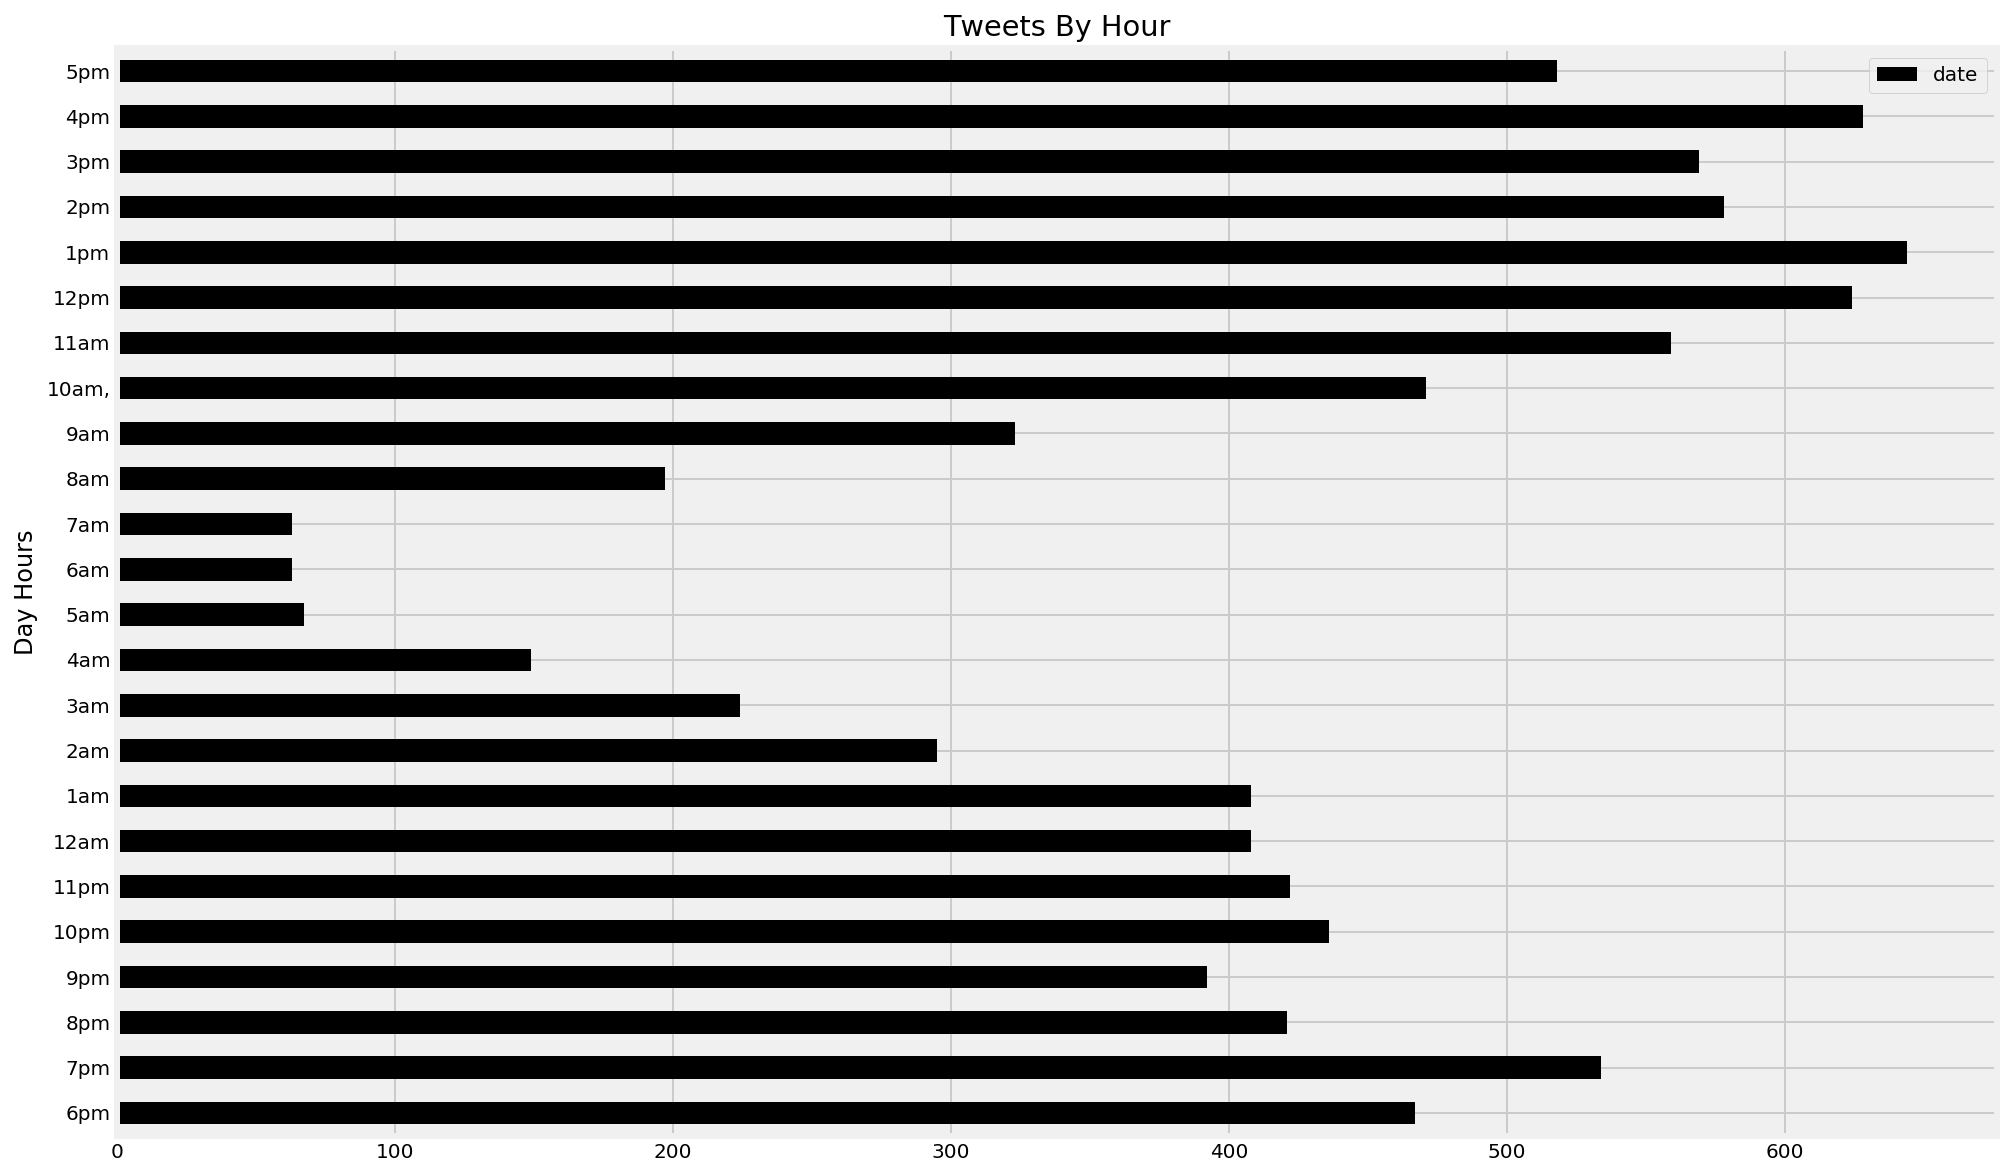

In [63]:
hour_tweet_plot=hour_tweets.plot(figsize=(15,10),kind='barh', color='#000000')
hour_tweet_plot.set_ylabel('Day Hours')
hour_tweet_plot.set_title('Tweets By Hour')
hour_tweet_plot.set_yticklabels( ('6pm','7pm','8pm','9pm','10pm',
                                  '11pm', '12am','1am','2am','3am','4am', '5am','6am','7am','8am','9am','10am,','11am',
                                  '12pm','1pm','2pm','3pm','4pm','5pm')) #UTC converted to California timezone
plt.show()

**Tweets by Year**

In [64]:
year_tweets=pd.DataFrame(latest_em_tweets_copy.date.dt.year.value_counts().sort_index()) #Tweet counts by year


In [65]:
year_tweets.rename(columns={'date': 'No_of_tweets'}, inplace=True)

In [66]:
year_tweets.head(25)

No_of_tweets
2010             1
2011            42
2012           272
2013           422
2014           188
2015           328
2016           753
2017          1161
2018          2289
2019          2932
2020          1072

In [67]:
year_tweets = year_tweets.iloc[1:]

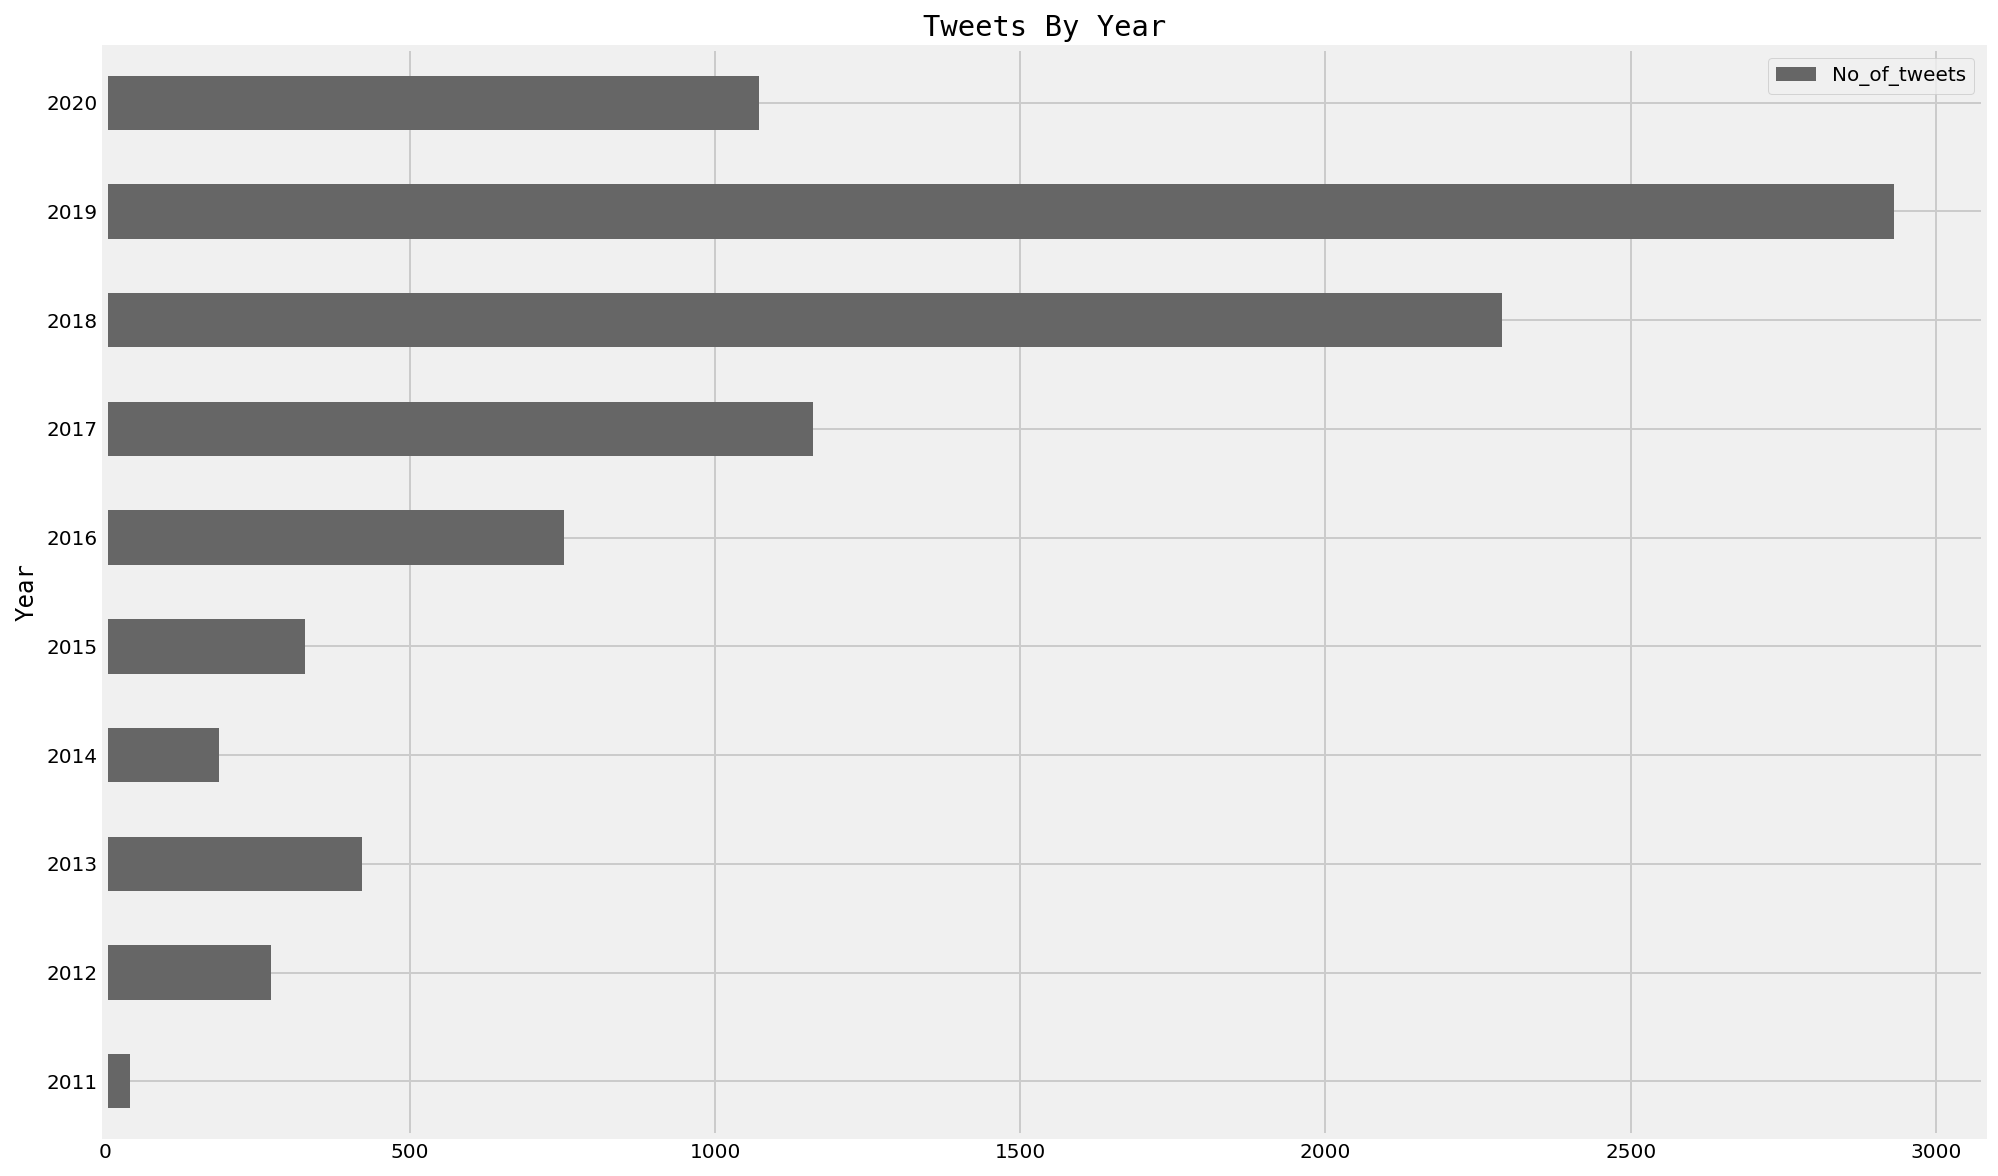

In [68]:
year_tweet_plot=year_tweets.plot(figsize=(15,10),kind='barh', color='#666666')
hfont = {'fontname':'Menlo'}
year_tweet_plot.set_ylabel('Year', **hfont)
year_tweet_plot.set_title('Tweets By Year', **hfont)
plt.show()



**Tweets by Month**

In [69]:
month_tweets=pd.DataFrame(latest_em_tweets_copy.date.dt.month.value_counts().sort_index())#Tweet counts by month

In [70]:
month_tweets.rename(columns={'date': 'No_of_tweets'}, inplace=True)

In [71]:
month_tweets.head(25)

No_of_tweets
1            630
2            752
3            882
4           1165
5           1058
6            907
7            835
8            582
9            613
10           729
11           545
12           762

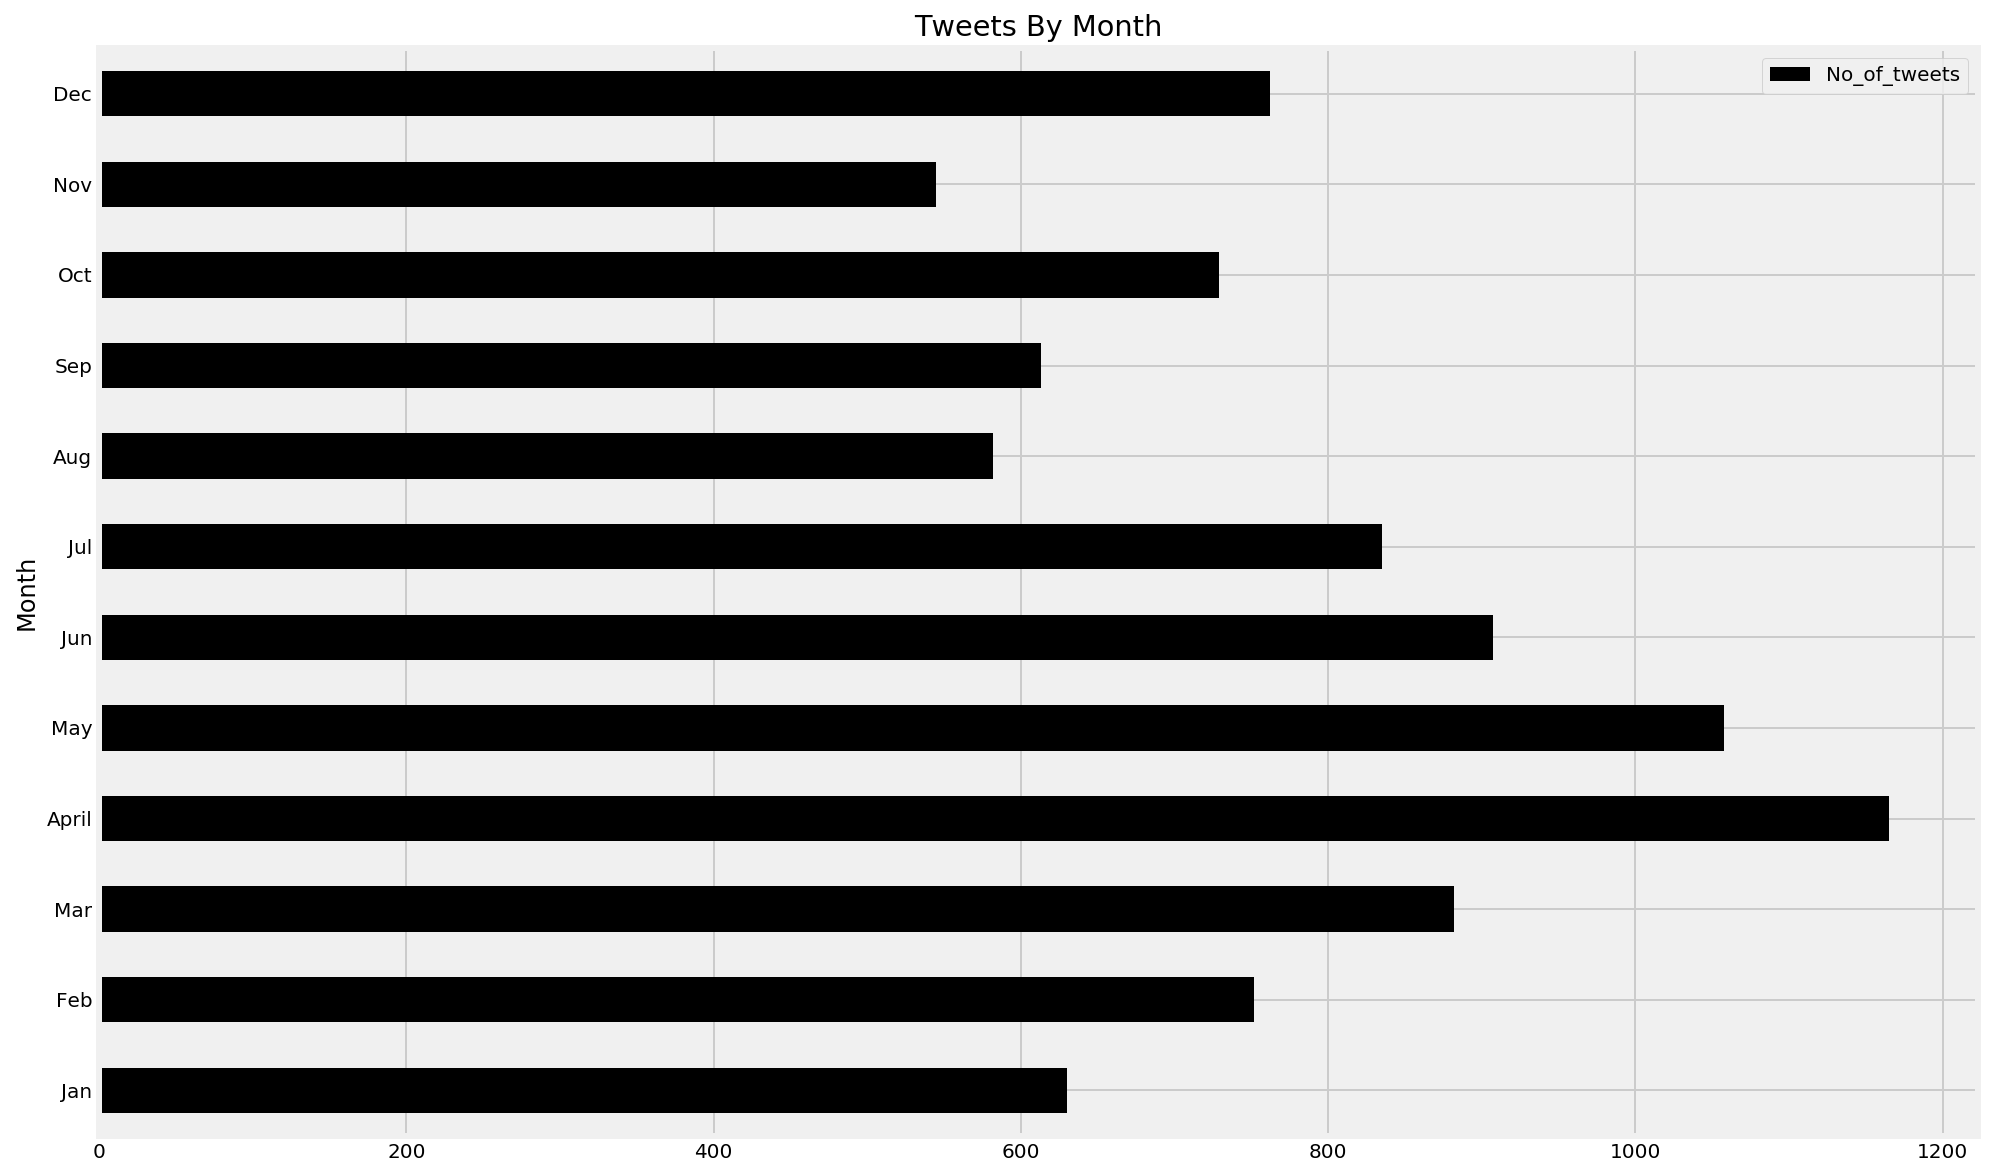

In [72]:
month_tweet_plot=month_tweets.plot(figsize=(15,10),kind='barh', color='#000000')
month_tweet_plot.set_ylabel('Month')
month_tweet_plot.set_title('Tweets By Month')
month_tweet_plot.set_yticklabels(('Jan','Feb','Mar','April','May',
                                  'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec'))
plt.show()

**Tweets by Weekday**

In [73]:
weekday_tweets=pd.DataFrame(latest_em_tweets_copy.date.dt.weekday.value_counts().sort_index())#Tweet counts by weekday

In [74]:
weekday_tweets.rename(columns={'date': 'No_of_tweets'}, inplace=True)

In [75]:
weekday_tweets.head(7)

No_of_tweets
0          1221
1          1247
2          1191
3          1422
4          1575
5          1429
6          1375

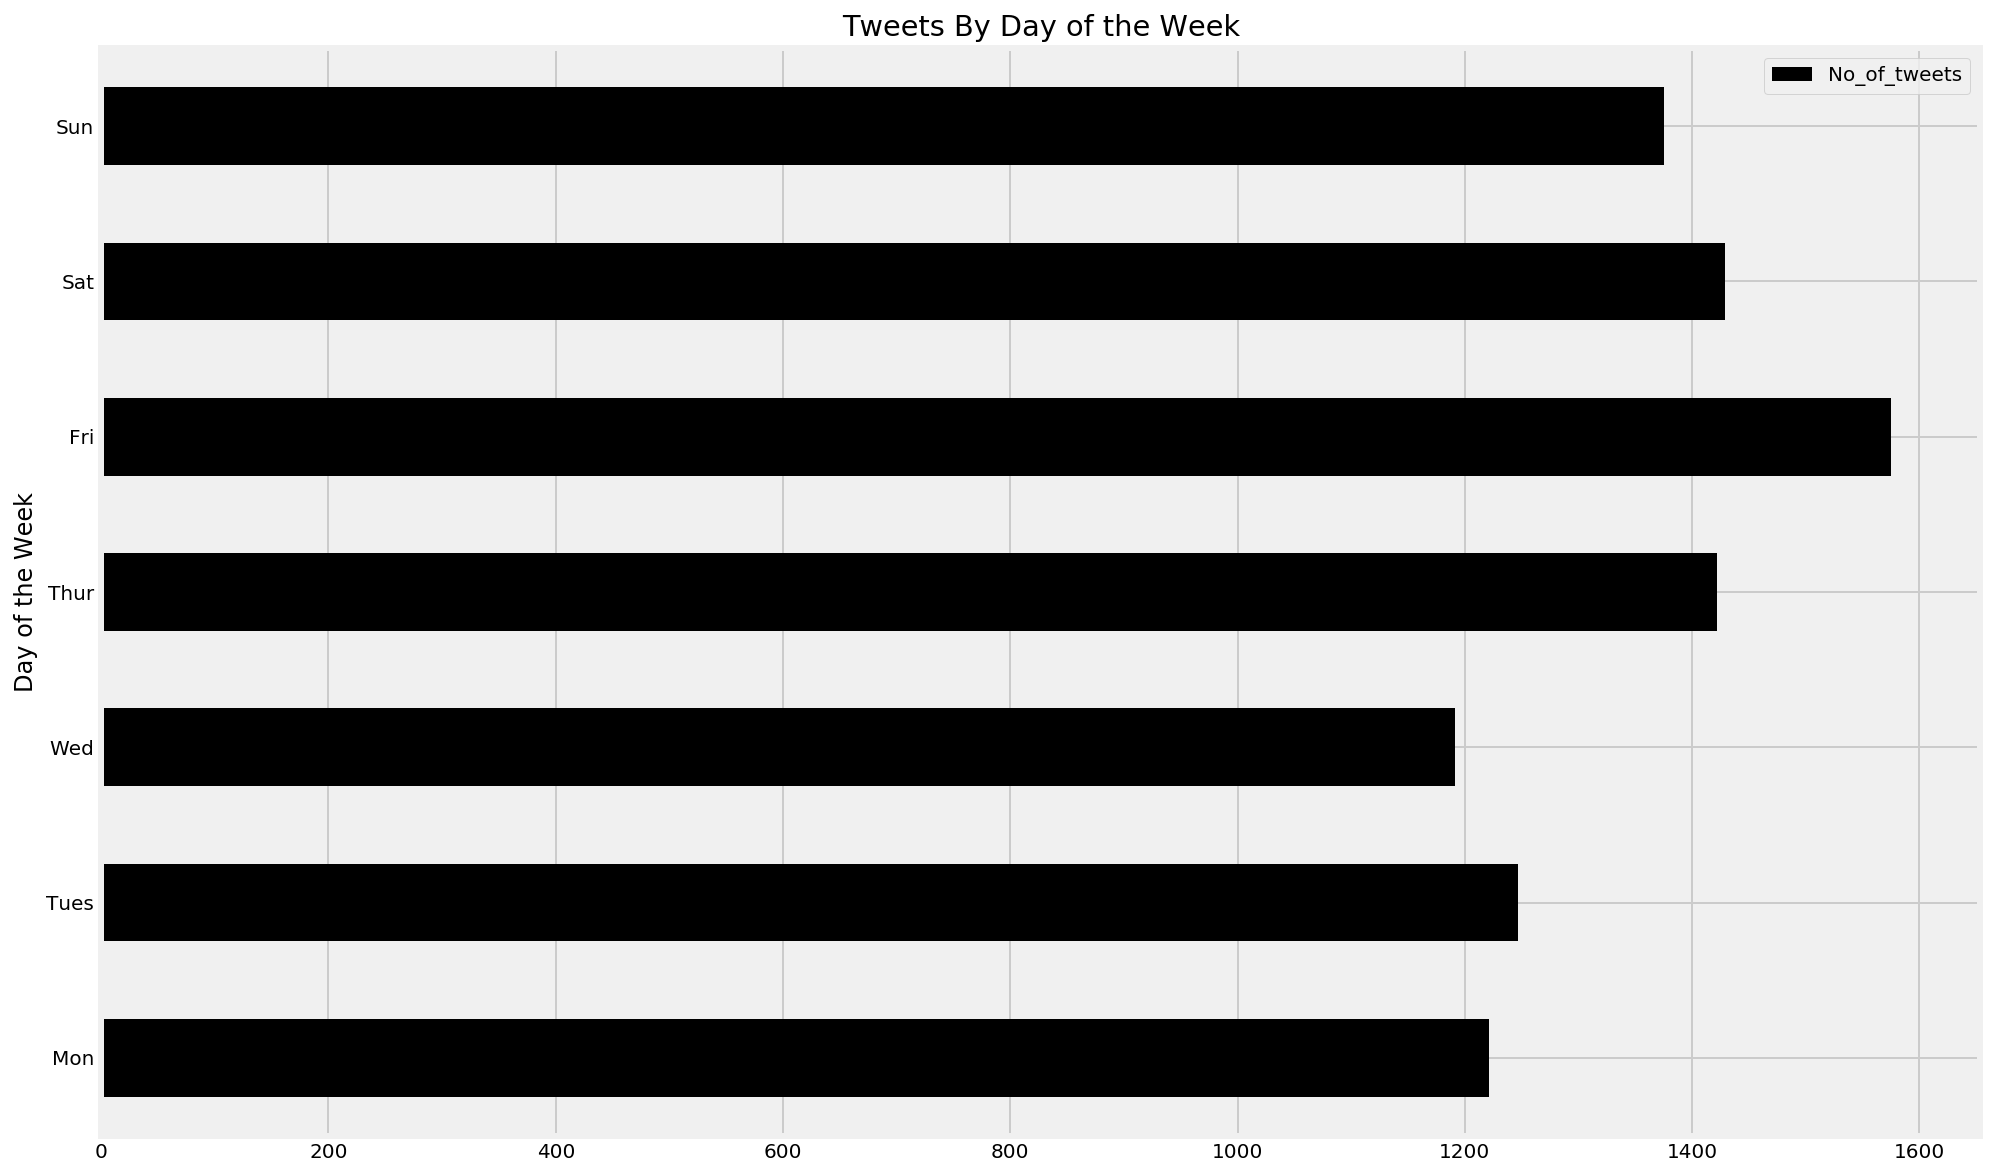

In [76]:
weekday_tweet_plot=weekday_tweets.plot(figsize=(15,10),kind='barh', color='#000000')
weekday_tweet_plot.set_ylabel('Day of the Week')
weekday_tweet_plot.set_title('Tweets By Day of the Week')
weekday_tweet_plot.set_yticklabels(('Mon','Tues','Wed','Thur','Fri',
                                  'Sat', 'Sun'))
plt.show()

**Tweets by Date**

In [77]:
day_tweets=pd.DataFrame(latest_em_tweets_copy.date.dt.day.value_counts().sort_index())

In [78]:
day_tweets.rename(columns={'date': 'No_of_tweets'}, inplace=True)

In [79]:
day_tweets.head(31)

No_of_tweets
1            318
2            255
3            301
4            267
5            350
6            283
7            296
8            286
9            350
10           307
11           304
12           332
13           182
14           307
15           239
16           290
17           340
18           271
19           348
20           256
21           296
22           395
23           389
24           397
25           395
26           339
27           318
28           288
29           271
30           303
31           187

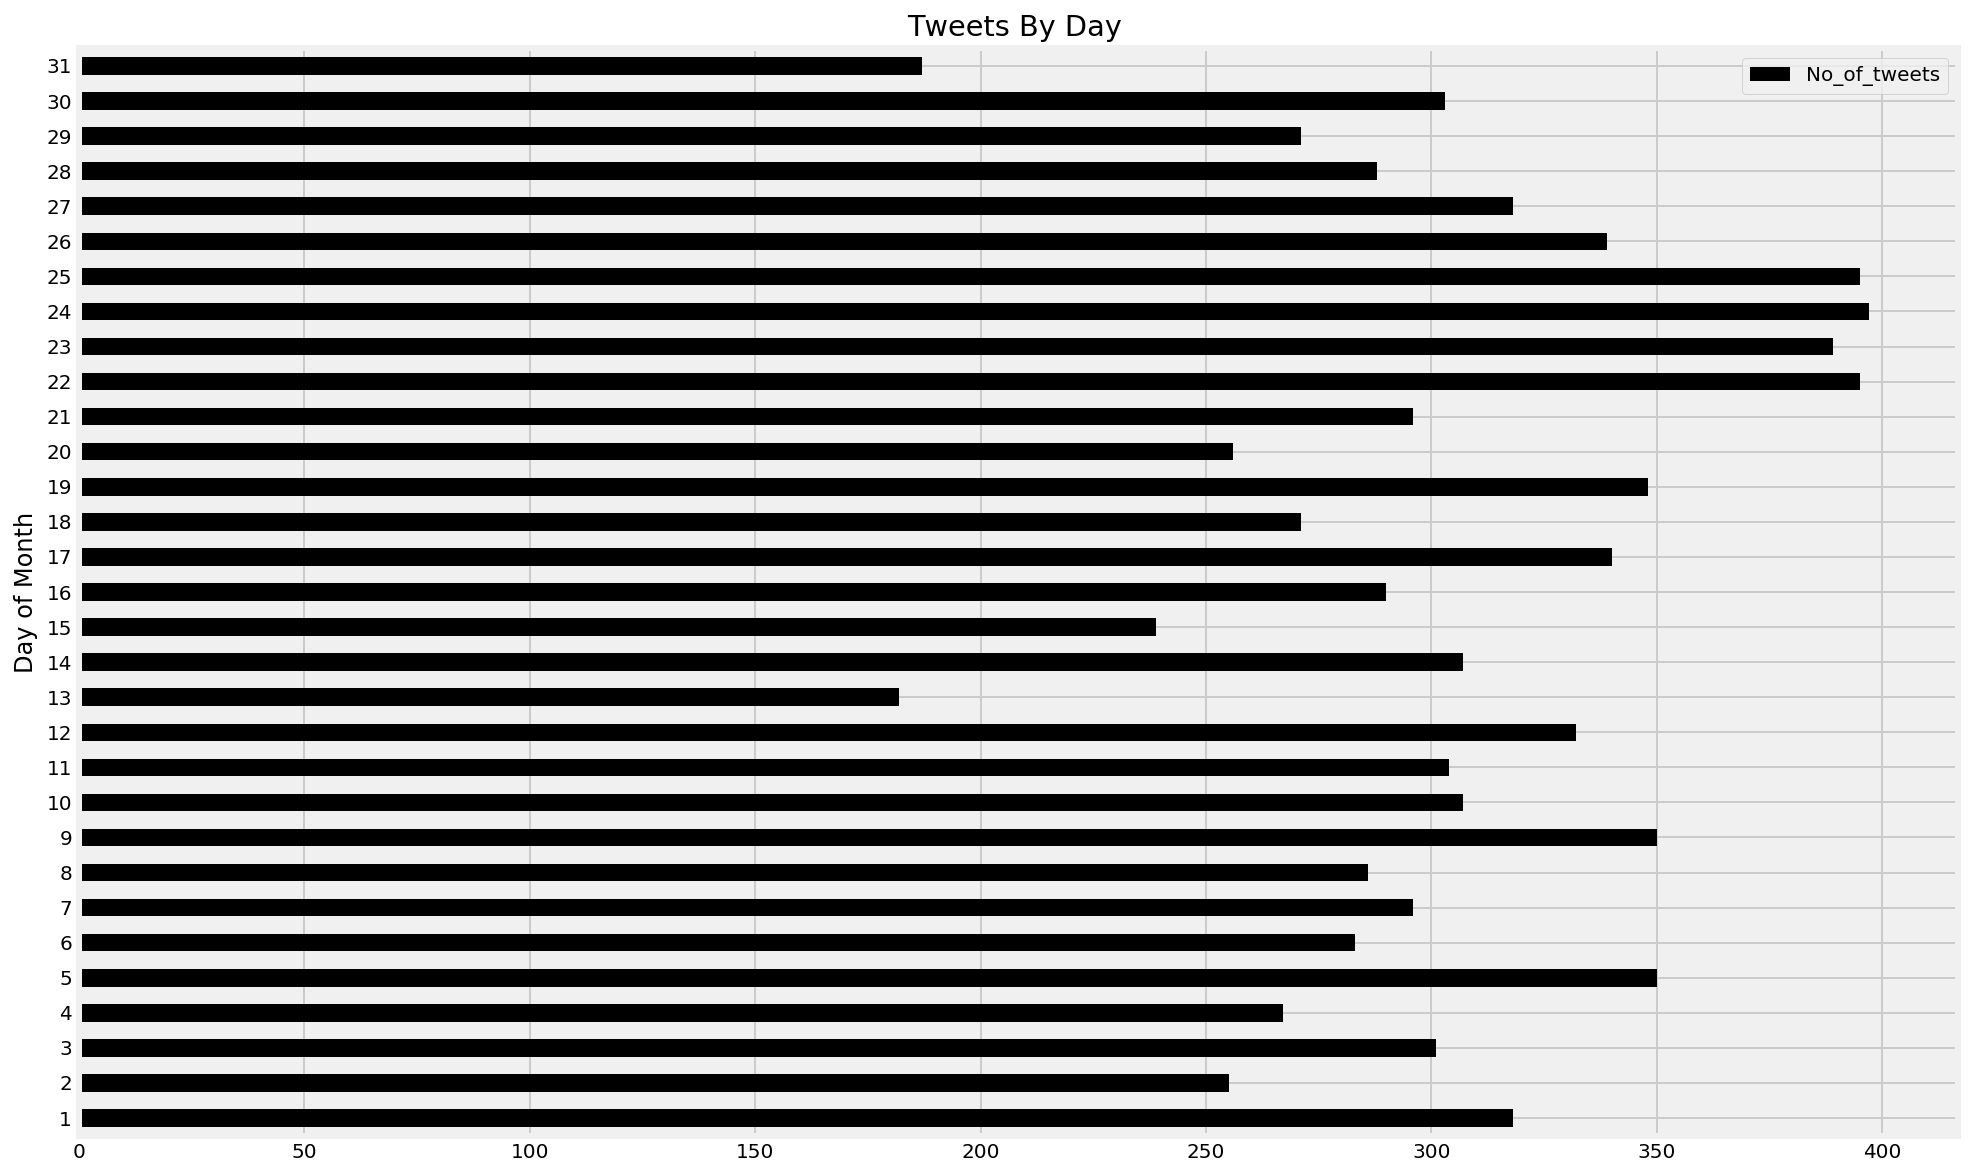

In [80]:
day_tweet_plot=day_tweets.plot(figsize=(15,10),kind='barh', color='#000000')
day_tweet_plot.set_ylabel('Day of Month')
day_tweet_plot.set_title('Tweets By Day ')

plt.show();


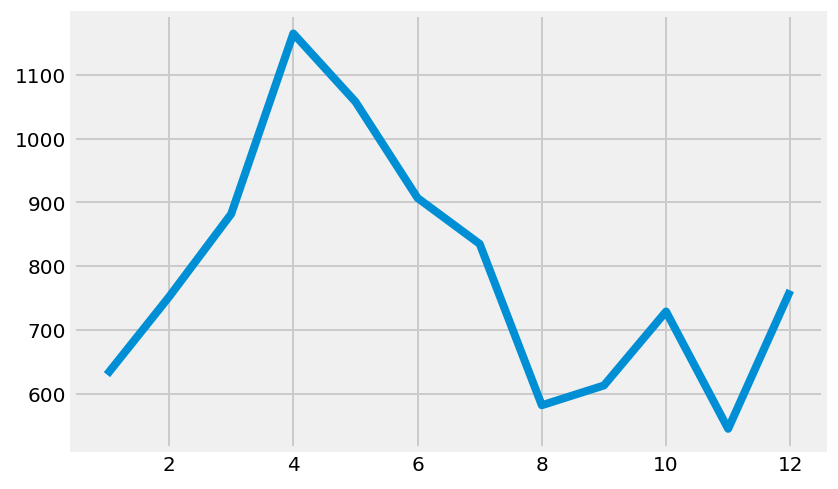

In [81]:
latest_em_tweets_copy.Month.value_counts().sort_index().plot()

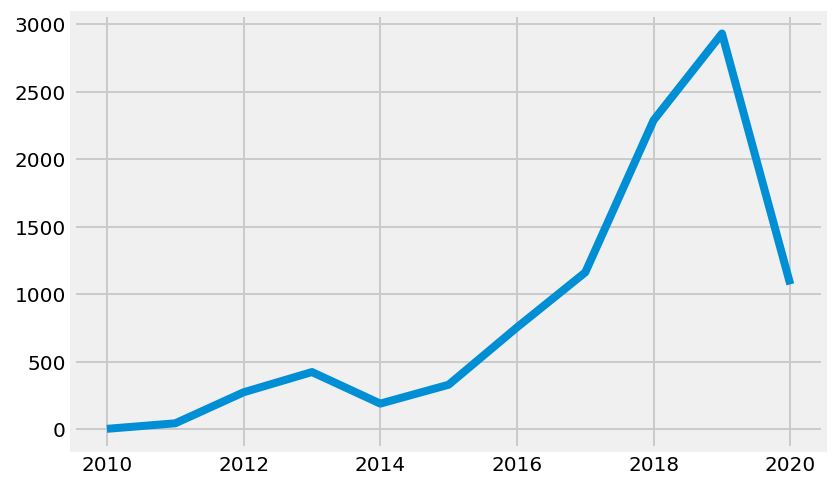

In [82]:
latest_em_tweets_copy.Year.value_counts().sort_index().plot()

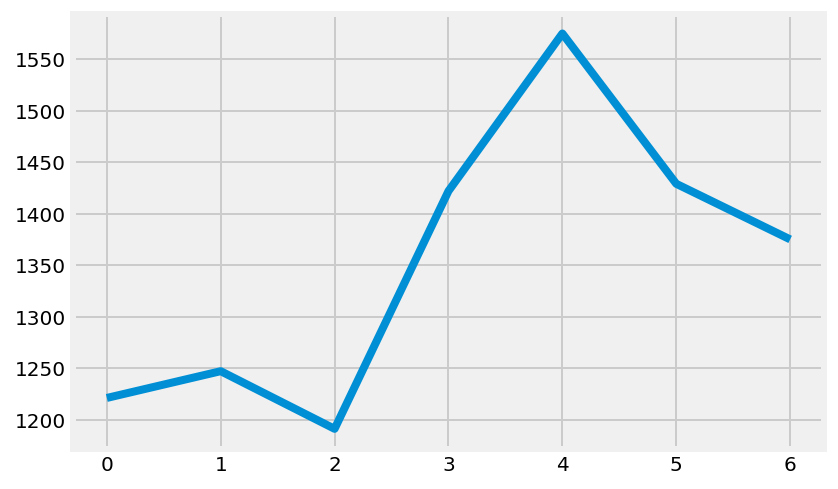

In [83]:
latest_em_tweets_copy.Dayofweek.value_counts().sort_index().plot()

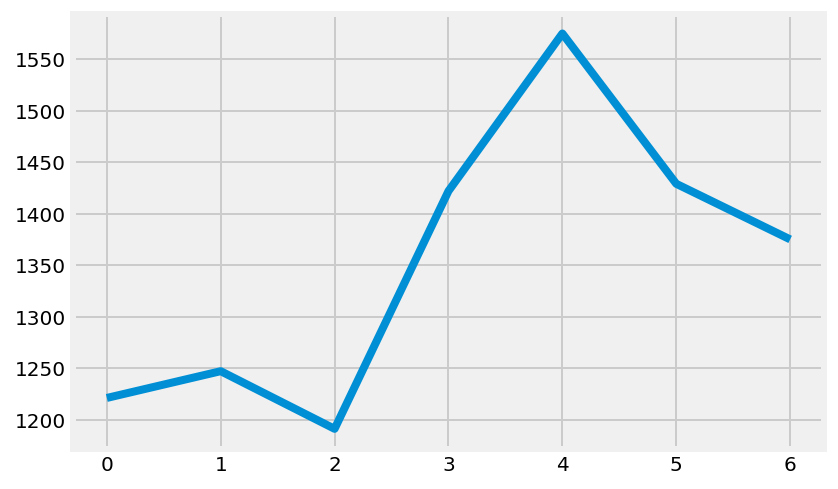

In [84]:
latest_em_tweets_copy.Dayofweek.value_counts().sort_index().plot()

In [85]:
latest_em_tweets_count=latest_em_tweets_copy.groupby('date').date.count()

In [86]:
latest_em_tweets_count.to_csv('./datasets/preprocessed/latest_em_tweets_count.csv')

In [87]:
latest_em_tweets_count.head()

date
2010-06-04 18:31:57    1
2011-12-01 09:55:11    1
2011-12-01 10:29:04    1
2011-12-03 08:20:28    1
2011-12-03 08:22:07    1
Name: date, dtype: int64

In [88]:
latest_em_tweets_count=pd.DataFrame(latest_em_tweets_count, columns=['date','tweet_counts_'])

In [89]:
latest_em_tweets_count= latest_em_tweets_count.rename(columns={'date': 'tweet_counts'})

In [90]:
latest_em_tweets_count.head(100)

tweet_counts tweet_counts_
date                                           
2010-06-04 18:31:57             1           NaN
2011-12-01 09:55:11             1           NaN
2011-12-01 10:29:04             1           NaN
2011-12-03 08:20:28             1           NaN
2011-12-03 08:22:07             1           NaN
2011-12-04 03:33:52             1           NaN
2011-12-21 10:26:51             1           NaN
2011-12-21 10:30:05             1           NaN
2011-12-21 10:42:52             1           NaN
2011-12-21 10:48:29             1           NaN
2011-12-21 11:00:19             1           NaN
2011-12-21 11:13:59             1           NaN
2011-12-21 23:17:11             1           NaN
2011-12-22 03:12:52             1           NaN
2011-12-22 09:46:16             1           NaN
2011-12-22 11:30:10             1           NaN
2011-12-24 01:29:19             1           NaN
2011-12-24 01:33:35             1           NaN
2011-12-24 01:41:33             1           NaN
2011-12-26 04:06:06             1           NaN
2011-12-26 15:05:19             1           NaN
2011-12-26 15:23:40             1           NaN
2011-12-26 15:45:18             1           NaN
2011-12-26 16:23:04             1           NaN
2011-12-26 16:29:50             1           NaN
2011-12-27 23:38:55             1           NaN
2011-12-28 22:27:08             1           NaN
2011-12-29 08:56:23             1           NaN
2011-12-29 09:12:01             1           NaN
2011-12-29 14:22:15             1           NaN
2011-12-29 22:31:09             1           NaN
2011-12-29 22:45:17             1           NaN
2011-12-30 03:53:51             1           NaN
2011-12-30 03:58:30             1           NaN
2011-12-30 04:03:42             1           NaN
2011-12-30 04:10:31             1           NaN
2011-12-30 04:57:23             1           NaN
2011-12-30 14:36:17             1           NaN
2011-12-30 14:48:52             1           NaN
2011-12-30 15:35:47             1           NaN
2011-12-31 13:06:23             1           NaN
2011-12-31 22:05:47             1           NaN
2011-12-31 22:08:42             1           NaN
2012-01-01 16:40:27             1           NaN
2012-01-01 16:49:40             1           NaN
2012-01-01 16:54:27             1           NaN
2012-01-01 20:33:16             1           NaN
2012-01-01 20:41:34             1           NaN
2012-01-01 20:49:05             1           NaN
2012-01-01 21:52:44             1           NaN
2012-01-03 06:58:13             1           NaN
2012-01-03 21:04:51             1           NaN
2012-01-03 21:28:25             1           NaN
2012-01-06 17:28:01             1           NaN
2012-01-06 17:30:01             1           NaN
2012-01-06 20:09:40             1           NaN
2012-01-11 02:36:39             1           NaN
2012-01-12 02:47:48             1           NaN
2012-01-12 21:07:59             1           NaN
2012-01-12 23:07:42             1           NaN
2012-01-13 05:49:17             1           NaN
2012-01-14 20:27:41             1           NaN
2012-01-14 20:29:34             1           NaN
2012-01-17 17:44:57             1           NaN
2012-01-17 17:47:19             1           NaN
2012-01-17 22:07:50             1           NaN
2012-01-18 01:54:53             1           NaN
2012-01-22 00:44:23             1           NaN
2012-01-23 01:42:54             1           NaN
2012-01-24 03:04:49             1           NaN
2012-01-24 04:03:10             1           NaN
2012-01-24 04:16:39             1           NaN
2012-01-27 20:35:04             1           NaN
2012-01-28 02:21:03             1           NaN
2012-01-28 19:54:40             1           NaN
2012-01-31 16:49:58             1           NaN
2012-02-01 09:12:24             1           NaN
2012-02-01 16:03:05             1           NaN
2012-02-02 17:00:34             1           NaN
2012-02-04 02:28:24             1           NaN
2012-02-04 20:42:54             1           NaN
2012-02-05 20:07:16             1    

In [91]:
latest_em_tweets_count.drop(latest_em_tweets_count.columns[[1]], axis=1, inplace=True)


In [92]:
latest_em_tweets_count.tail(1000)

tweet_counts
date                             
2020-01-16 22:44:07             1
2020-01-16 22:47:02             1
2020-01-16 22:51:19             1
2020-01-17 00:40:52             1
2020-01-17 01:43:05             1
2020-01-17 01:46:26             1
2020-01-17 01:56:37             1
2020-01-17 02:01:37             1
2020-01-17 02:03:03             1
2020-01-17 02:03:56             1
2020-01-17 02:05:51             1
2020-01-17 02:07:41             1
2020-01-17 02:08:58             1
2020-01-17 02:09:23             1
2020-01-17 02:14:30             1
2020-01-17 02:23:01             1
2020-01-17 09:13:15             1
2020-01-17 10:31:00             1
2020-01-17 21:55:53             1
2020-01-17 22:02:59             1
2020-01-17 22:09:37             1
2020-01-17 22:10:12             1
2020-01-17 22:13:48             1
2020-01-18 09:17:53             1
2020-01-18 15:44:08             1
2020-01-18 20:31:26             1
2020-01-19 15:24:32             1
2020-01-19 15:27:06             1
2020-01-19 18:40:17             1
2020-01-20 05:19:37             1
2020-01-20 07:12:23             1
2020-01-20 19:28:20             1
2020-01-21 14:10:55             1
2020-01-21 16:17:46             1
2020-01-21 16:24:06             1
2020-01-21 16:29:49             1
2020-01-21 17:02:08             1
2020-01-21 17:07:24             1
2020-01-21 23:30:24             1
2020-01-22 05:45:08             1
2020-01-22 05:47:00             1
2020-01-22 05:49:57             1
2020-01-22 05:52:01             1
2020-01-22 07:02:27             1
2020-01-22 07:15:20             1
2020-01-22 07:19:46             1
2020-01-22 07:23:38             1
2020-01-22 12:02:54             1
2020-01-22 12:13:30             1
2020-01-22 13:04:04             1
2020-01-23 05:25:05             1
2020-01-23 06:12:10             1
2020-01-23 06:44:49             1
2020-01-23 15:27:51             1
2020-01-23 20:29:34             1
2020-01-23 20:30:47             1
2020-01-23 20:33:35             1
2020-01-24 02:54:47             1
2020-01-24 18:00:26             1
2020-01-25 05:17:04             1
2020-01-25 05:22:39             1
2020-01-25 05:24:47             1
2020-01-25 05:25:25             1
2020-01-25 05:27:04             1
2020-01-25 05:31:10             1
2020-01-25 05:35:57             1
2020-01-25 18:30:28             1
2020-01-25 18:36:12             1
2020-01-25 21:02:53             1
2020-01-25 21:18:36             1
2020-01-26 06:33:42             1
2020-01-26 20:23:02             1
2020-01-27 23:30:09             1
2020-01-27 23:51:01             1
2020-01-27 23:52:36             1
2020-01-28 00:01:40             1
2020-01-28 00:15:15             1
2020-01-28 05:16:12             1
2020-01-28 05:30:00             1
2020-01-28 19:34:43             1
2020-01-29 03:44:42             1
2020-01-29 03:45:52             1
2020-01-29 03:51:38             1
2020-01-29 03:53:44             1
2020-01-29 03:56:03             1
2020-01-29 18:56:13             1
2020-01-29 18:57:08             1
2020-01-29 19:08:09             1
2020-01-29 19:52:20             1
2020-01-29 19:52:57             1
2020-01-30 03:13:12             1
2020-01-30 06:18:26             1
2020-01-30 20:41:37             1
2020-01-30 21:47:22             1
2020-01-30 23:00:44             1
2020-01-31 00:20:21             1
2020-01-31 01:04:13             1
2020-01-31 02:39:13             1
2020-01-31 04:36:54             1
2020-01-31 05:01:20             1
2020-01-31 06:20:03             1
2020-01-31 06:22:50             1
2020-01-31 06:29:08             1
2020-01-31 06:30:34             1
2020-01-31 06:40:13             1
2020-01-31 07:46:00             1
2020-01-31 07:48:00             1
2020-01-31 09:12:59             1
2020-01-31 09:19:19             1
2020-01-31 09:44:04             1
2020-01-31 09:54:33             1
2020-01-31 10:25:30             1
2020-02-01 00:17:58             1
2020-02-01 00:34:19             1
2020-02-01 19:36:49             1
2020-02-01 19:37:05             1
2020-02-0

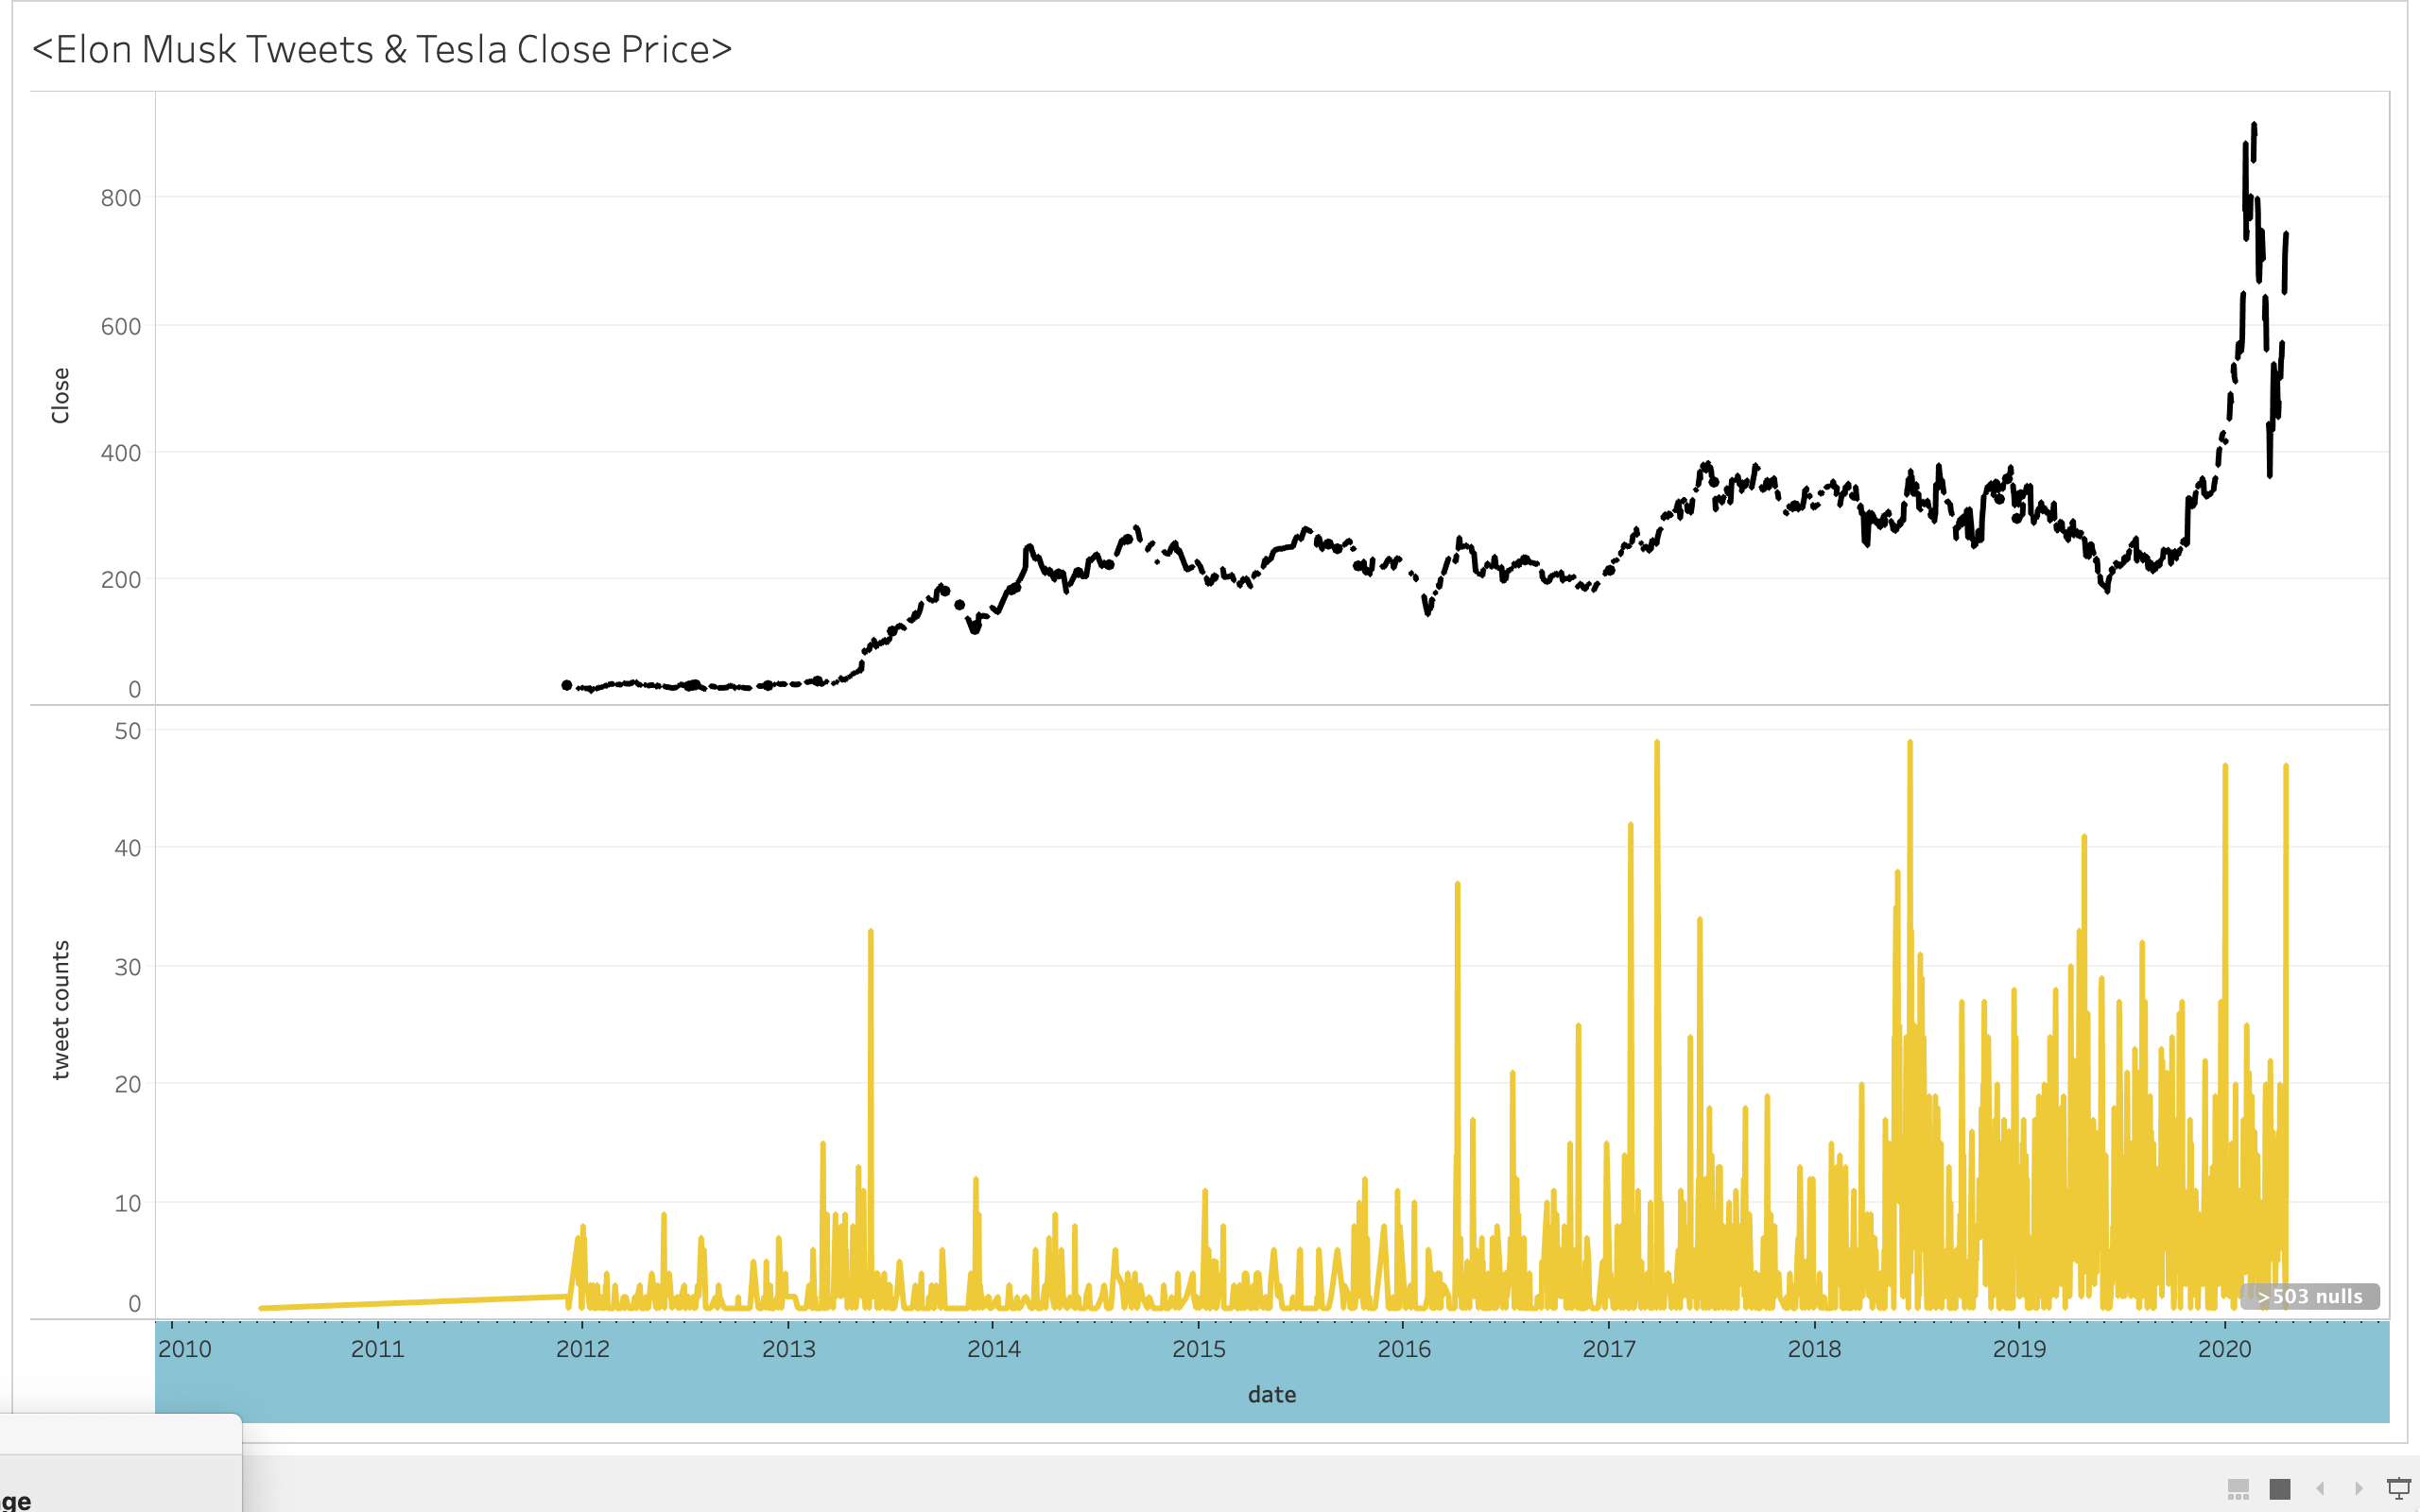


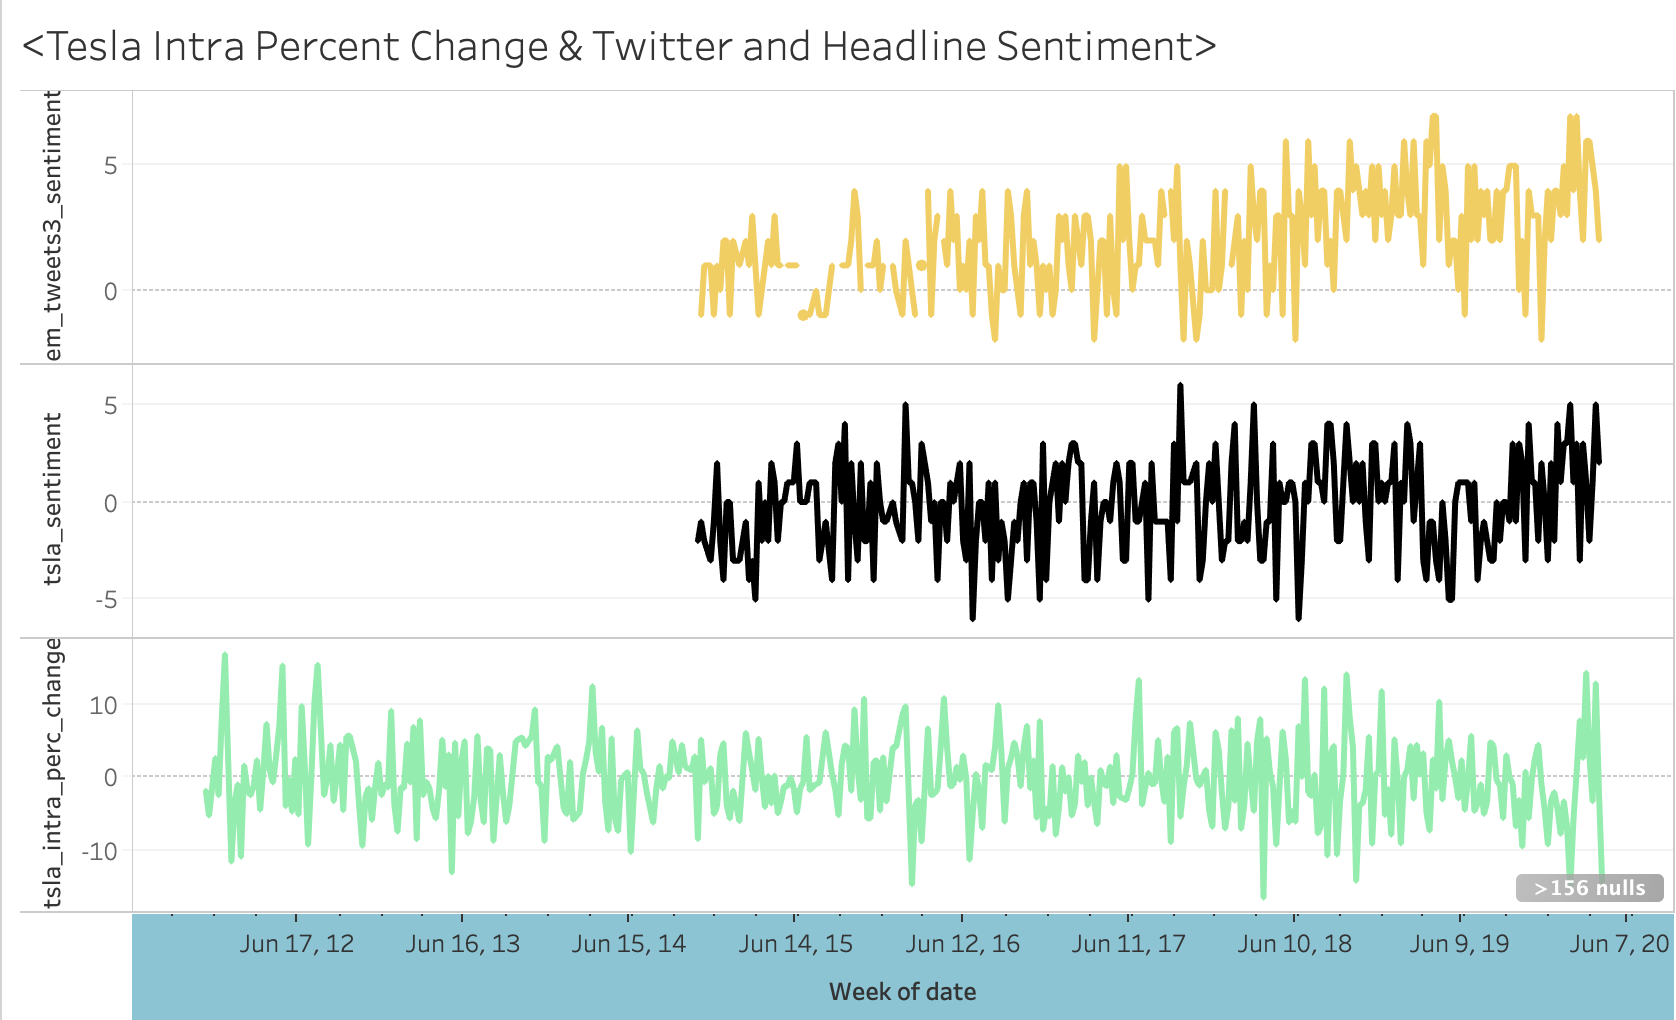

# Identify Top 40 Words Over 10 Years

In [93]:
cvec = CountVectorizer(max_features=40, stop_words='english') 
tvec = TfidfVectorizer(max_features=40, stop_words='english')

In [94]:
X=latest_em_tweets3.text
y=latest_em_tweets3.sentiment_score

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [96]:
X_train_cvec=pd.DataFrame(cvec.fit_transform(X_train).todense(),
                          columns=cvec.get_feature_names())

X_train_tvec =pd.DataFrame(tvec.fit_transform(X_train).todense(),
                           columns=tvec.get_feature_names())

In [97]:
X_test_cvec=pd.DataFrame(cvec.transform(X_test).todense(),
                          columns=cvec.get_feature_names())
X_test_tvec=pd.DataFrame(tvec.transform(X_test).todense(),
                          columns=tvec.get_feature_names())

In [98]:
count = pd.DataFrame(X_test_cvec.sum(axis = 0, skipna = True)) 

In [99]:
count.columns = ['Count']

In [100]:
count.sort_values(by = ['Count'],ascending = True, inplace = True) 

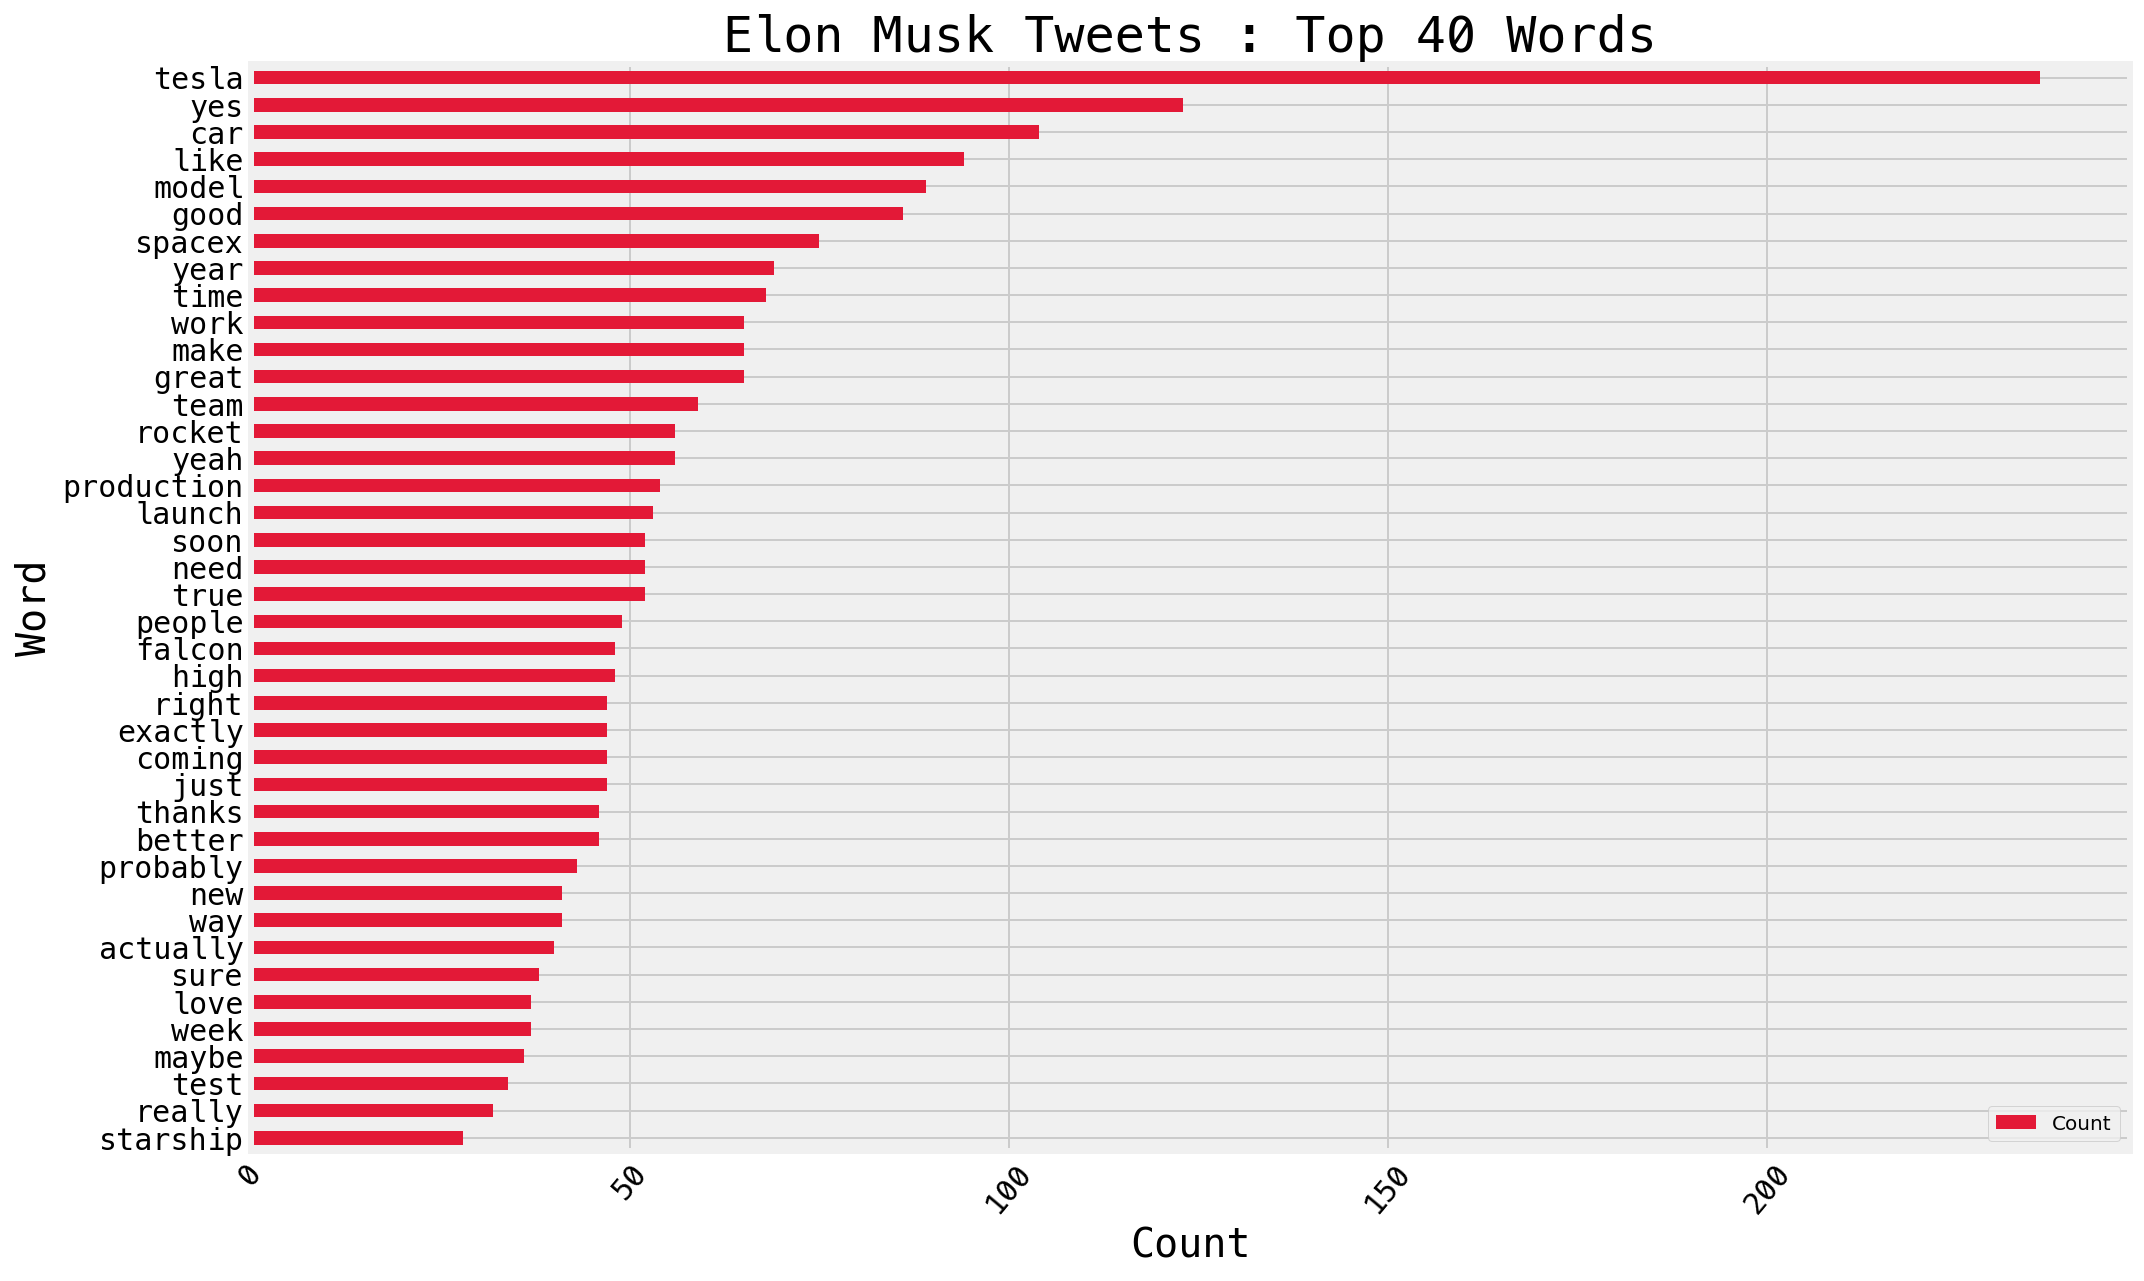

In [101]:
count.plot.barh(figsize=(15,10), color='#E31937')
hfont = {'fontname':'Menlo'}
plt.xlabel("Count", **hfont, fontsize=20)
plt.ylabel("Word", **hfont, fontsize=20)
plt.title('Elon Musk Tweets : Top 40 Words',**hfont, fontsize=25)

plt.tick_params(labelsize=15)
plt.xticks(**hfont, rotation=50)
plt.yticks(**hfont)

plt.show()



In [102]:
latest_em_tweets3

date                                               text  compound  \
9459 2010-06-04  Please ignore prior tweets, someone pretending...    0.4939   
9458 2011-12-01  Went Iceland Sat ride bumper car ice! No, coun...    0.8932   
9457 2011-12-01  I made volume Model S go 11. Now I need work m...    0.0000   
9456 2011-12-03  Great Voltaire quote, arguably better Twain. H...    0.5994   
9455 2011-12-03                        That total non sequitur btw    0.0000   
...         ...                                                ...       ...   
25   2020-05-01                                        You got it!    0.0000   
26   2020-05-01                                            Exactly    0.0000   
27   2020-05-01                                          Well said    0.2732   
14   2020-05-01                 Exactly. How cheaply freedom sold.    0.6369   
0    2020-05-01  We’re going try landing Starship moon enough p...    0.0000   

        neg    neu    pos  sentiment_score  
9459  0.164  0.395  0.441                1  
9458  0.000  0.567  0.433                1  
9457  0.000  1.000  0.000                0  
9456  0.239  0.364  0.397                1  
9455  0.000  1.000  0.000                0  
...     ...    ...    ...              ...  
25    0.000  1.000  0.000                0  
26    0.000  1.000  0.000                0  
27    0.000  0.323  0.677                1  
14    0.000  0.488  0.512                1  
0     0.000  1.000  0.000                0  

[9367 rows x 7 columns]

In [103]:
latest_em_tweets_copy

text                date  \
0     We’re going to try landing Starship on the moo... 2020-05-01 22:46:42   
1                      How much for some anime Bitcoin? 2020-05-01 22:44:56   
2                                                       2020-05-01 22:39:28   
3                                                       2020-05-01 22:34:24   
4                      Reality is its own parrot parody 2020-05-01 22:32:29   
...                                                 ...                 ...   
9455                  That was a total non sequitur btw 2011-12-03 08:22:07   
9456  Great Voltaire quote, arguably better than Twa... 2011-12-03 08:20:28   
9457  I made the volume on the Model S http://ow.ly/... 2011-12-01 10:29:04   
9458  Went to Iceland on Sat to ride bumper cars on ... 2011-12-01 09:55:11   
9459  Please ignore prior tweets, as that was someon... 2010-06-04 18:31:57   

      Hour  Day  Month  Year  Dayofweek  
0       22    1      5  2020          4  
1       22    1      5  2020          4  
2       22    1      5  2020          4  
3       22    1      5  2020          4  
4       22    1      5  2020          4  
...    ...  ...    ...   ...        ...  
9455     8    3     12  2011          5  
9456     8    3     12  2011          5  
9457    10    1     12  2011          3  
9458     9    1     12  2011          3  
9459    18    4      6  2010          4  

[9460 rows x 7 columns]

In [104]:
import datetime as dt
latest_em_tweets_copy['date'] = pd.to_datetime(latest_em_tweets_copy['date'])

year2015 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2015]
year2016 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2016]
year2017 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2017]
year2018 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2018]
year2019 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2019]
year2020 = latest_em_tweets_copy[latest_em_tweets_copy['date'].dt.year == 2020]



In [105]:
latest_em_tweets3.tail(1000)

date                                               text  compound  \
1018 2020-01-12          Should able post video Raptor Tripod soon    0.0000   
1017 2020-01-12           Teslas soon talk people want. This real.    0.0772   
1019 2020-01-12                               Ok, tho could gnarly    0.0000   
1020 2020-01-12                              Destroyed Dragon fire   -0.6808   
1021 2020-01-12           We tried design way save B1046, possible    0.4939   
1016 2020-01-12         For sure!! This make epic robber confusion   -0.6229   
1011 2020-01-13  Good analysis, although bit conservative imo. ...    0.8718   
1005 2020-01-14  Advancing humanity’s understanding Universe fu...    0.0000   
1004 2020-01-14  Very true. What’s really mindblowing much ener...    0.9110   
1006 2020-01-14  One person’s MRI machine another’s railgun! Ma...   -0.1759   
1008 2020-01-14                                         Great song    0.6249   
1010 2020-01-14      Thanks mentioning! We should’ve done age ago.    0.4926   
1009 2020-01-14  T-shirt bulletproof & make u buff! -cybertruck...    0.0000   
1007 2020-01-14  Exactly. We’ve good discussion leading astrono...    0.3818   
1003 2020-01-15  Just saw today. Tesla refund general easy get ...    0.6486   
1002 2020-01-16  Starship orbital vehicle SN1, liquid oxygen he...    0.0000   
1001 2020-01-16                           Sorry, migh brought site   -0.0772   
1000 2020-01-16  Densifying hydrogen difficult, liquid temp clo...    0.5093   
999  2020-01-16  Fundamental issue SLS it’s reusable, mean bill...   -0.4003   
998  2020-01-16  Densification isn’t needed return ship & limit...   -0.2263   
997  2020-01-16  What’s amazing non-linear effect gravity is. S...    0.5859   
983  2020-01-17                                             Hehehe    0.0000   
982  2020-01-17  Even important reusable rocket, cost propellan...   -0.3400   
981  2020-01-17  Munro’s analysis Tesla engineering accurate, p...    0.4019   
984  2020-01-17          Helping pay I’m accumulating asset Earth.    0.5106   
979  2020-01-17  Dragon Spacecraft supersonic abort test coming...    0.0000   
978  2020-01-17      Best place view beach. Excitement guaranteed!    0.8268   
977  2020-01-17                                                Yes    0.4019   
980  2020-01-17                                       What change?    0.0000   
985  2020-01-17  Loading Mars fleet Earth orbit, 1000 ship depa...    0.0000   
993  2020-01-17  Starship design goal 3 flights/day avg rate, ~...    0.0000   
987  2020-01-17                           Yes. There lot job Mars!    0.4574   
988  2020-01-17   Needs anyone go want, loan available don’t money    0.0772   
989  2020-01-17  Yeah. A lot work needed propellant production ...    0.2960   
990  2020-01-17                                                Yes    0.4019   
991  2020-01-17                                        That’s goal    0.0000   
992  2020-01-17  Building 100 Starships/year get 1000 10 year 1...    0.0000   
996  2020-01-17  Reaction Cyberpunk 2077 slipping release date ...    0.0000   
994  2020-01-17  Megatons per year orbit needed life become mul...    0.0000   
995  2020-01-17                                       That’s right    0.0000   
986  2020-01-17                  Aiming 20 30 years, like aircraft    0.3612   
976  2020-01-18                                           Meteor!!    0.0000   
974  2020-01-18                                                Yes    0.4019   
973  2020-01-19                                      5 min liftoff    0.0000   
972  2020-01-19  Dragon high altitude, supersonic abort test ri...   -0.2023   
971  2020-01-19                                               Haha    0.4588   
968  2020-01-20  Dragon trunk in-flight abort test surprisingly...    0.6588   
970  2020-01-20  Thanks behalf @SpaceX team! Thank also support...    0.8122   
969  2020-01-20                                            Exactly    0.0000   
967  2020-0

In [106]:

year_2015 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2015]
year_2016 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2016]
year_2017 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2017]
year_2018 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2018]
year_2019 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2019]
year_2020 = latest_em_tweets3[latest_em_tweets3['date'].dt.year == 2020]



In [107]:
cvec = CountVectorizer(max_features=40, stop_words='english') 
tvec = TfidfVectorizer(max_features=40, stop_words='english')

In [108]:
X=year_2020.text
y=year_2020.sentiment_score

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [110]:
X_train_cvec=pd.DataFrame(cvec.fit_transform(X_train).todense(),
                          columns=cvec.get_feature_names())

X_train_tvec =pd.DataFrame(tvec.fit_transform(X_train).todense(),
                           columns=tvec.get_feature_names())

In [111]:
X_test_cvec=pd.DataFrame(cvec.transform(X_test).todense(),
                          columns=cvec.get_feature_names())
X_test_tvec=pd.DataFrame(tvec.transform(X_test).todense(),
                          columns=tvec.get_feature_names())

In [112]:
count2020 = pd.DataFrame(X_test_cvec.sum(axis = 0, skipna = True)) 

In [113]:
count2020.columns = ['Count']

In [114]:
count2020.sort_values(by = ['Count'],ascending = True, inplace = True) 

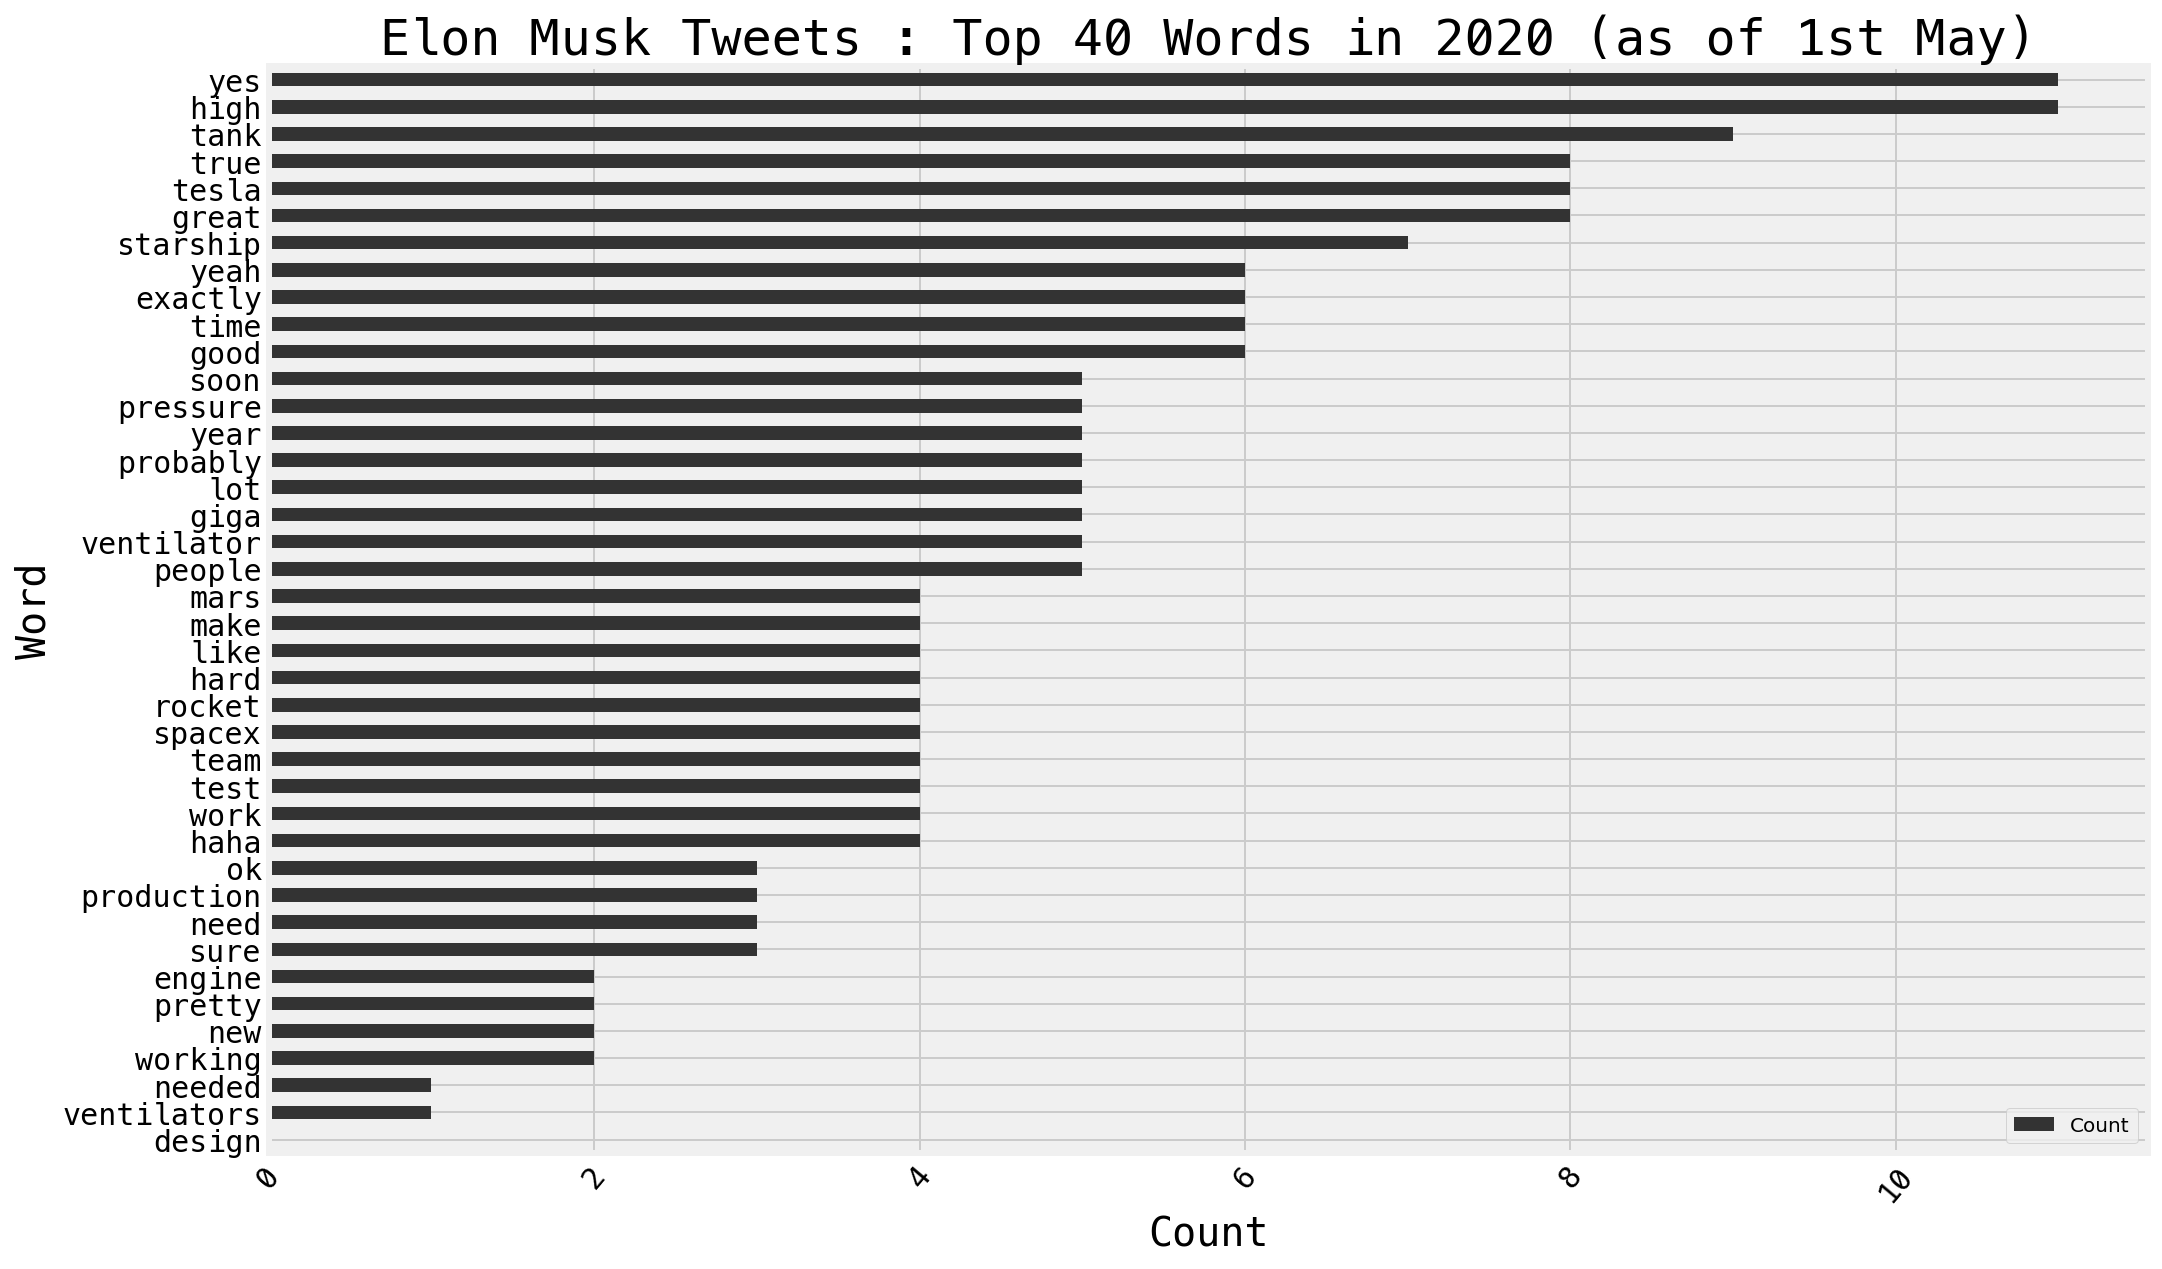

In [115]:
import matplotlib.font_manager

count2020.plot.barh(figsize=(15,10), color='#333333')
hfont = {'fontname':'Menlo'}
plt.xlabel("Count", **hfont, fontsize=20)
plt.ylabel("Word", **hfont, fontsize=20)
plt.title('Elon Musk Tweets : Top 40 Words in 2020 (as of 1st May)',**hfont, fontsize=25)

plt.tick_params(labelsize=15)
plt.xticks(**hfont, rotation=50)
plt.yticks(**hfont)
           
plt.show()



In [116]:

# count2015.rename(columns={'Count': 'count2015'}, inplace=True)
# count2016.rename(columns={'Count': 'count2016'}, inplace=True)
# count2017.rename(columns={'Count': 'count2017'}, inplace=True)
# count2018.rename(columns={'Count': 'count2018'}, inplace=True)
# count2019.rename(columns={'Count': 'count2019'}, inplace=True)
# count2020.rename(columns={'Count': 'count2020'}, inplace=True)

In [118]:
#count2015.to_csv('count2015.csv')


In [119]:
#count2016.to_csv('count2016.csv')

In [120]:
#count2017.to_csv('count2017.csv')

In [121]:
#count2018.to_csv('count2018.csv')

In [122]:
#count2019.to_csv('count2019.csv')

In [123]:
#count2020.to_csv('count2020.csv')

# Comparison of 2020 versus 2019 Hourly Tweets

In [124]:
year2020['Hour']=year2020.date.dt.hour
year2019['Hour']=year2019.date.dt.hour

/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
year2019['Hour']

1072    21
1073     6
1074     6
1075     2
1076    23
1077    23
1078    23
1079    22
1080    22
1081    22
1082    10
1083    10
1084    10
1085     9
1086     9
1087     9
1088     9
1089     8
1090     8
1091     8
1092     8
1093     8
1094     7
1095     7
1096     7
1097     7
1098     7
1099     7
1100     7
1101     7
1102     7
1103     7
1104     6
1105     6
1106     6
1107     4
1108     4
1109     4
1110     4
1111     3
1112     3
1113     3
1114     3
1115     1
1116     1
1117     1
1118     1
1119     1
1120     1
1121     1
1122     1
1123    22
1124    22
1125    22
1126    22
1127    22
1128    22
1129    22
1130    11
1131    11
1132    11
1133    11
1134    10
1135    10
1136     9
1137     8
1138     7
1139     6
1140     5
1141     5
1142     5
1143     2
1144     1
1145     0
1146     0
1147    23
1148    23
1149    23
1150    22
1151    22
1152    21
1153    21
1154    21
1155    19
1156     4
1157     4
1158     4
1159     4
1160     4
1161     4
1162     4

In [126]:
hour_tweets2020=pd.DataFrame(year2020.date.dt.hour.value_counts().sort_index())
hour_tweets2019=pd.DataFrame(year2019.date.dt.hour.value_counts().sort_index())

In [127]:
hour_tweets2020.head(3)

date
0    55
1    49
2    63

In [128]:
hour_tweets2020.rename(columns={'date':'2020'}, inplace=True)
hour_tweets2019.rename(columns={'date':'2019'}, inplace=True)

In [129]:
combined_hours=(hour_tweets2020, hour_tweets2019)


In [130]:
combined_hours=pd.concat(combined_hours, axis=1, sort=False)

In [131]:
combined_hours.head(3)

2020  2019
0    55   136
1    49   163
2    63   137

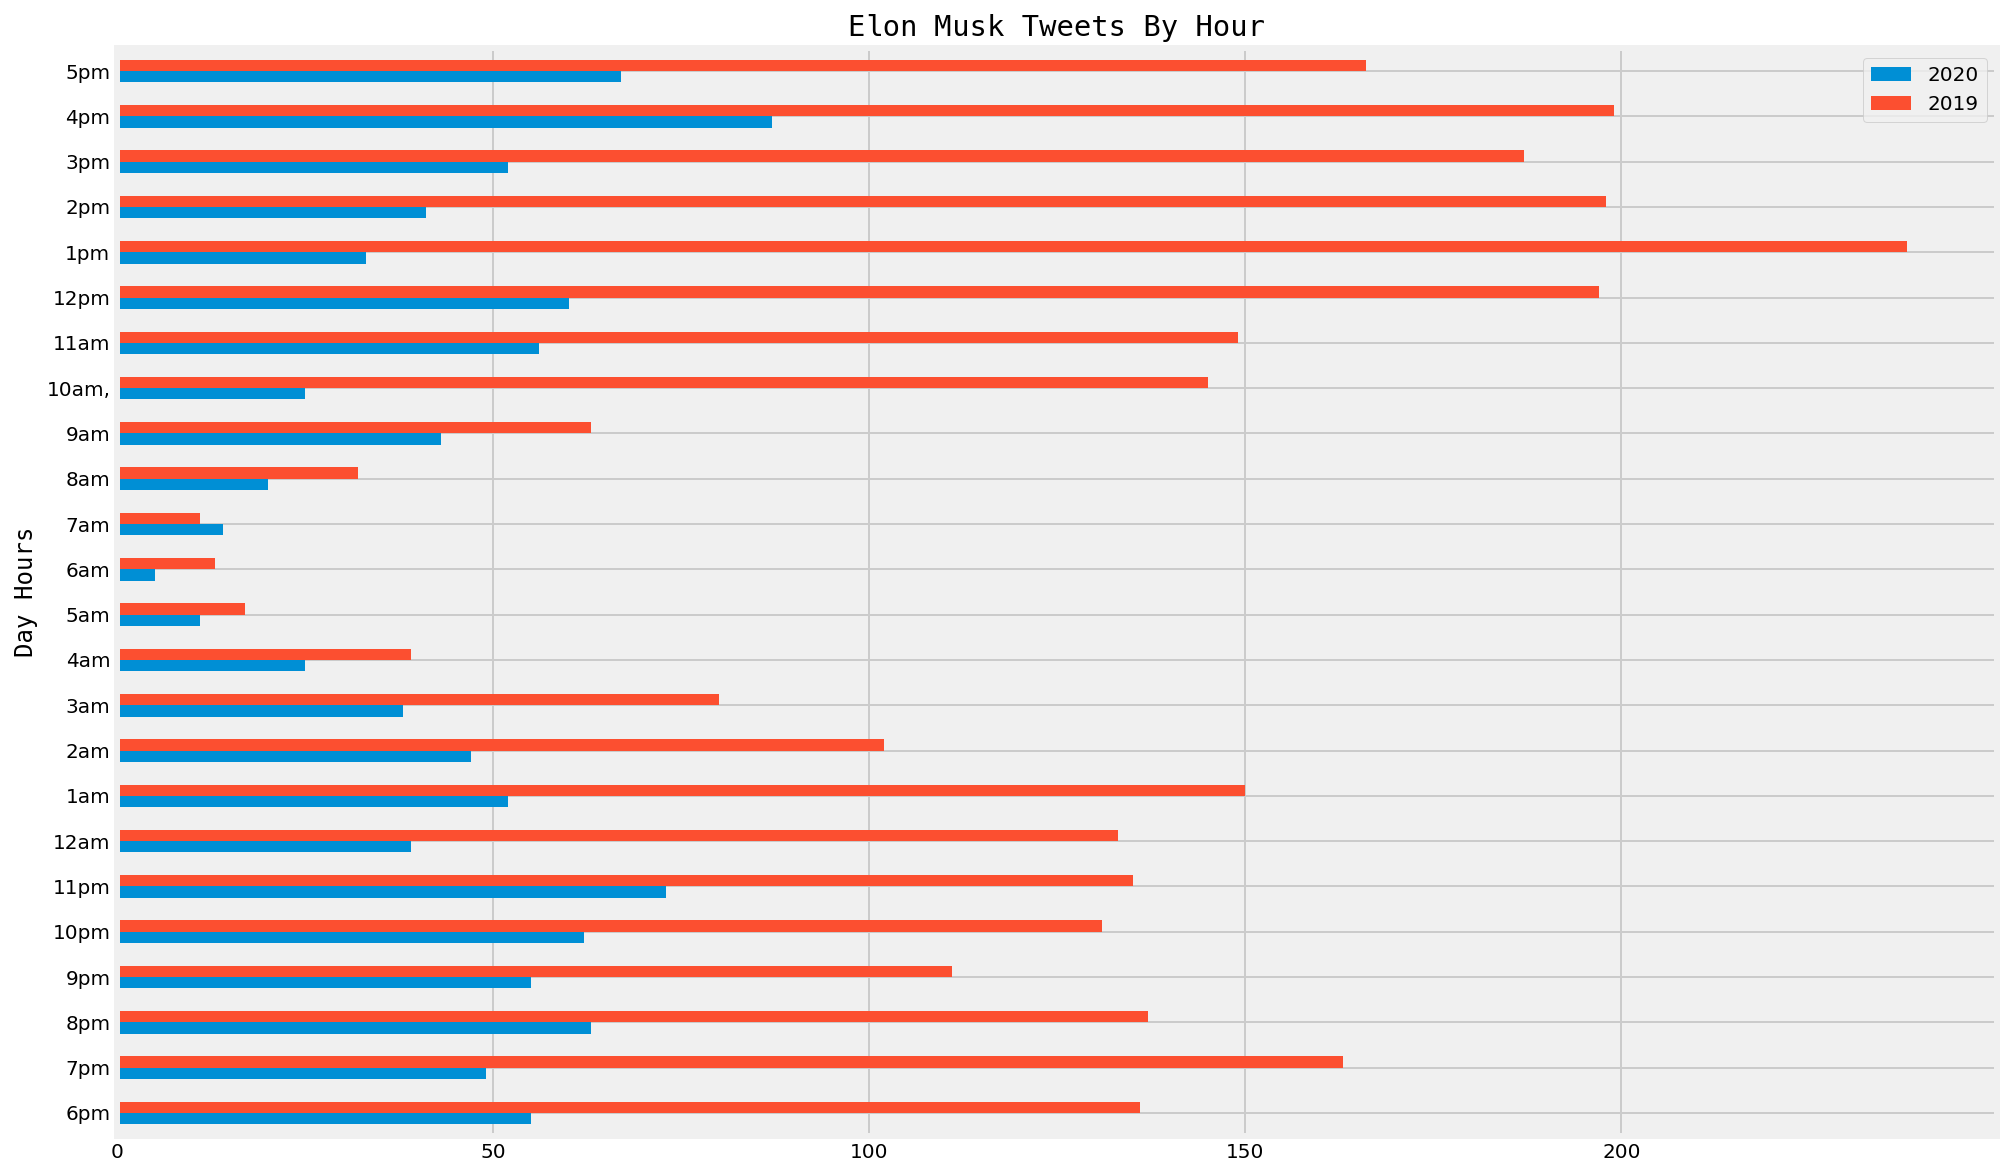

In [132]:
hfont = {'fontname':'Menlo'}

combined_hours_plot=combined_hours.plot(figsize=(15,10), kind='barh')
combined_hours_plot.set_ylabel('Day Hours', **hfont)
combined_hours_plot.set_title('Elon Musk Tweets By Hour', **hfont)
combined_hours_plot.set_yticklabels( ('6pm','7pm','8pm','9pm','10pm',
                                  '11pm', '12am','1am','2am','3am','4am', '5am','6am','7am','8am','9am','10am,','11am',
                                  '12pm','1pm','2pm','3pm','4pm','5pm')) #UTC converted to California timezone
plt.show()



# Comparison of 2020 versus 2019 Weekday Tweets

In [133]:
# latest_em_tweets_copy['Hour']=latest_em_tweets_copy.date.dt.hour
# latest_em_tweets_copy['Day']=latest_em_tweets_copy.date.dt.day
# latest_em_tweets_copy['Month']=latest_em_tweets_copy.date.dt.month
# latest_em_tweets_copy['Year']=latest_em_tweets_copy.date.dt.year
# latest_em_tweets_copy['Dayofweek']=latest_em_tweets_copy.date.dt.dayofweek



In [134]:
year2020['Dayofweek']=year2020.date.dt.dayofweek
year2019['Dayofweek']=year2019.date.dt.dayofweek

/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
year2019['Dayofweek']

1072    1
1073    1
1074    1
1075    1
1076    0
1077    0
1078    0
1079    0
1080    0
1081    0
1082    0
1083    0
1084    0
1085    0
1086    0
1087    0
1088    0
1089    0
1090    0
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
1113    0
1114    0
1115    0
1116    0
1117    0
1118    0
1119    0
1120    0
1121    0
1122    0
1123    6
1124    6
1125    6
1126    6
1127    6
1128    6
1129    6
1130    6
1131    6
1132    6
1133    6
1134    6
1135    6
1136    6
1137    6
1138    6
1139    6
1140    6
1141    6
1142    6
1143    6
1144    6
1145    6
1146    6
1147    5
1148    5
1149    5
1150    5
1151    5
1152    5
1153    5
1154    5
1155    5
1156    5
1157    5
1158    5
1159    5
1160    5
1161    5
1162    5
1163    5
1164    5
1165    5
1166    4
1167    4
1168    3
1169    3
1170    3
1171    3


In [136]:
dayofweek_tweets2020=pd.DataFrame(year2020.date.dt.dayofweek.value_counts().sort_index())
dayofweek_tweets2019=pd.DataFrame(year2019.date.dt.dayofweek.value_counts().sort_index())

In [137]:
dayofweek_tweets2020.head(10)

date
0   146
1   138
2   144
3   214
4   168
5   151
6   111

In [138]:
dayofweek_tweets2020.rename(columns={'date':'2020'}, inplace=True)
dayofweek_tweets2019.rename(columns={'date':'2019'}, inplace=True)

In [139]:
combined_dayofweek=(dayofweek_tweets2020, dayofweek_tweets2019)

In [140]:
combined_dayofweek=pd.concat(combined_dayofweek, axis=1, sort=False)

In [141]:
combined_dayofweek.head(10)

2020  2019
0   146   412
1   138   411
2   144   331
3   214   443
4   168   455
5   151   442
6   111   438

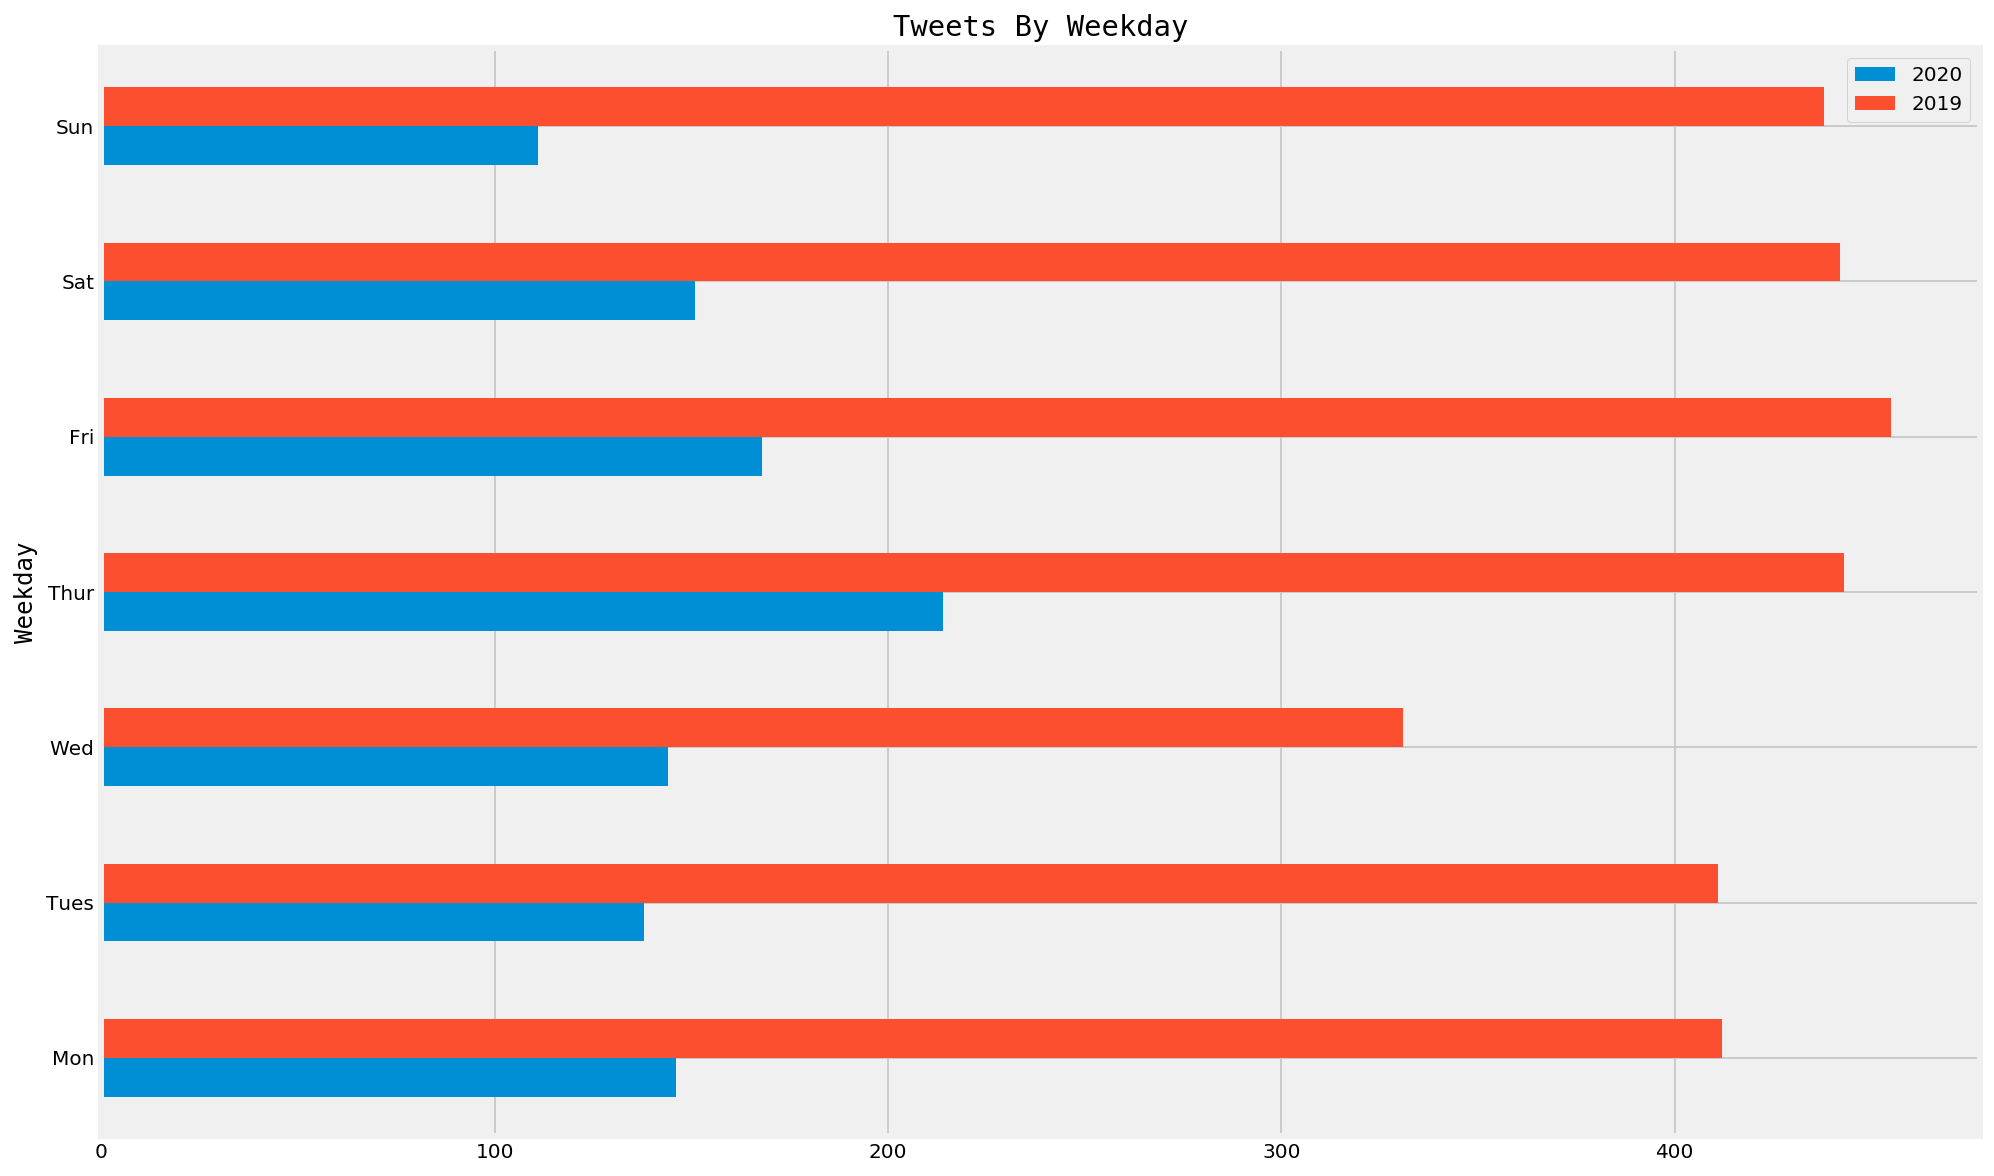

In [142]:
hfont = {'fontname':'Menlo'}

combined_dayofweek_plot=combined_dayofweek.plot(figsize=(15,10), kind='barh')
combined_dayofweek_plot.set_ylabel('Weekday', **hfont)
combined_dayofweek_plot.set_title('Tweets By Weekday', **hfont)
combined_dayofweek_plot.set_yticklabels( ('Mon','Tues','Wed','Thur','Fri','Sat','Sun')) 
plt.show()



# Comparison of 2020 versus 2019 Daily Tweets


In [143]:
year2020['Day']=year2020.date.dt.day
year2019['Day']=year2019.date.dt.day

/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/joyceooi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
year2019['Day']

1072    31
1073    31
1074    31
1075    31
1076    30
1077    30
1078    30
1079    30
1080    30
1081    30
1082    30
1083    30
1084    30
1085    30
1086    30
1087    30
1088    30
1089    30
1090    30
1091    30
1092    30
1093    30
1094    30
1095    30
1096    30
1097    30
1098    30
1099    30
1100    30
1101    30
1102    30
1103    30
1104    30
1105    30
1106    30
1107    30
1108    30
1109    30
1110    30
1111    30
1112    30
1113    30
1114    30
1115    30
1116    30
1117    30
1118    30
1119    30
1120    30
1121    30
1122    30
1123    29
1124    29
1125    29
1126    29
1127    29
1128    29
1129    29
1130    29
1131    29
1132    29
1133    29
1134    29
1135    29
1136    29
1137    29
1138    29
1139    29
1140    29
1141    29
1142    29
1143    29
1144    29
1145    29
1146    29
1147    28
1148    28
1149    28
1150    28
1151    28
1152    28
1153    28
1154    28
1155    28
1156    28
1157    28
1158    28
1159    28
1160    28
1161    28
1162    28

In [145]:
day_tweets2020=pd.DataFrame(year2020.date.dt.day.value_counts().sort_index())
day_tweets2019=pd.DataFrame(year2019.date.dt.day.value_counts().sort_index())

In [146]:
day_tweets2020.rename(columns={'date':'2020'}, inplace=True)
day_tweets2019.rename(columns={'date':'2019'}, inplace=True)

In [147]:
combined_day=(day_tweets2020, day_tweets2019)

In [148]:
combined_day=pd.concat(combined_day, axis=1, sort=False)

In [149]:
combined_day.head(33)

2020  2019
1     43    95
2     35    56
3     42    93
4     20    91
5     35    78
6     41    71
7     37   125
8     30    74
9     20   147
10    60    77
11    34    74
12    24   128
13    10    86
14    30   121
15    23    75
16    76    80
17    42    95
18    38    71
19    45    96
20    30    52
21    30    93
22    41   122
23    43   116
24    33   154
25    52   101
26    33   113
27    40   101
28    11   106
29    19    71
30    31   128
31    24    42

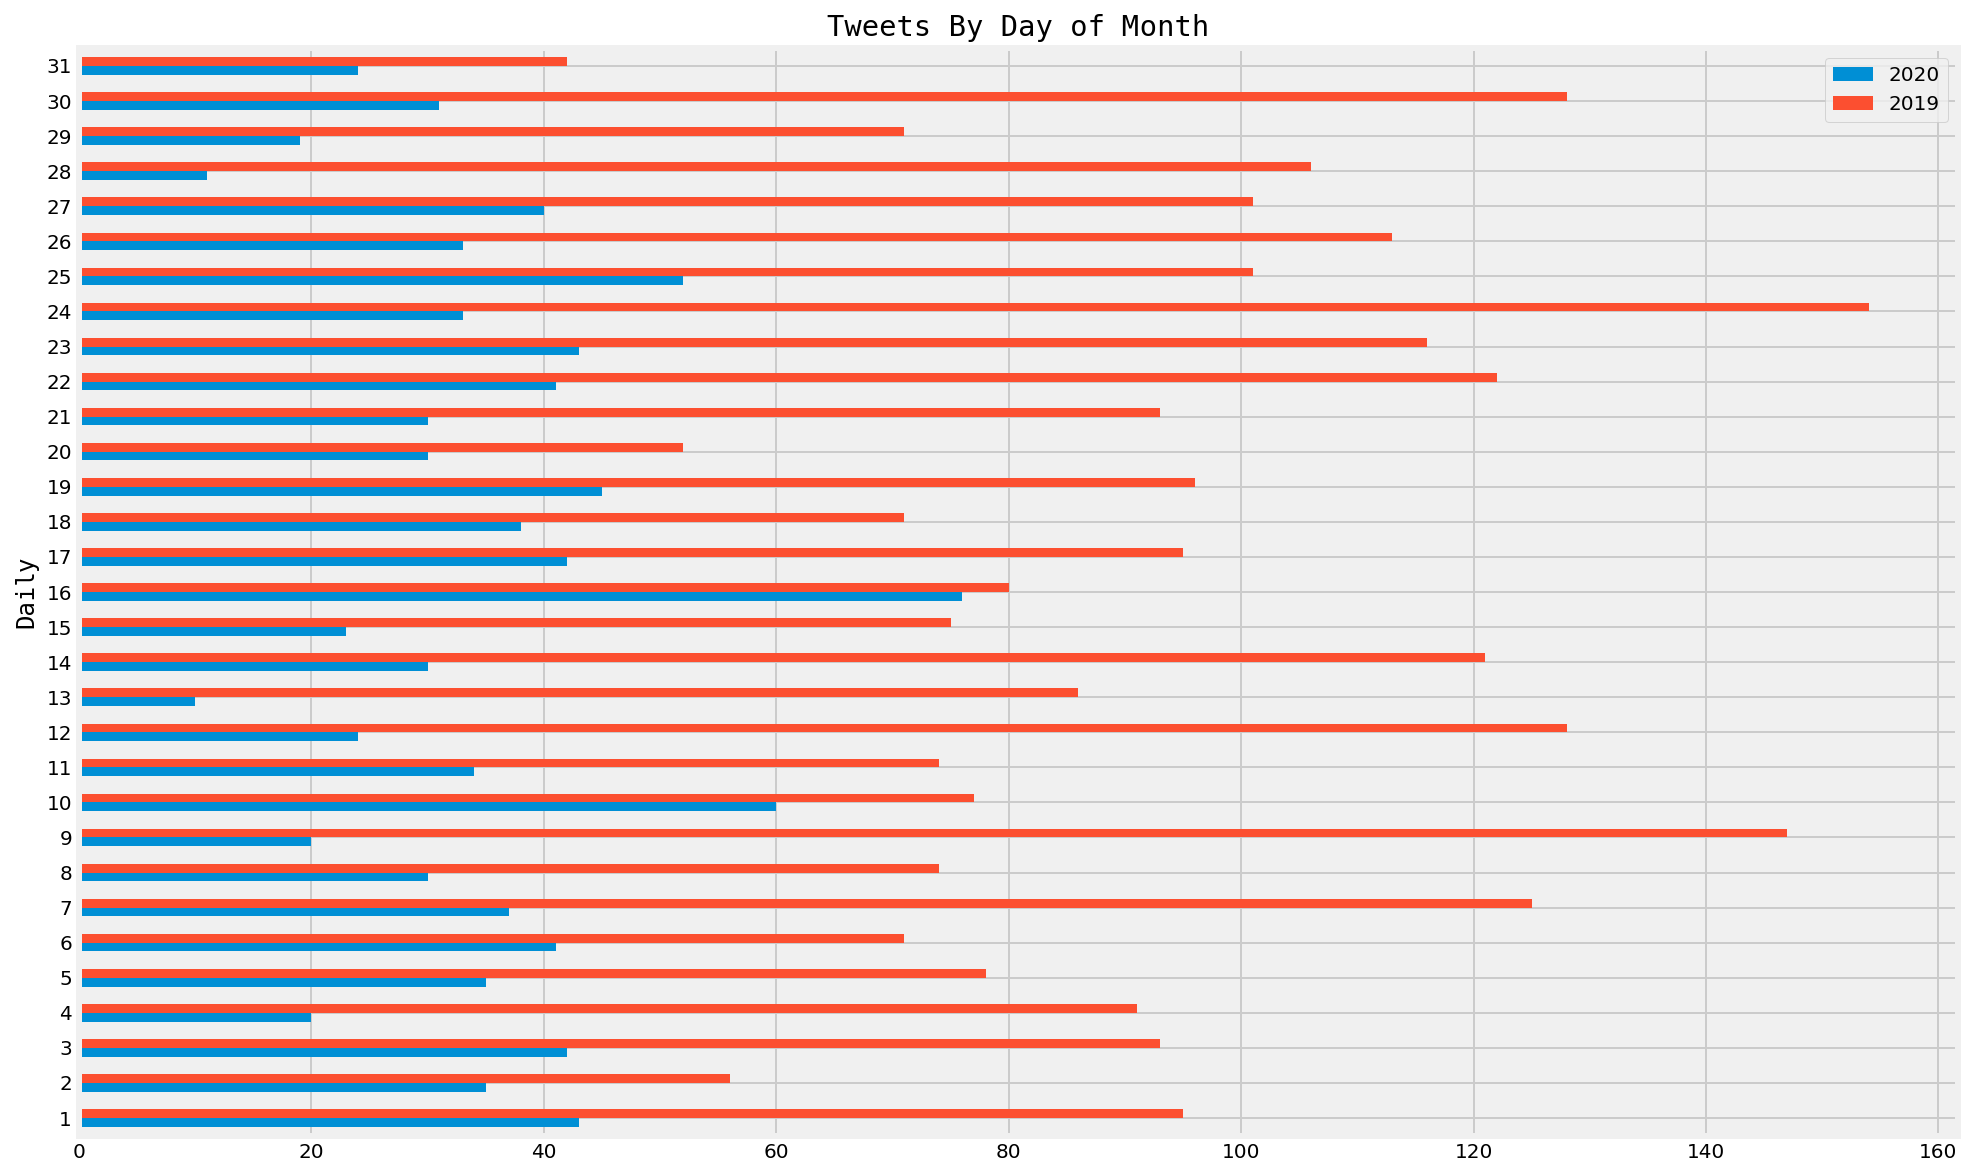

In [150]:
hfont = {'fontname':'Menlo'}

combined_day_plot=combined_day.plot(figsize=(15,10), kind='barh')
combined_day_plot.set_ylabel('Daily', **hfont)
combined_day_plot.set_title('Tweets By Day of Month', **hfont)
#combined_day_plot.set_yticklabels( ('Mon','Tues','Wed','Thur','Fri','Sat','Sun')) 
plt.show()
